In [ ]:
#画像の読み込み
#画像グレースケール
#エッジ検出←白黒反転(+255)
#画像の重ね合わせ
#交点をの座標をだす
#交点と交点の間の領域
#領域の中の白が黒が多いかの割合を求める

In [1]:
import cv2
im_gray = cv2.imread('/content/sample_data/00022_0.jpg', cv2.IMREAD_GRAYSCALE)

In [2]:
if im_gray is None:
    print("Failed to load image.")
else:
    cv2.imwrite('/content/sample_data/00022_1.jpg', im_gray)

In [3]:
pip install opencv-python

In [4]:
im_edges = cv2.Canny(im_gray, 130, 285, L2gradient=True)
cv2.imwrite("edges.jpg", im_edges)

True

In [5]:
im_inverted = cv2.bitwise_not(im_edges)

# 白黒反転した画像を保存
cv2.imwrite('edges_inverted.jpg', im_inverted)

True

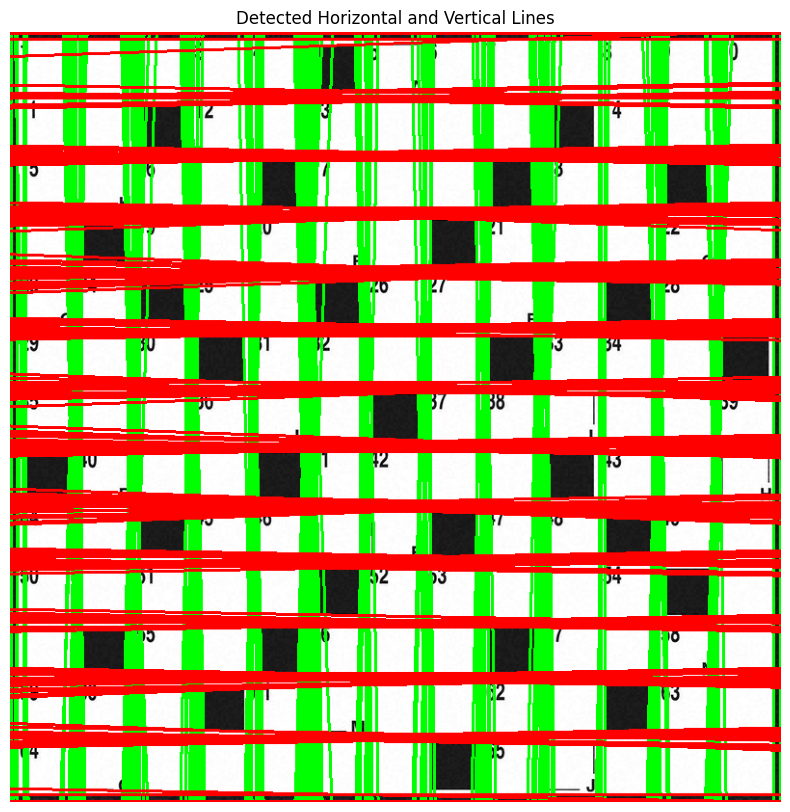

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Hough変換で直線を検出
lines = cv2.HoughLines(im_edges, 1, np.pi / 180, 150)

# 画像に直線を描画するためのカラー画像を作成
im_with_lines = cv2.cvtColor(im_gray, cv2.COLOR_GRAY2BGR)

# 検出した直線を保持するリスト
horizontal_lines = []
vertical_lines = []

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        # 直線の角度を度数法に変換
        angle = np.rad2deg(theta)

        # 水平な直線の角度の範囲を指定（±10度）
        if abs(angle - 0) < 10 or abs(angle - 180) < 10:
            horizontal_lines.append((rho, theta))
        # 垂直な直線の角度の範囲を指定（±10度）
        elif abs(angle - 90) < 10 or abs(angle - 270) < 10:
            vertical_lines.append((rho, theta))

# 水平な直線を描画（緑色）
for rho, theta in horizontal_lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(im_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 垂直な直線を描画（赤色）
for rho, theta in vertical_lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(im_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

# 結果を保存
cv2.imwrite('detected_lines.jpg', im_with_lines)

# 結果を表示
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(im_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Detected Horizontal and Vertical Lines')
plt.axis('off')
plt.show()


Detected intersections:
(250, 68)
(799, 310)
(611, 549)
(129, 491)
(129, 610)
(308, 368)
(671, 310)
(66, 798)
(250, 189)
(731, 68)
(671, 1)
(490, 798)
(308, 68)
(66, 126)
(66, 672)
(671, 730)
(429, 68)
(611, 798)
(552, 1)
(552, 428)
(189, 68)
(552, 730)
(250, 310)
(490, 126)
(731, 189)
(611, 126)
(490, 428)
(129, 68)
(611, 672)
(66, 610)
(308, 189)
(66, 247)
(1, 428)
(429, 189)
(308, 491)
(308, 610)
(1, 730)
(189, 189)
(552, 549)
(250, 1)
(371, 1)
(250, 730)
(371, 428)
(371, 730)
(490, 247)
(731, 310)
(611, 610)
(611, 247)
(490, 549)
(129, 189)
(308, 310)
(66, 368)
(1, 549)
(429, 310)
(189, 310)
(552, 798)
(799, 1)
(799, 428)
(371, 549)
(799, 730)
(731, 1)
(490, 368)
(429, 1)
(611, 368)
(66, 68)
(671, 126)
(189, 1)
(429, 730)
(129, 310)
(671, 428)
(189, 730)
(552, 126)
(552, 672)
(1, 798)
(799, 549)
(250, 798)
(371, 798)
(129, 1)
(611, 68)
(129, 730)
(490, 672)
(66, 189)
(671, 247)
(1, 126)
(1, 672)
(671, 549)
(66, 491)
(552, 247)
(250, 126)
(371, 126)
(250, 428)
(371, 672)
(799, 798)


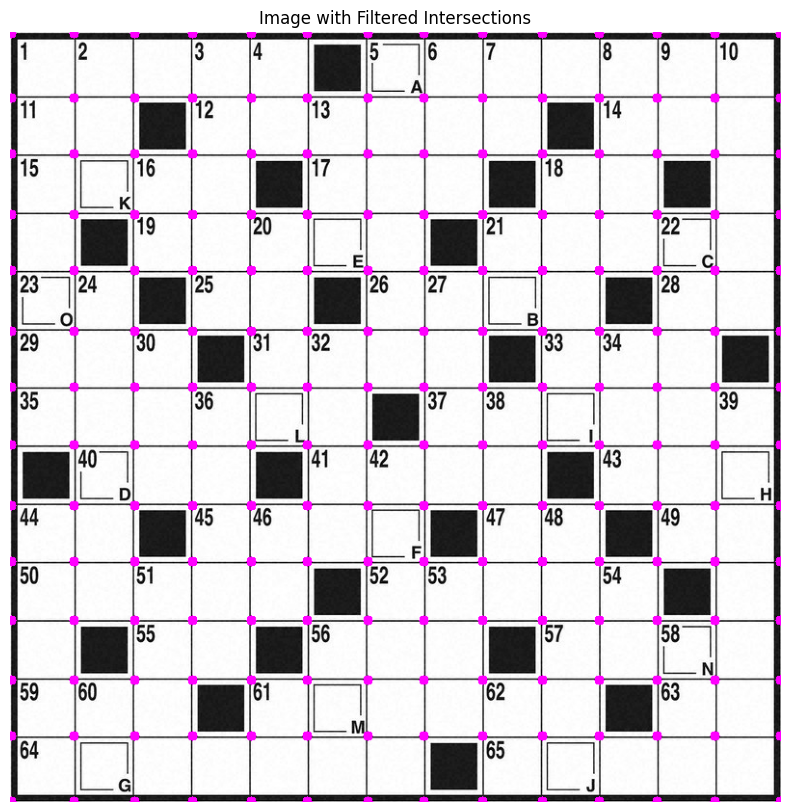

In [7]:
# 交点の座標を保持するリスト
intersections = []

# 水平な直線と垂直な直線の組み合わせで交点を計算
for (rho_h, theta_h) in horizontal_lines:
    for (rho_v, theta_v) in vertical_lines:
        A = np.array([
            [np.cos(theta_h), np.sin(theta_h)],
            [np.cos(theta_v), np.sin(theta_v)]
        ])
        b = np.array([rho_h, rho_v])
        # 行列Aが逆行列を持つかを確認
        if np.linalg.det(A) != 0:
            # 交点の座標を計算
            intersection = np.linalg.solve(A, b)
              # 重複を避けるため、既存の交点との距離を計算して比較
            is_unique = True
            for existing_point in intersections:
                distance = np.sqrt((intersection[0] - existing_point[0])**2 + (intersection[1] - existing_point[1])**2)
                if distance < 30:
                    is_unique = False
                    break

            # 一定距離以上離れている場合にのみ交点として追加
            if is_unique:
                intersections.append((int(intersection[0]), int(intersection[1])))

# 重複を除去した交点の座標リストを表示
print("Detected intersections:")
unique_intersections = list(set(intersections))  # 重複を除去
for point in unique_intersections:
    print(point)

print(len(unique_intersections))

# 画像に交点を描画して保存および表示
im_with_intersections = cv2.cvtColor(im_gray, cv2.COLOR_GRAY2BGR)

for point in unique_intersections:
    cv2.circle(im_with_intersections, point, 5, (255, 0, 255), -1)  # 紫色で交点を描画

# 結果を保存
cv2.imwrite('image_with_intersections_filtered.jpg', im_with_intersections)

# 結果を表示
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(im_with_intersections, cv2.COLOR_BGR2RGB))
plt.title('Image with Filtered Intersections')
plt.axis('off')
plt.show()

In [8]:
sorted_unique_intersections=sorted(unique_intersections)
for point in sorted_unique_intersections:
    print(point)

(1, 1)
(1, 68)
(1, 126)
(1, 189)
(1, 247)
(1, 310)
(1, 368)
(1, 428)
(1, 491)
(1, 549)
(1, 610)
(1, 672)
(1, 730)
(1, 798)
(66, 1)
(66, 68)
(66, 126)
(66, 189)
(66, 247)
(66, 310)
(66, 368)
(66, 428)
(66, 491)
(66, 549)
(66, 610)
(66, 672)
(66, 730)
(66, 798)
(129, 1)
(129, 68)
(129, 126)
(129, 189)
(129, 247)
(129, 310)
(129, 368)
(129, 428)
(129, 491)
(129, 549)
(129, 610)
(129, 672)
(129, 730)
(129, 798)
(189, 1)
(189, 68)
(189, 126)
(189, 189)
(189, 247)
(189, 310)
(189, 368)
(189, 428)
(189, 491)
(189, 549)
(189, 610)
(189, 672)
(189, 730)
(189, 798)
(250, 1)
(250, 68)
(250, 126)
(250, 189)
(250, 247)
(250, 310)
(250, 368)
(250, 428)
(250, 491)
(250, 549)
(250, 610)
(250, 672)
(250, 730)
(250, 798)
(308, 1)
(308, 68)
(308, 126)
(308, 189)
(308, 247)
(308, 310)
(308, 368)
(308, 428)
(308, 491)
(308, 549)
(308, 610)
(308, 672)
(308, 730)
(308, 798)
(371, 1)
(371, 68)
(371, 126)
(371, 189)
(371, 247)
(371, 310)
(371, 368)
(371, 428)
(371, 491)
(371, 549)
(371, 610)
(371, 672)
(371, 7

In [9]:
intersections_yray = list(set(point[0] for point in sorted_unique_intersections))
intersections_yray.sort()
print("Unique yray:", intersections_yray)
# 出力: Unique left numbers: [5, 116, 233, 341, 457, 570, 681, 793]

# 右の数字（1番目の要素）の重複なしリストを作成
intersections_xray = list(set(point[1] for point in sorted_unique_intersections))
intersections_xray.sort()
print("Unique xray:", intersections_xray)

Unique yray: [1, 66, 129, 189, 250, 308, 371, 429, 490, 552, 611, 671, 731, 799]
Unique xray: [1, 68, 126, 189, 247, 310, 368, 428, 491, 549, 610, 672, 730, 798]


In [10]:
array_board=np.empty((len(intersections_yray)-1,len(intersections_xray)-1),dtype=object)
for i in range(len(intersections_yray)-1):
  for j in range(len(intersections_xray)-1):
    pixel_value=0
    pixel_count=0
    for y in range(intersections_yray[i],intersections_yray[i+1]):
      for x in range(intersections_xray[j],intersections_xray[j+1]):
        # Check if the pixel index is within the image bounds
        if y < im_gray.shape[0] and x < im_gray.shape[1]:
            pixel_value = pixel_value+im_gray[y, x]
            pixel_count=pixel_count+1
    avg_pixel=pixel_value/pixel_count
    threshold=127
    if avg_pixel>threshold:
      array_board[i,j]="□"
    else:
      array_board[i,j]="■"
for row in array_board:
    print(''.join(row))

□□□□□■□□□□□□□
□□■□□□□□□■□□□
□□□□■□□□■□□■□
□■□□□□□■□□□□□
□□■□□■□□□□■□□
□□□■□□□□■□□□■
□□□□□□■□□□□□□
■□□□■□□□□■□□□
□□■□□□□■□□■□□
□□□□□■□□□□□■□
□■□□■□□□■□□□□
□□□■□□□□□□■□□
□□□□□□□■□□□□□


In [11]:
numed_array_board=array_board
keynum=1
for i in range(len(intersections_yray)-1):
  for j in range(len(intersections_xray)-1):
    if numed_array_board[i,j]=="□":
      if j<len(intersections_xray)-2:
        if numed_array_board[i,j+1]=="□"and (j==0 or numed_array_board[i,j-1]=="■"):
          if keynum<10:
            numed_array_board[i,j]=f'{keynum} '
          else:
            numed_array_board[i,j]=f'{keynum}'
          keynum=keynum+1
          continue
      if i<len(intersections_yray)-2:
        if numed_array_board[i+1,j]=="□"and (i==0 or numed_array_board[i-1,j]=="■"):
          if keynum<10:
            numed_array_board[i,j]=f'{keynum} '
          else:
            numed_array_board[i,j]=f'{keynum}'
          keynum=keynum+1
for row in numed_array_board:
    print(''.join(str(element) for element in row))

1 2 □3 4 ■5 6 7 □8 9 10
11□■12□13□□□■14□□
15□16□■17□□■18□■□
□■19□20□□■21□□22□
2324■25□■2627□□■28□
29□30■3132□□■3334□■
35□□36□□■3738□□□39
■40□□■4142□□■43□□
44□■4546□□■4748■49□
50□51□□■5253□□54■□
□■55□■56□□■57□58□
5960□■61□□□62□■63□
64□□□□□□■65□□□□


In [ ]:
!pip install pyocr
!apt install tesseract-ocr libtesseract-dev tesseract-ocr-jpn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr tesseract-ocr-eng
  tesseract-ocr-jpn tesseract-ocr-osd
0 upgraded, 7 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,950 kB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.1 [582 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Get:4 http://archive.ubuntu.com/ubun

In [ ]:
!tesseract --list-langs


List of available languages (3):
eng
jpn
osd


In [ ]:
import re
import pyocr
import pyocr.builders
import sys
from PIL import Image
# ツール読み込み
tools = pyocr.get_available_tools()
# ツールが見付からない場合
if len(tools) == 0:
    print('pyocrが見付かりません。pyocrをインストールして下さい。')
    sys.exit(1)
tool = tools[0]
array_board=np.empty((len(intersections_yray)-1,len(intersections_xray)-1),dtype=object)
for i in range(len(intersections_yray)-1):
  for j in range(len(intersections_xray)-1):
    pixel_value=0
    pixel_count=0
    for y in range(intersections_yray[i],intersections_yray[i+1]):
      for x in range(intersections_xray[j],intersections_xray[j+1]):
        # Check if the pixel index is within the image bounds
        if y < im_gray.shape[0] and x < im_gray.shape[1]:
            pixel_value = pixel_value+im_gray[y, x]
            pixel_count=pixel_count+1
    avg_pixel=pixel_value/pixel_count
    threshold=127
    if avg_pixel>threshold:
      partial_img=im_gray[intersections_yray[i]:(intersections_yray[i]+intersections_yray[i+1])//2,intersections_xray[j]:(intersections_xray[j]+intersections_xray[j+1])//2]
      partial_img_pil = Image.fromarray(partial_img.astype('uint8'))
      max_medals = tool.image_to_string(partial_img_pil, lang='eng', builder=pyocr.builders.DigitBuilder(tesseract_layout=8))
      # 数値以外の文字を除去
      max_medals = re.sub(r'\D', '', max_medals)
      if max_medals == '':
          array_board[i,j]="□"
      else:
        array_board[i,j]=f"{max_medals},"
    else:
      array_board[i,j]="■"
for row in array_board:
    print(''.join(row))


1,□□3,4,■5,6,□□8,□10,
1,□■12,□13,□1,□■14,□□
415,□116,2,■17,□□■18,□■□
□■119,□120,□□■21,□□22,□
423,24,■25,□■26,27,□□■28,□
129,□30,■31,32,□□■33,34,□■
435,□□36,□□■37,38,□□□39,
■40,□□■□42,□□■43,□1,
44,□■45,46,□□■47,48,■49,□
450,□51,□□■52,53,□□54,■□
□■55,□■56,□□■57,□58,□
159,60,□■61,□□□62,□■63,□
164,□2,□□2,□■65,□□□□


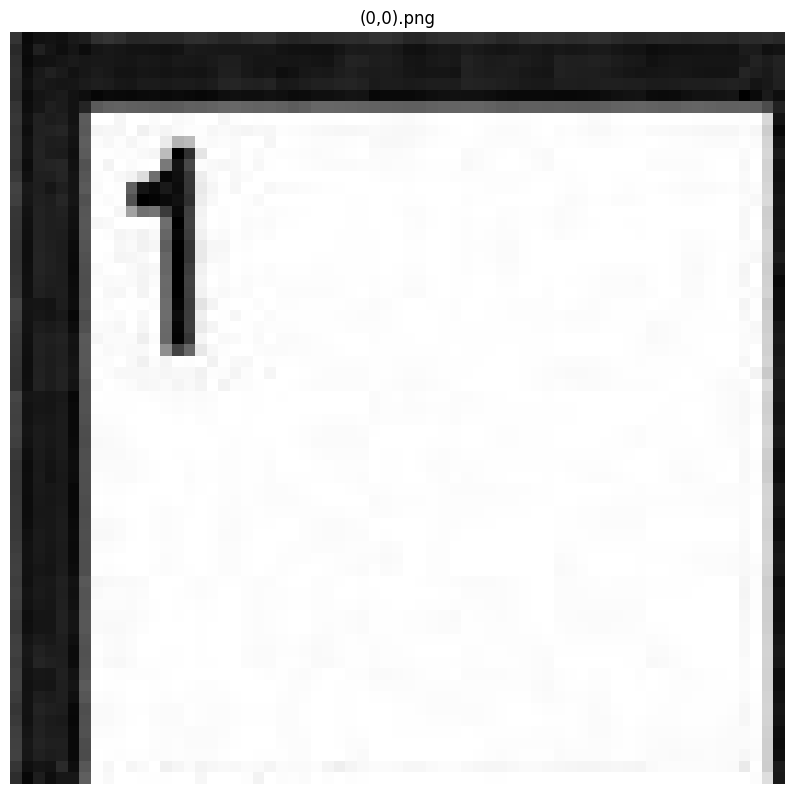

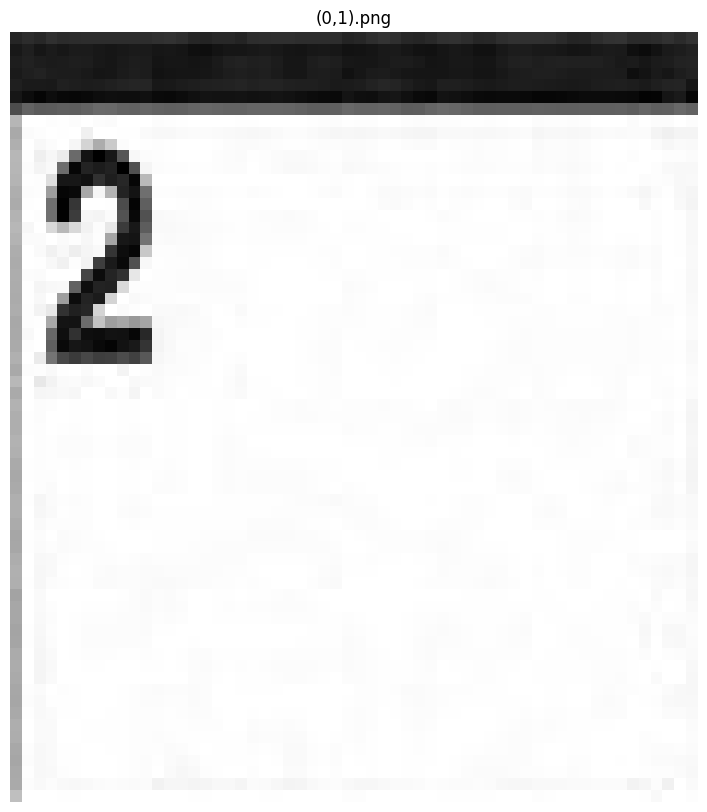

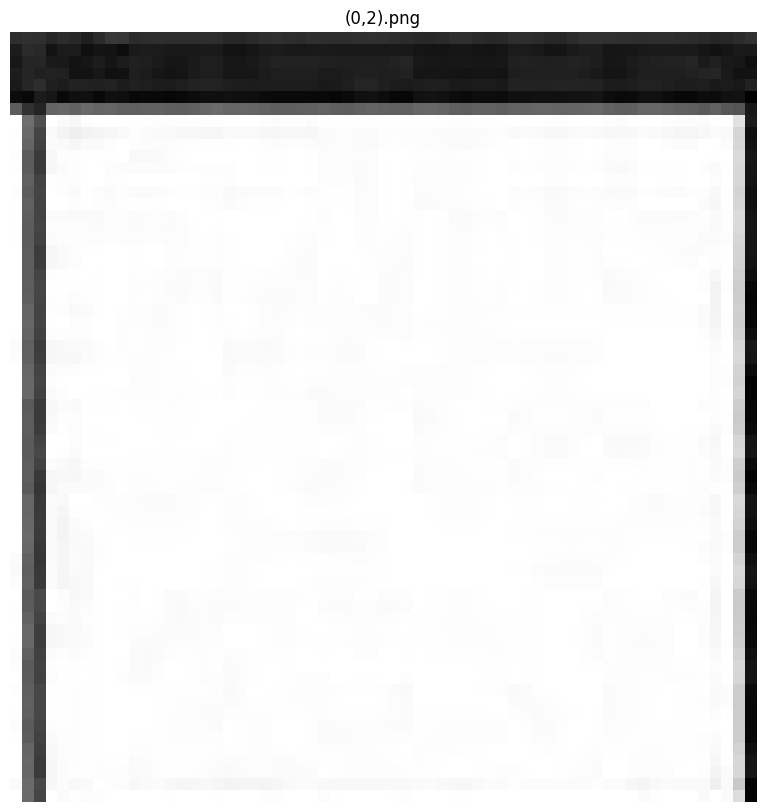

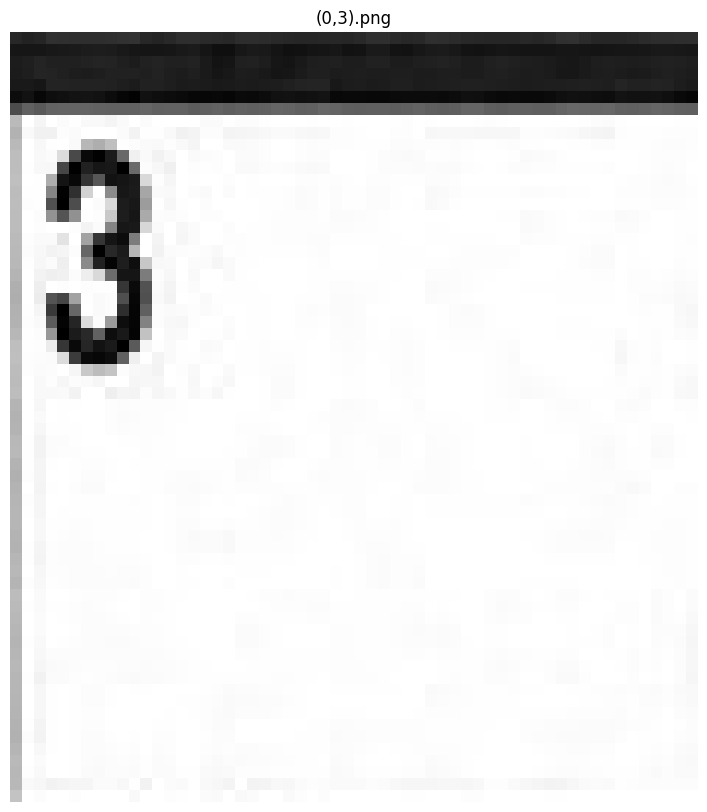

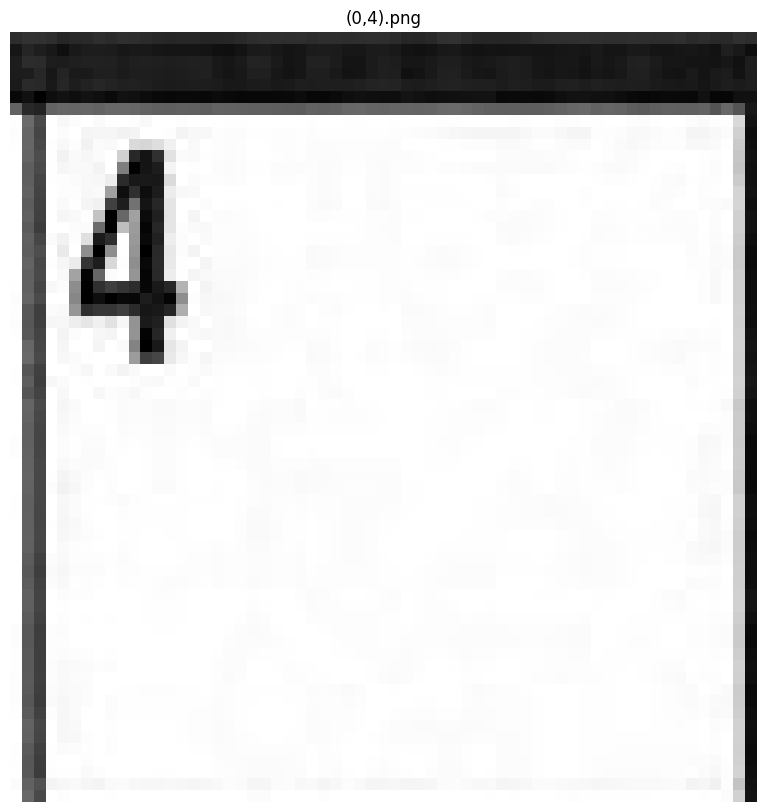

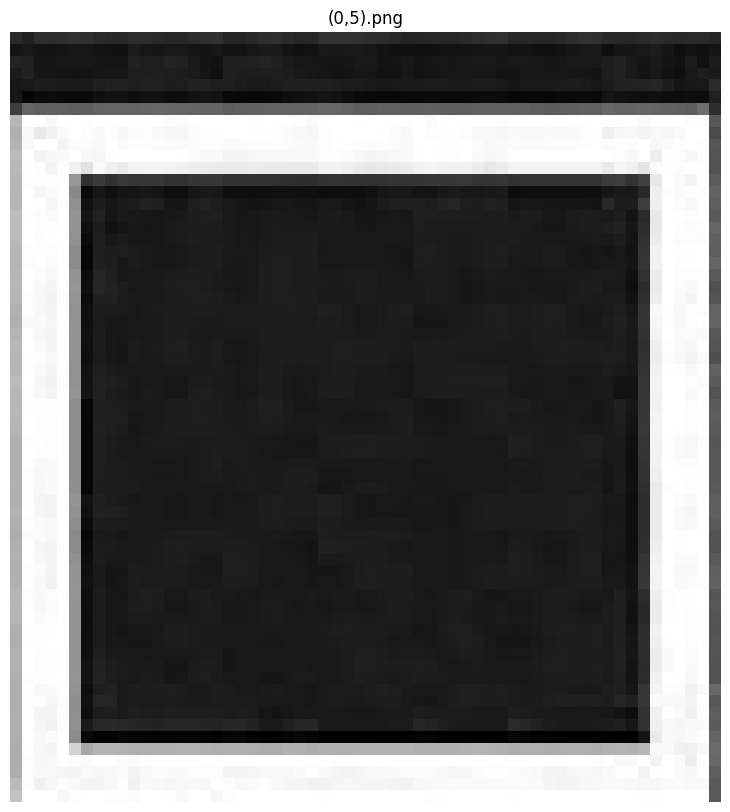

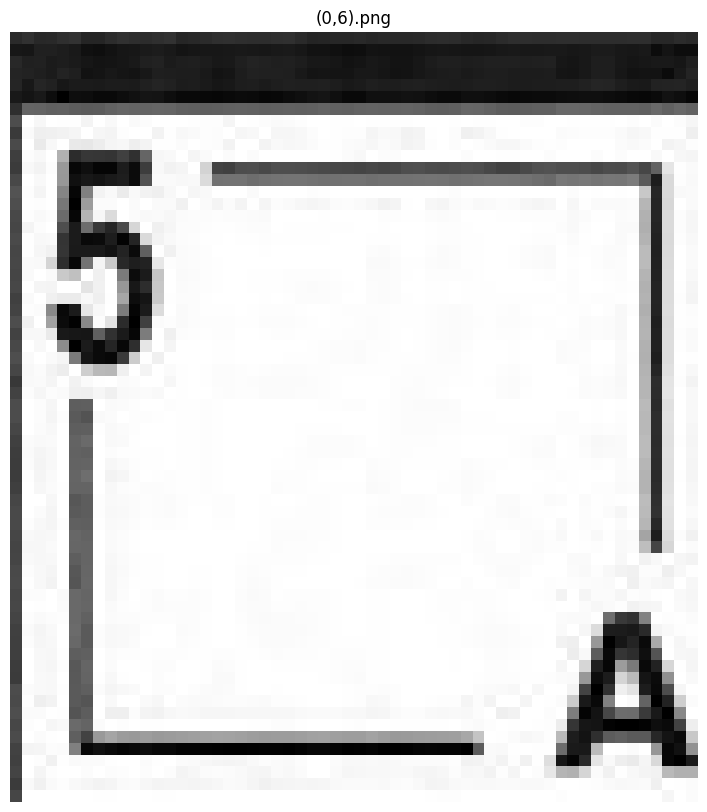

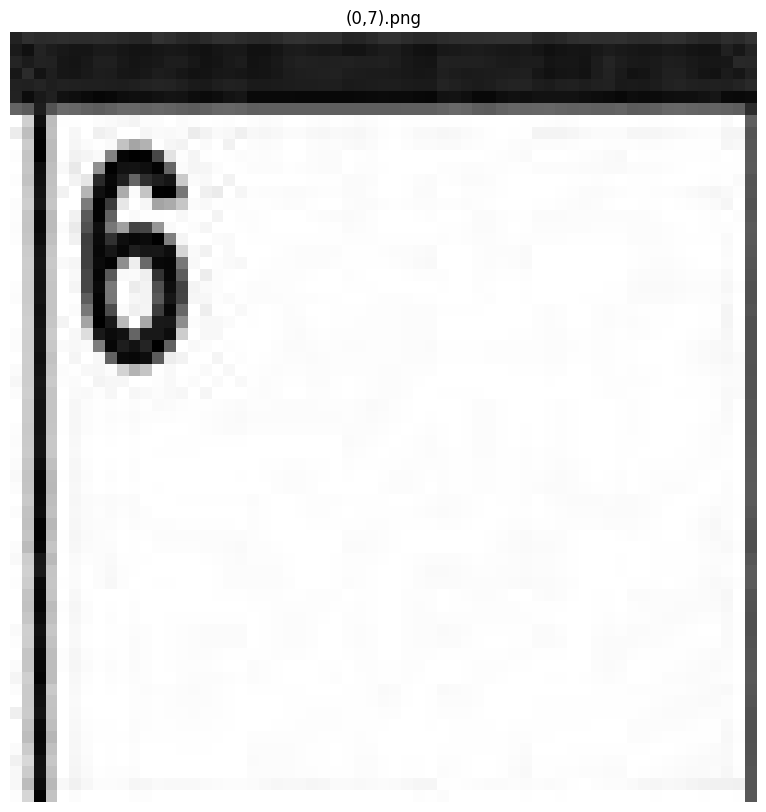

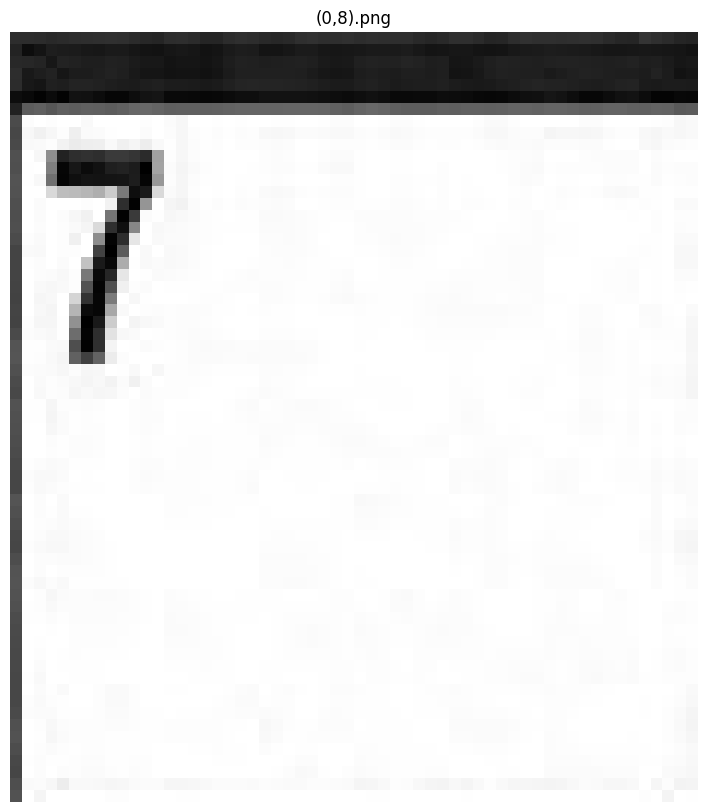

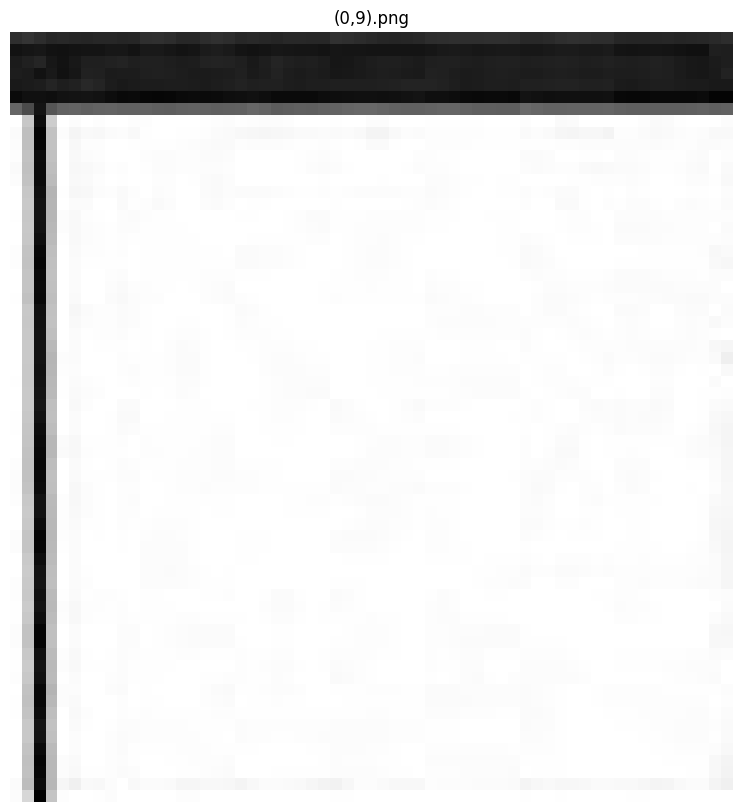

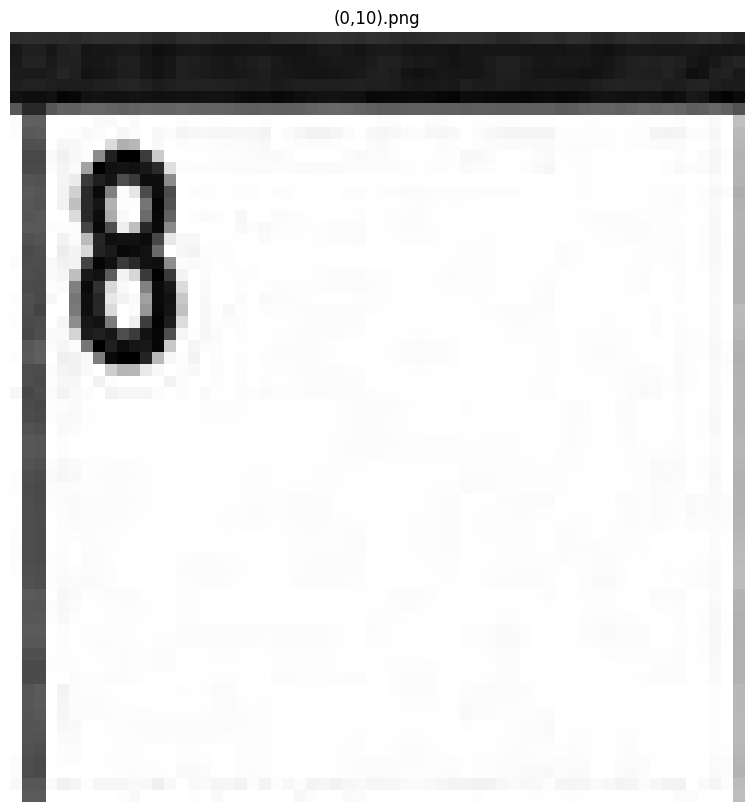

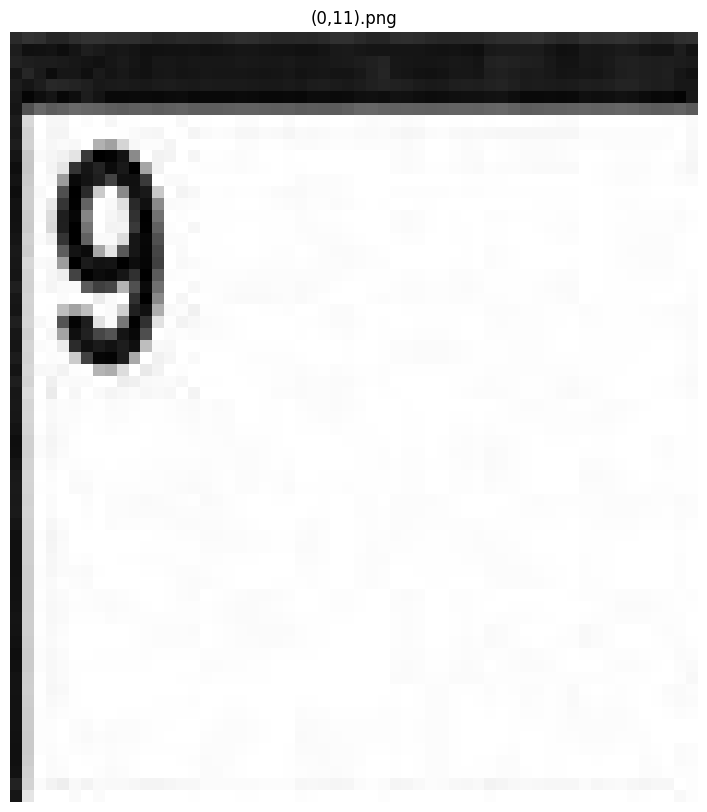

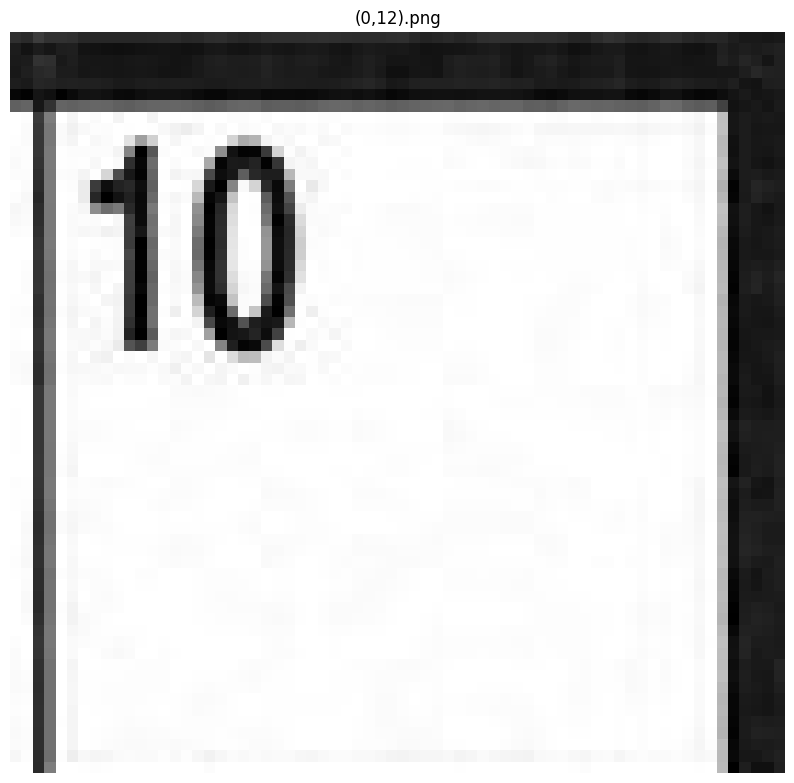

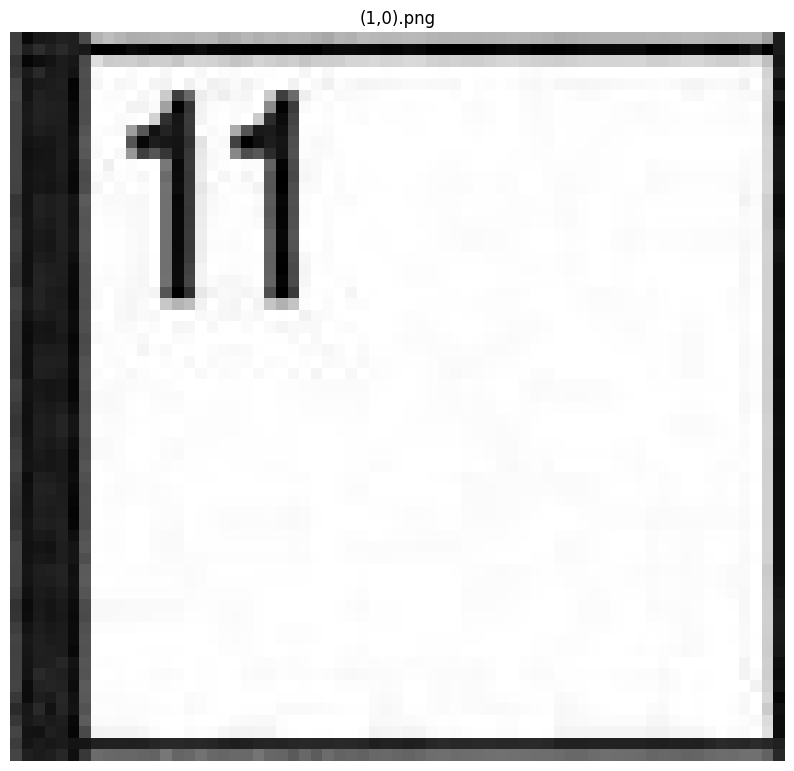

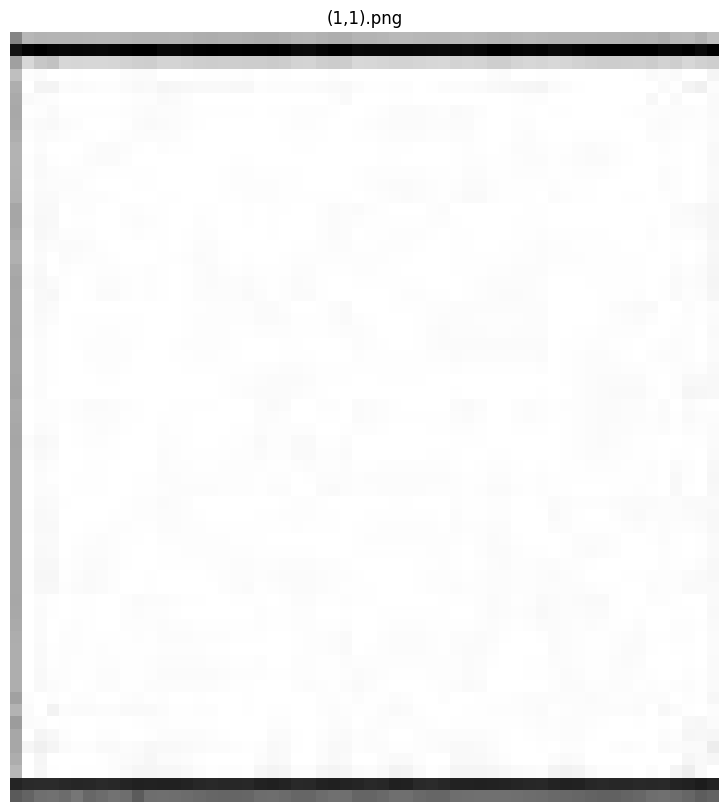

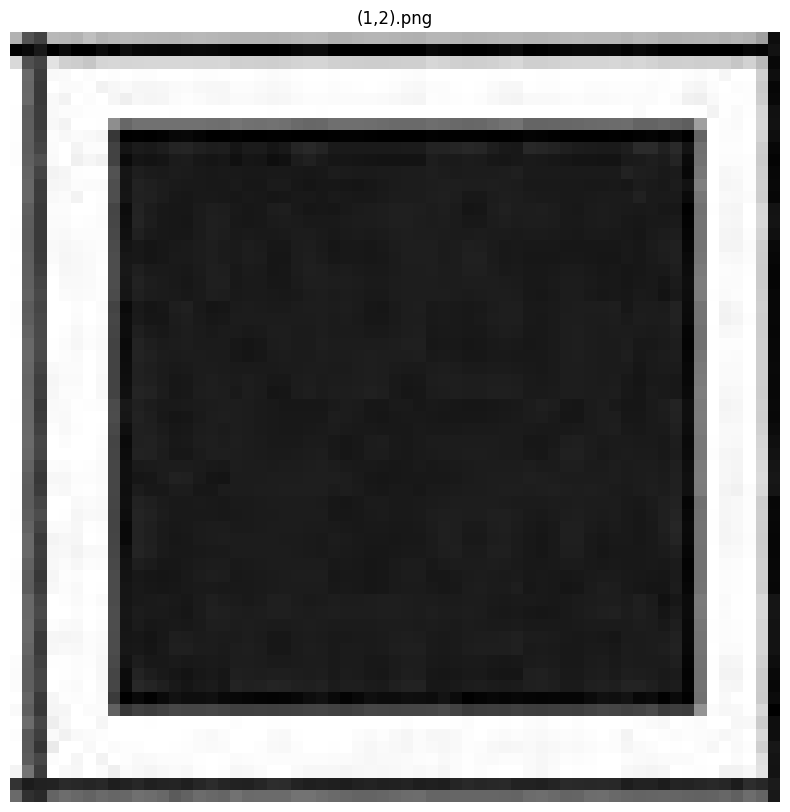

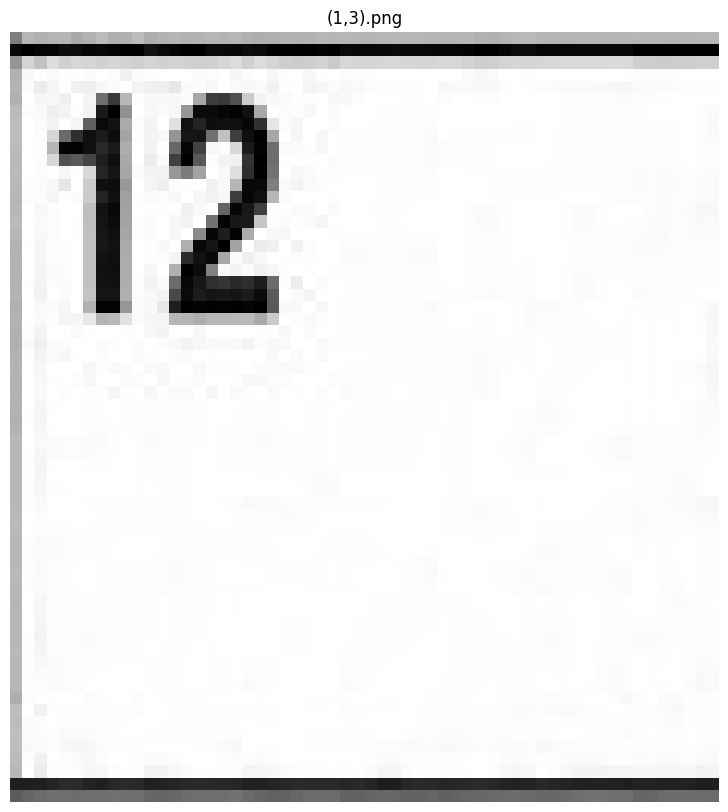

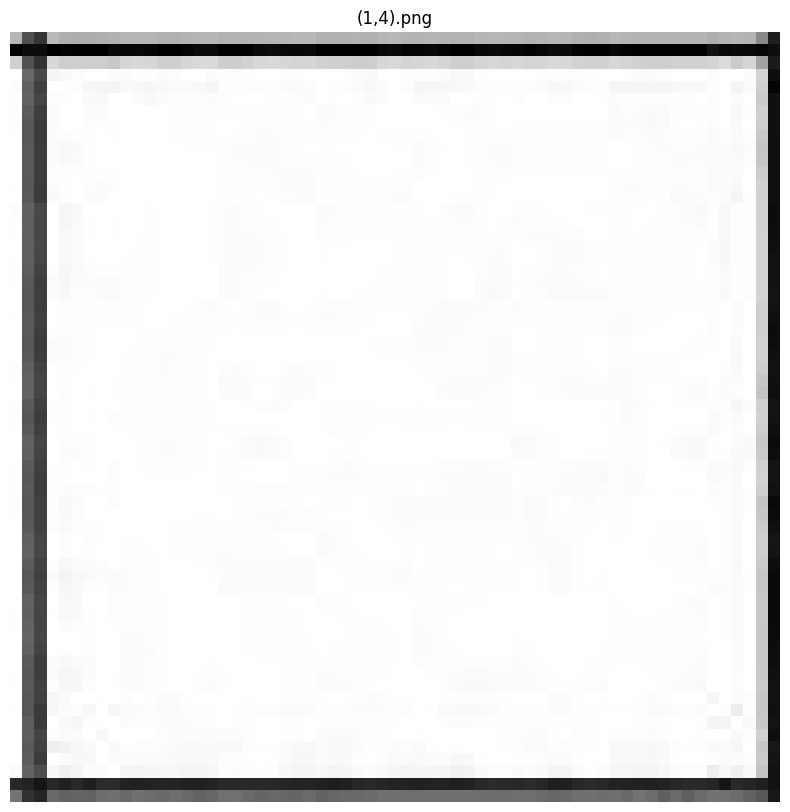

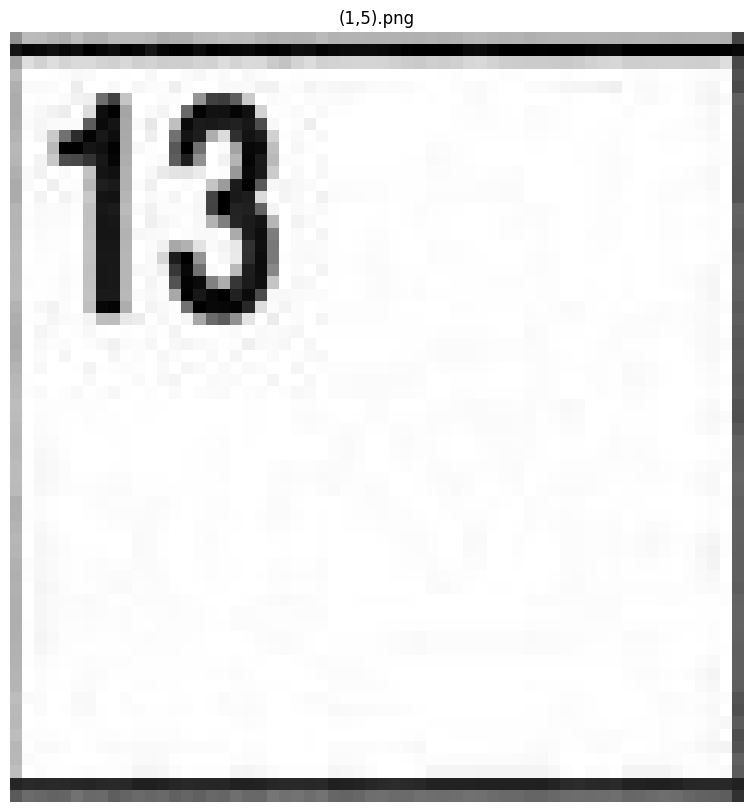

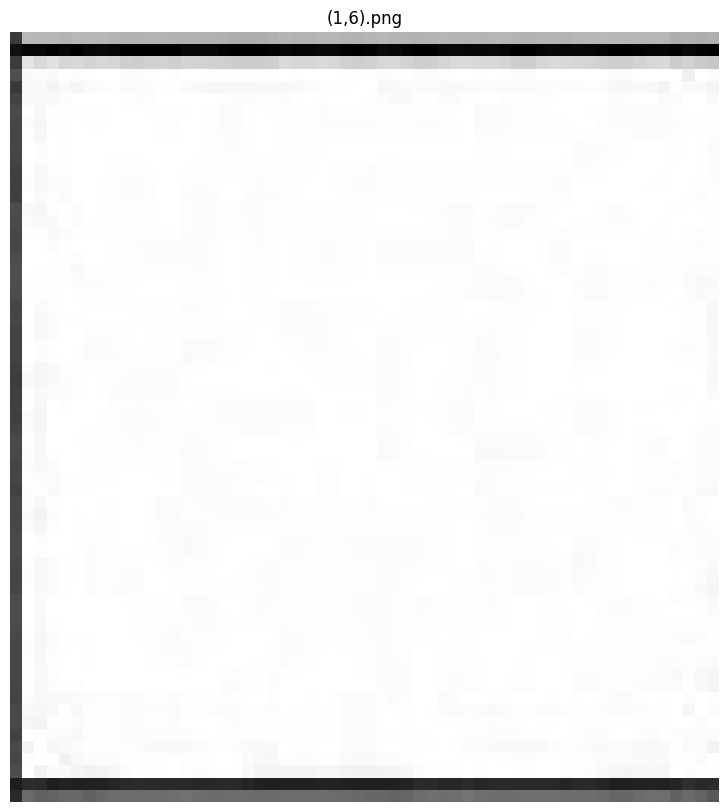

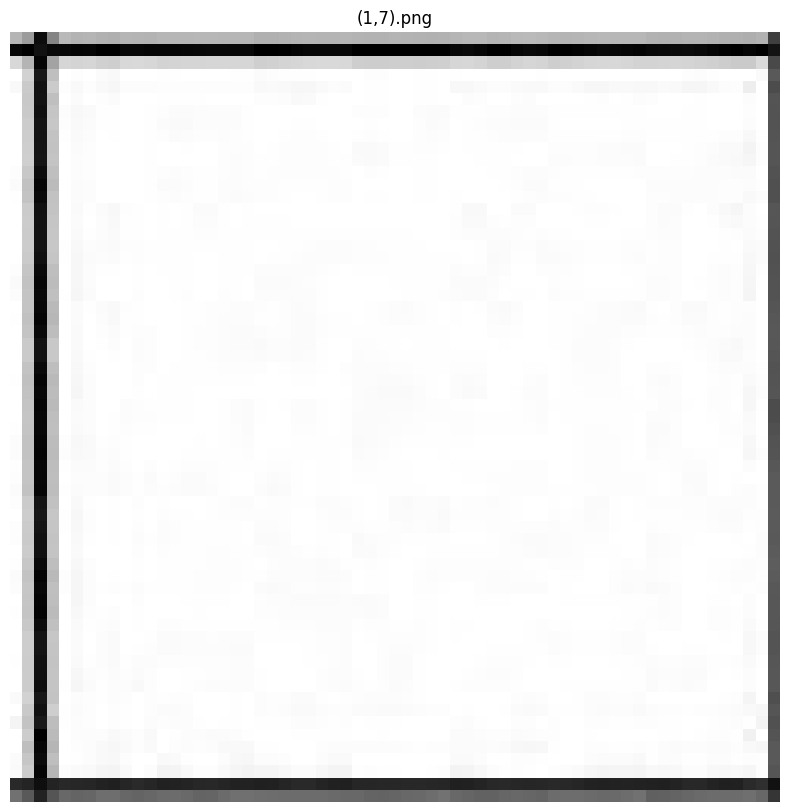

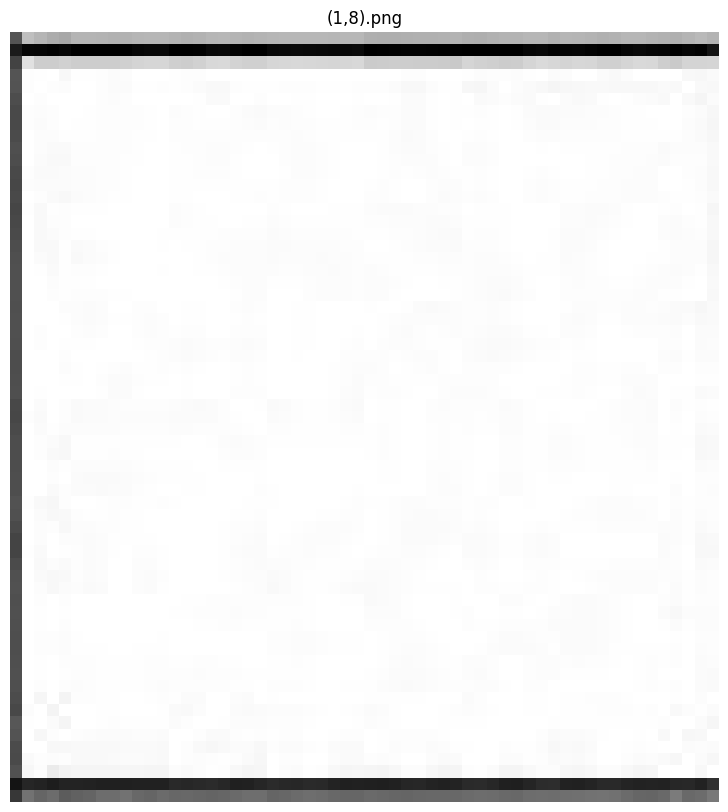

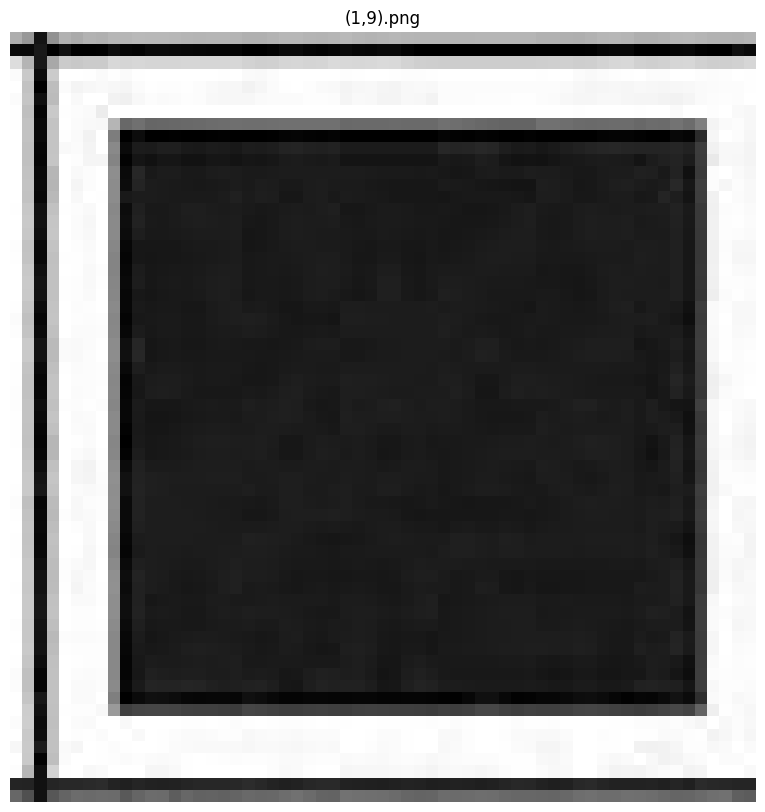

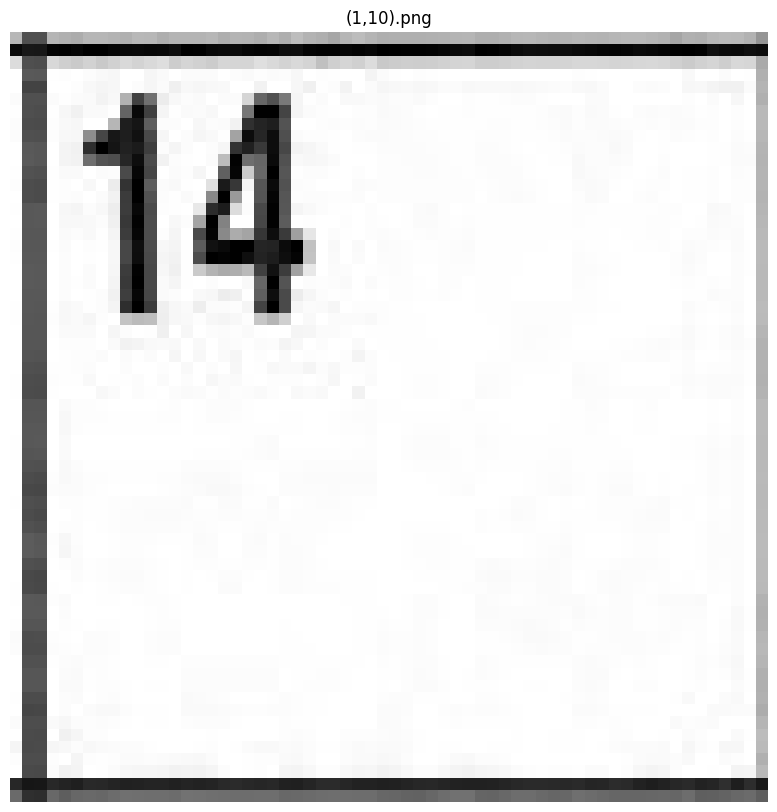

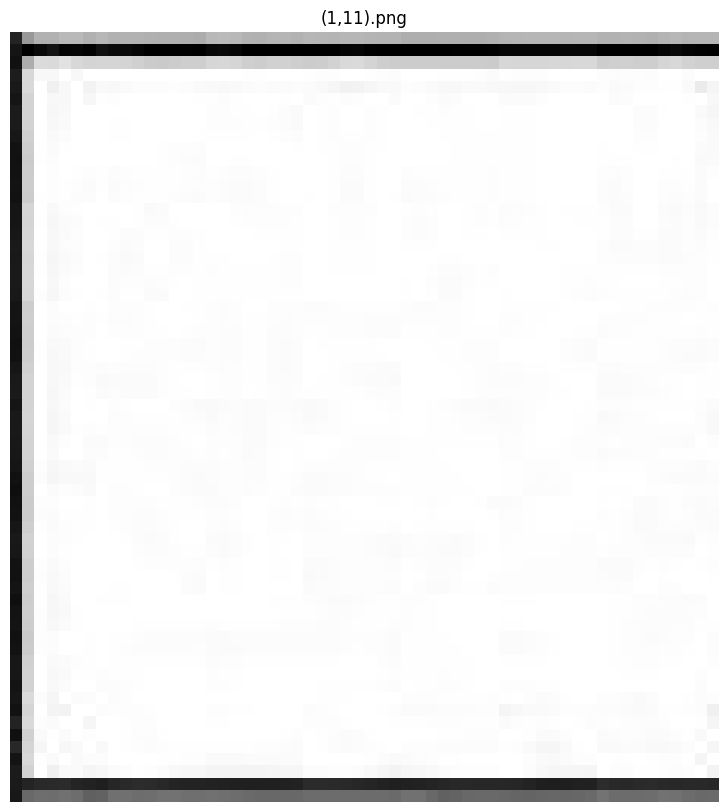

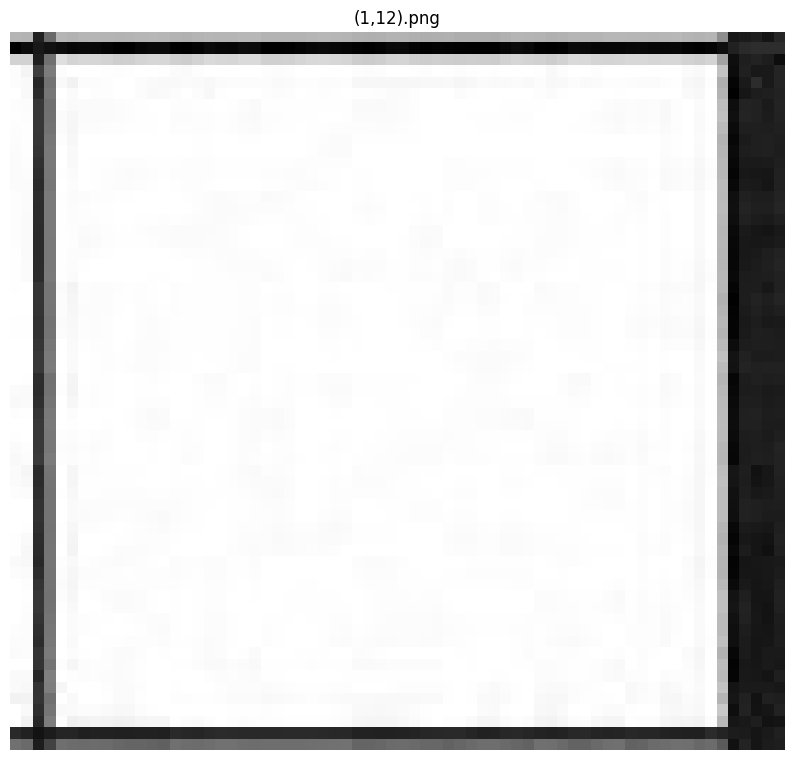

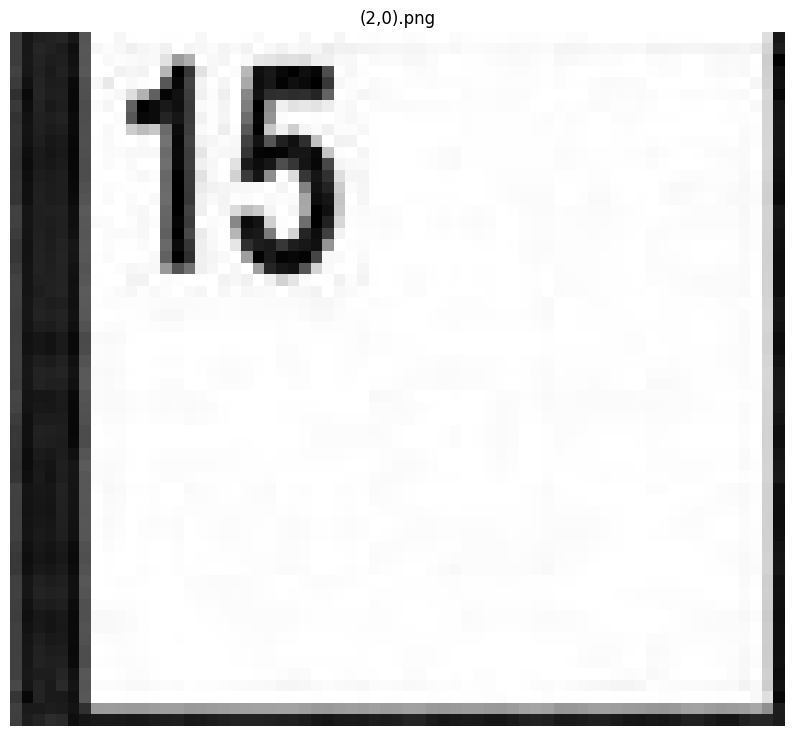

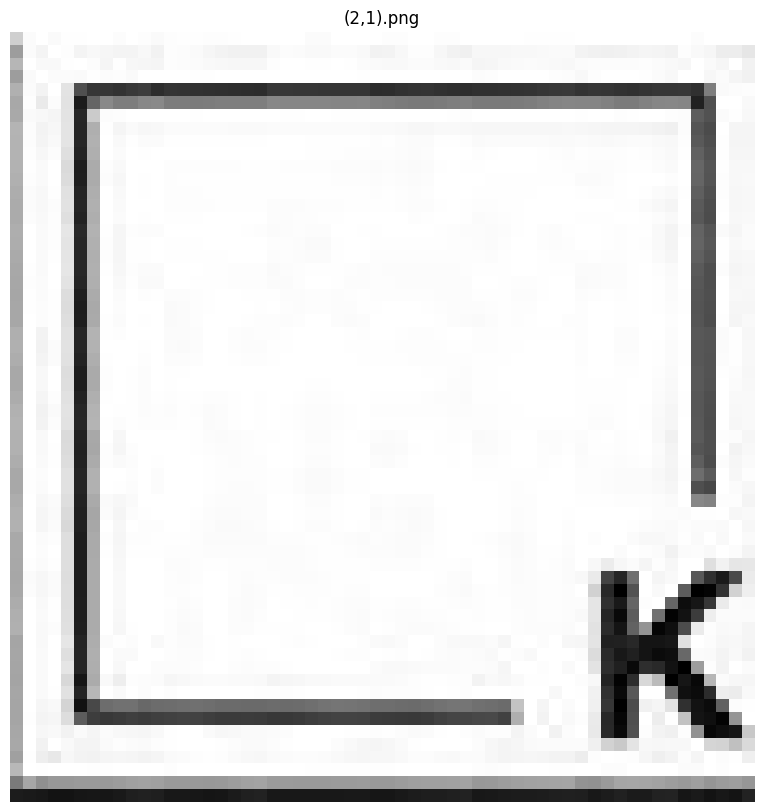

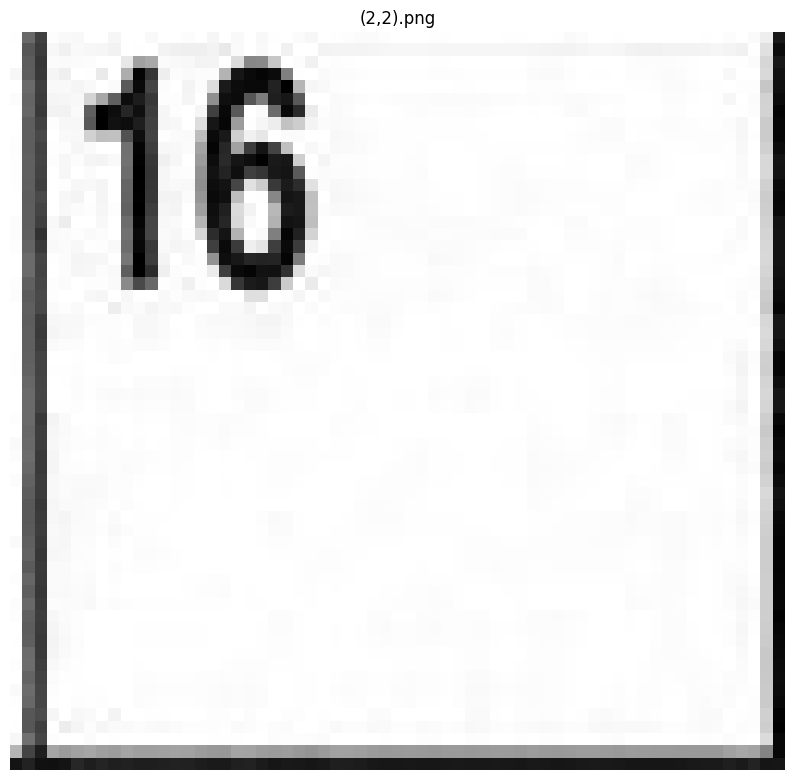

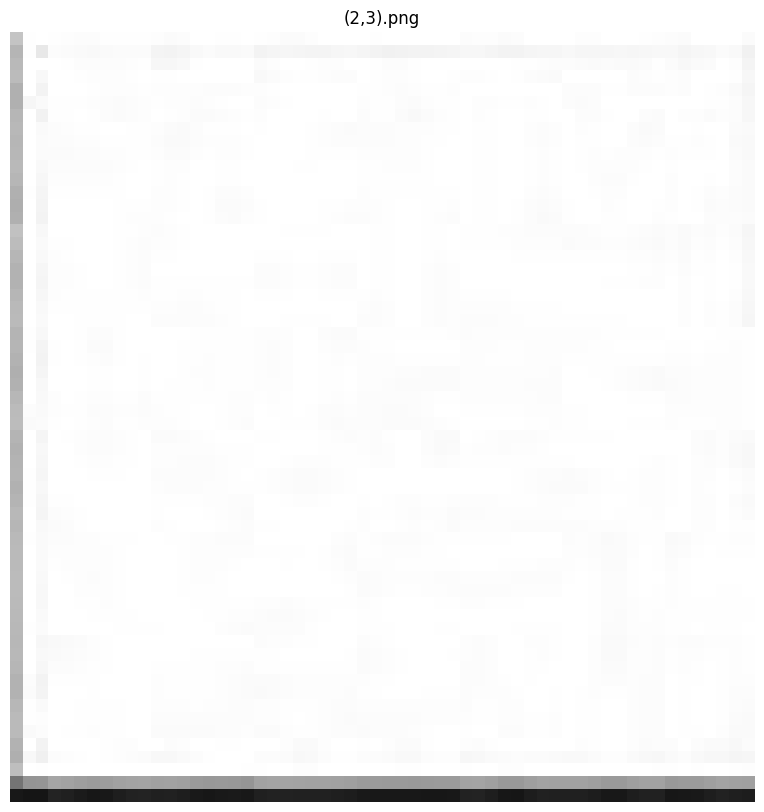

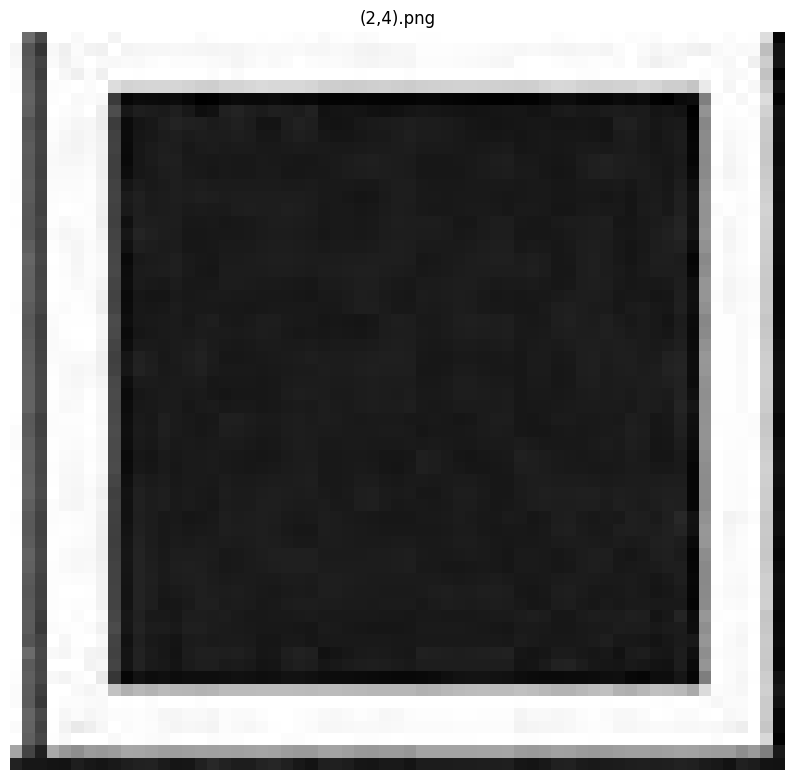

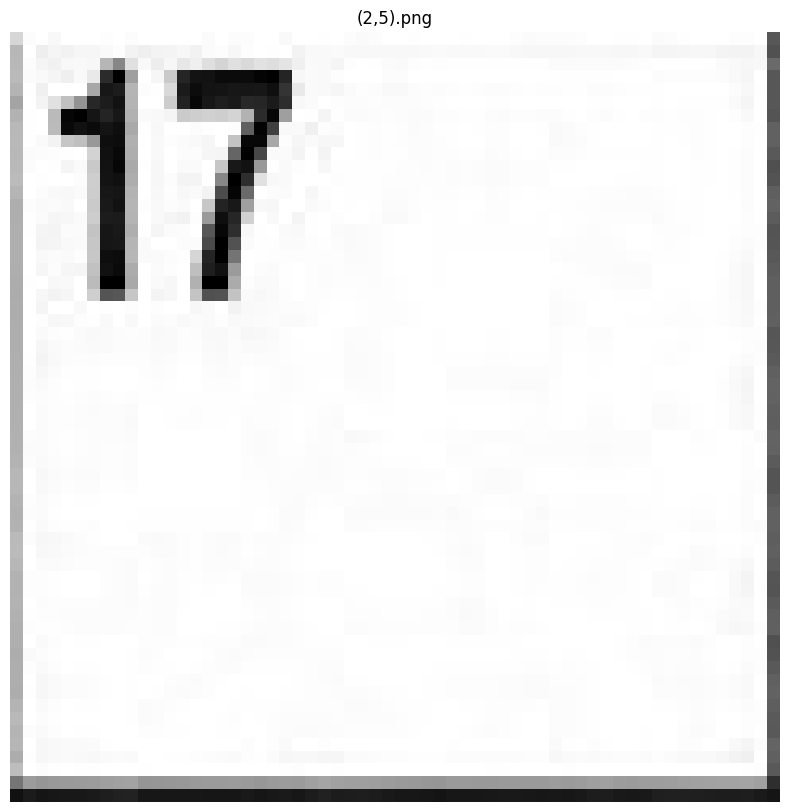

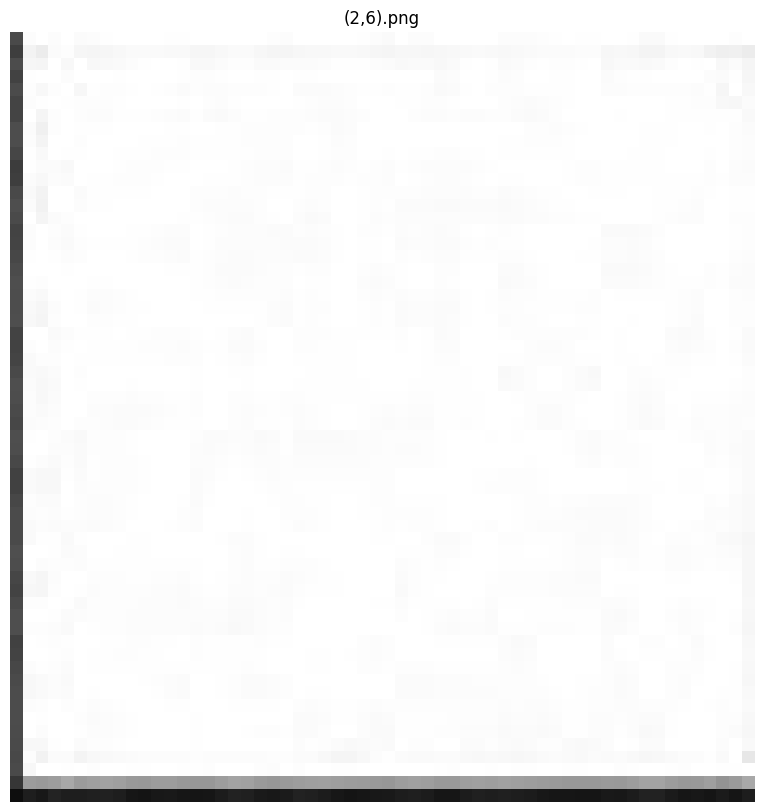

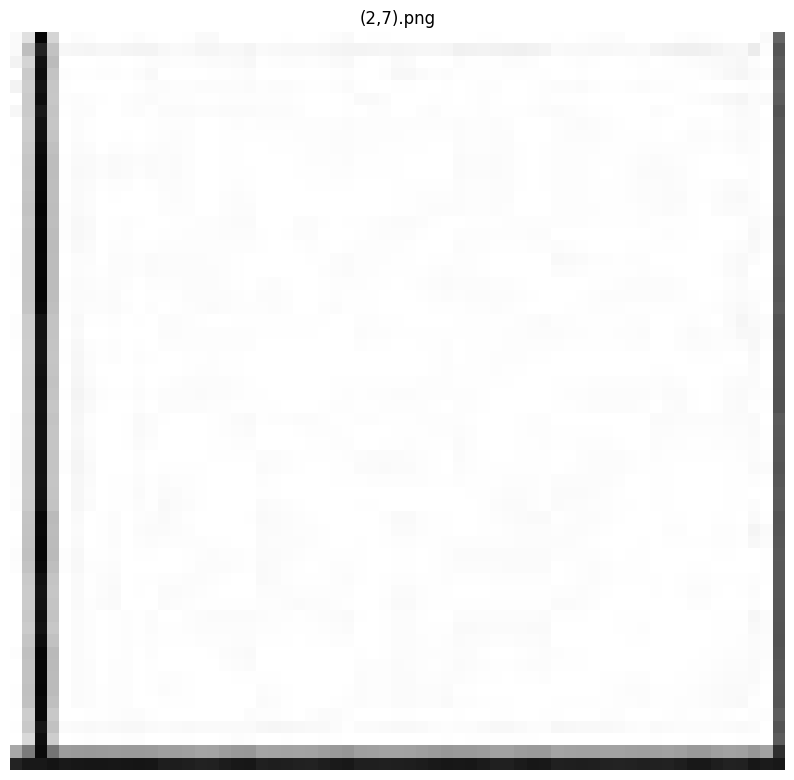

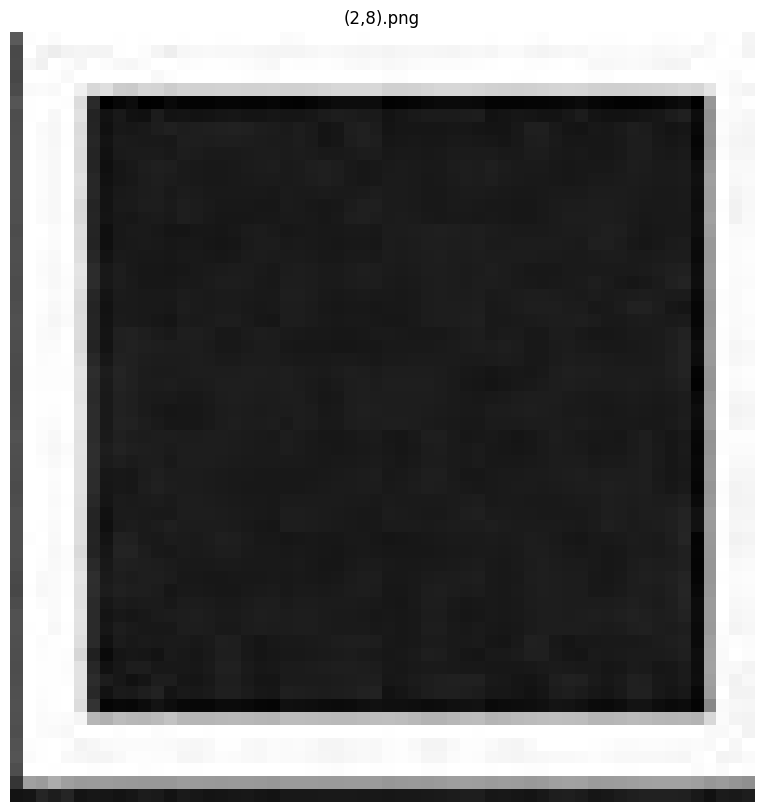

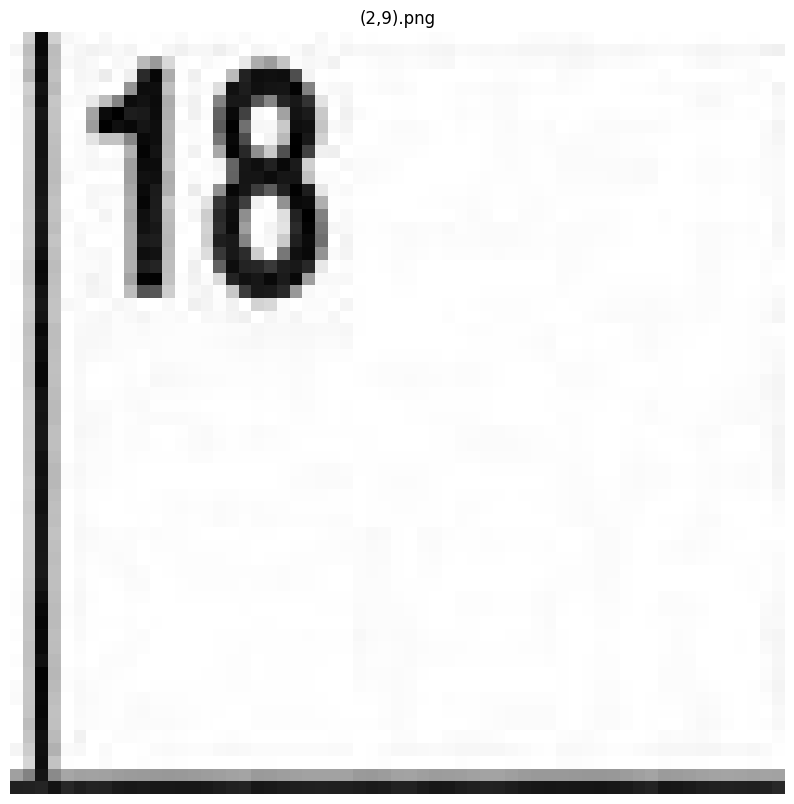

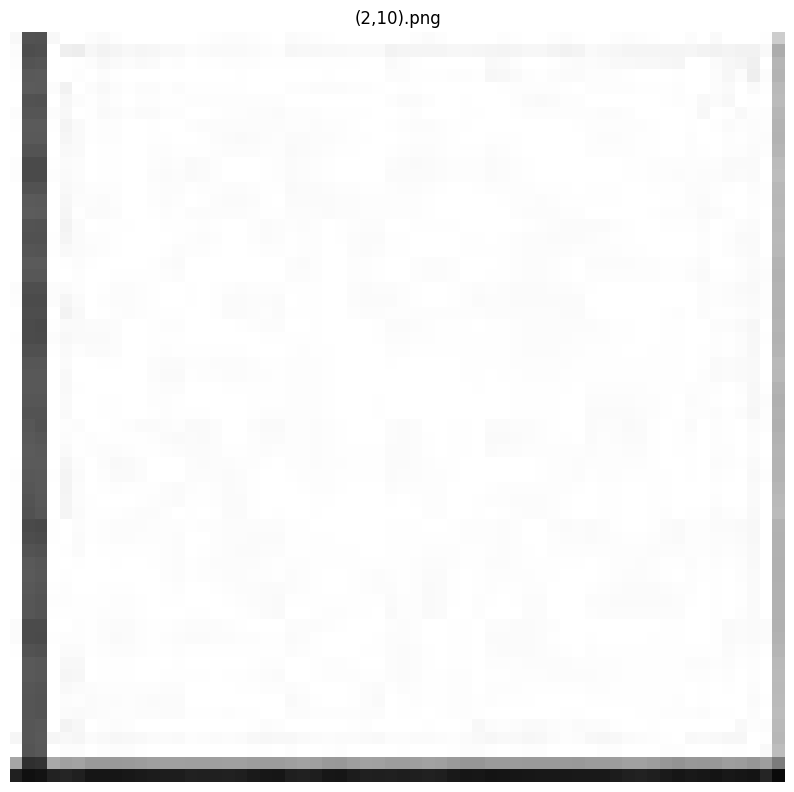

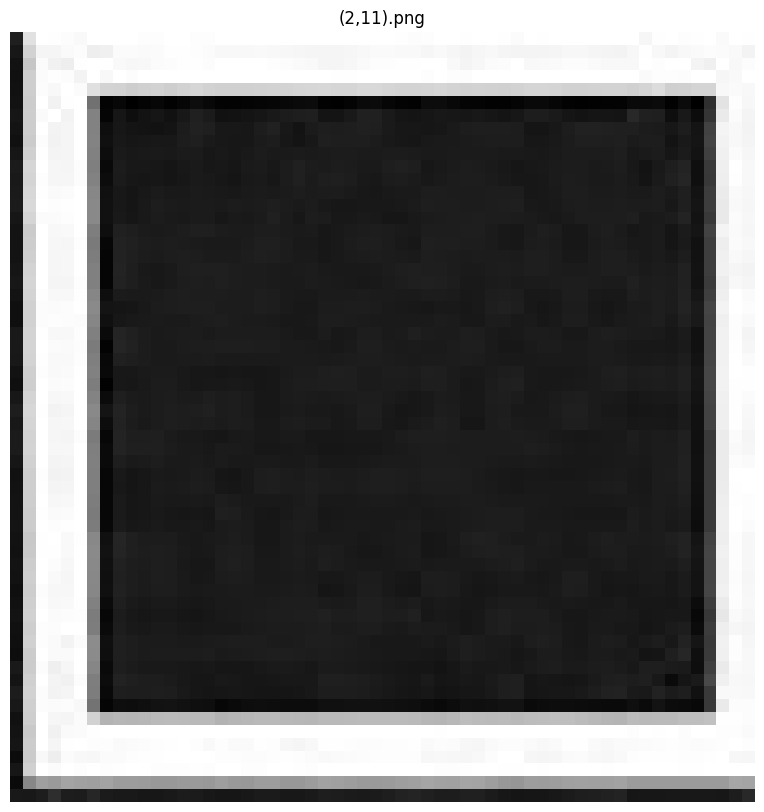

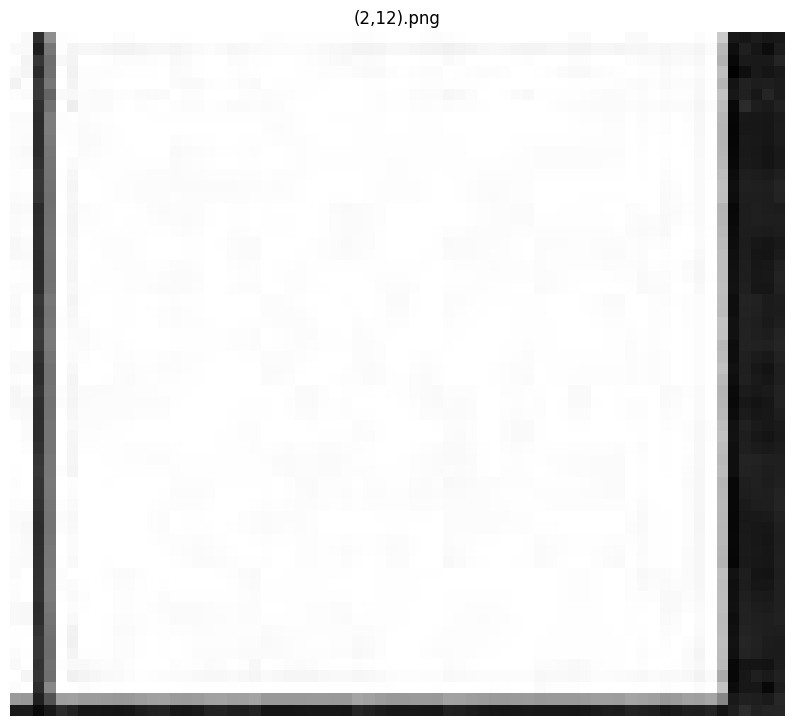

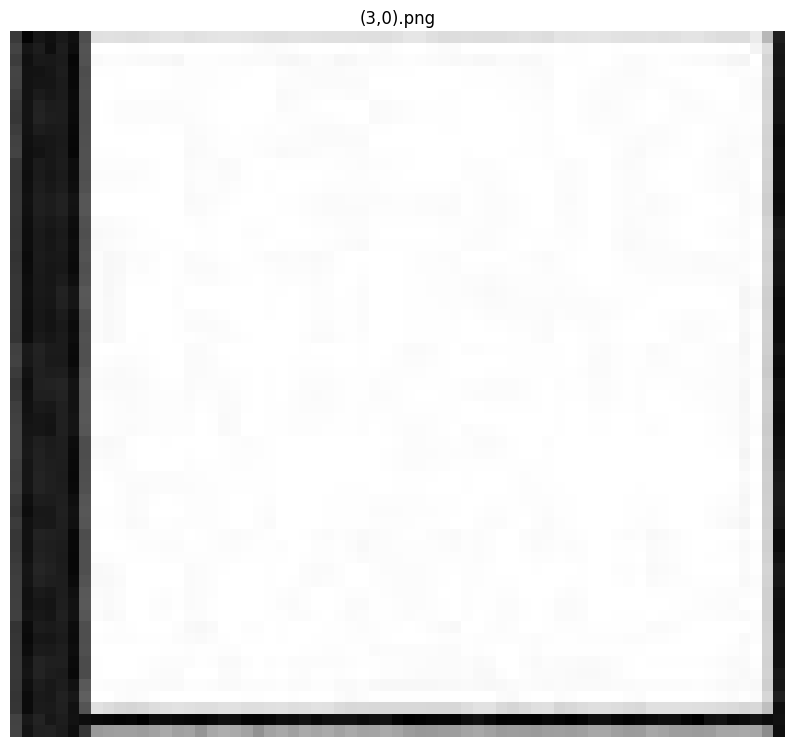

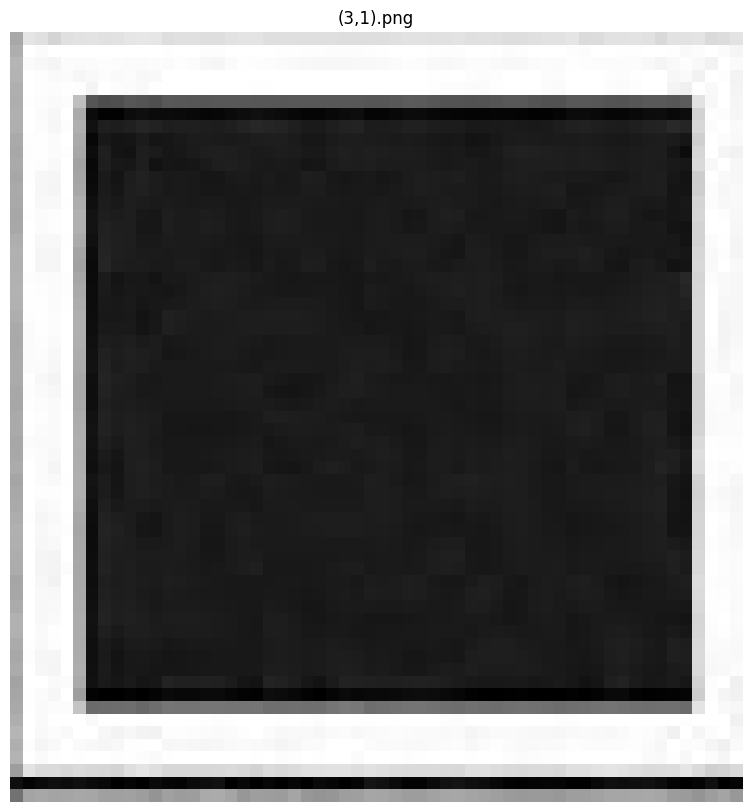

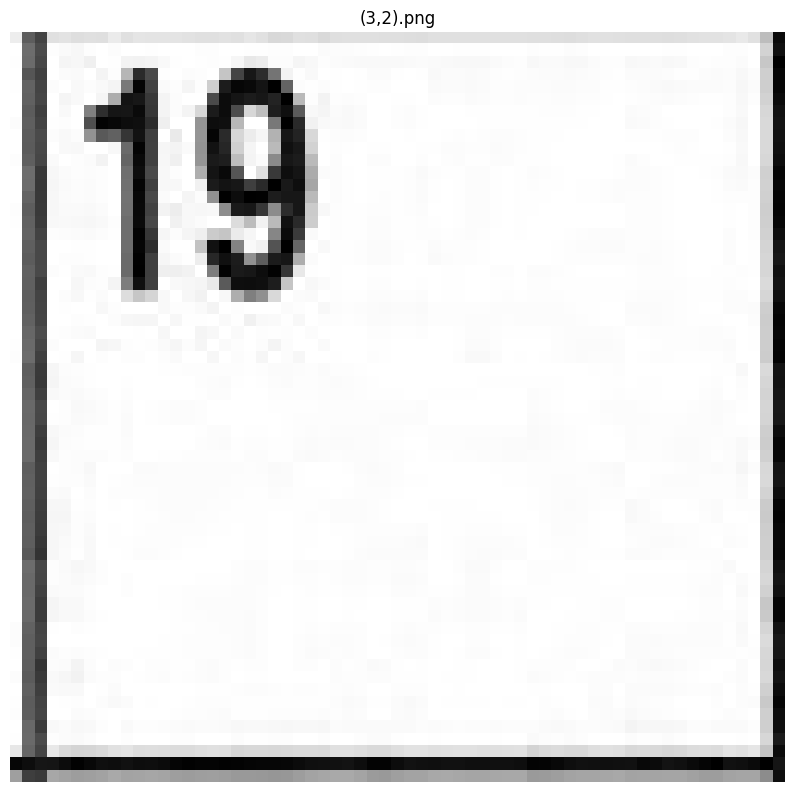

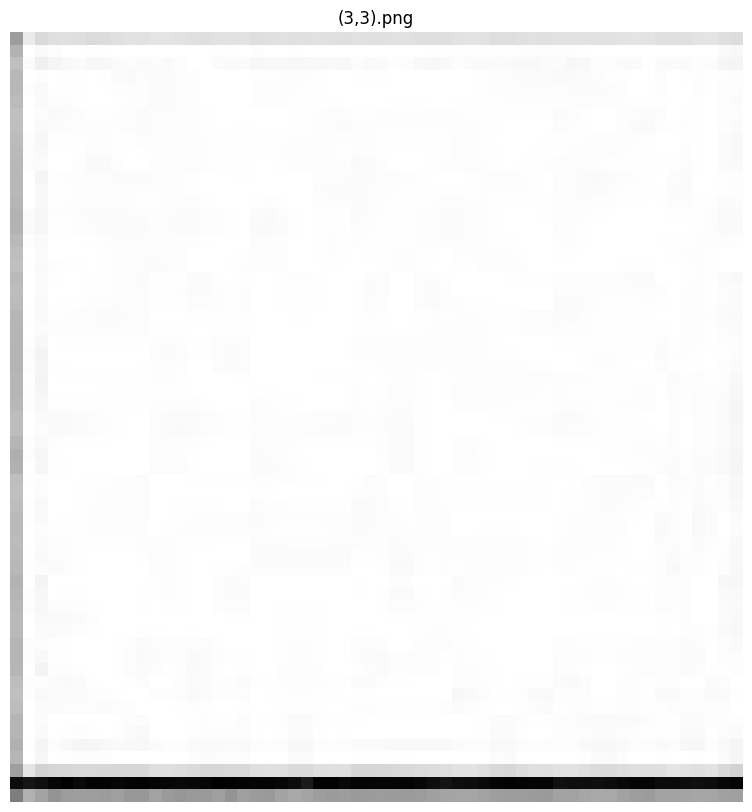

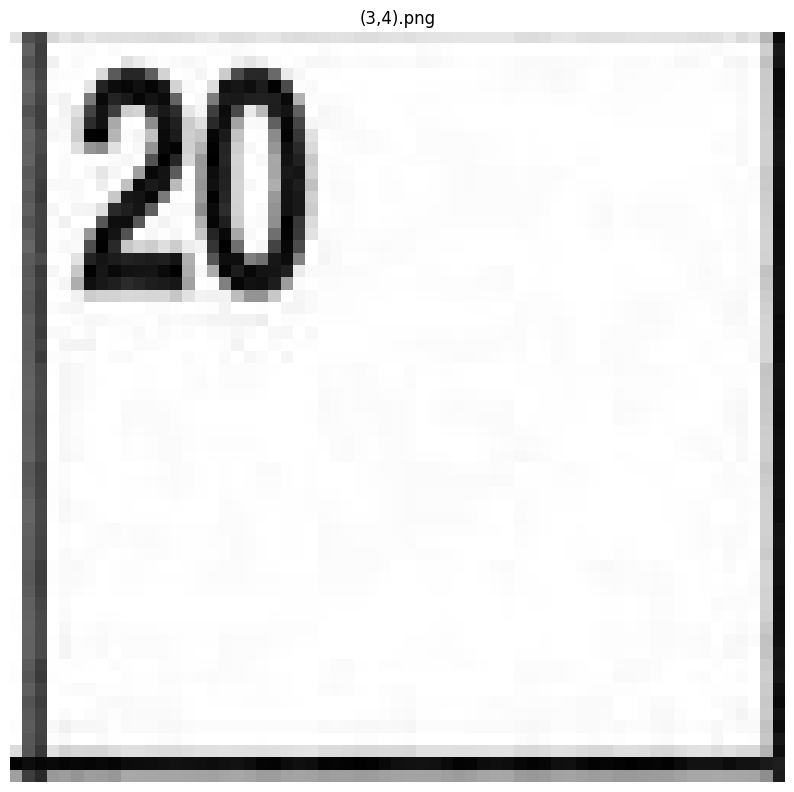

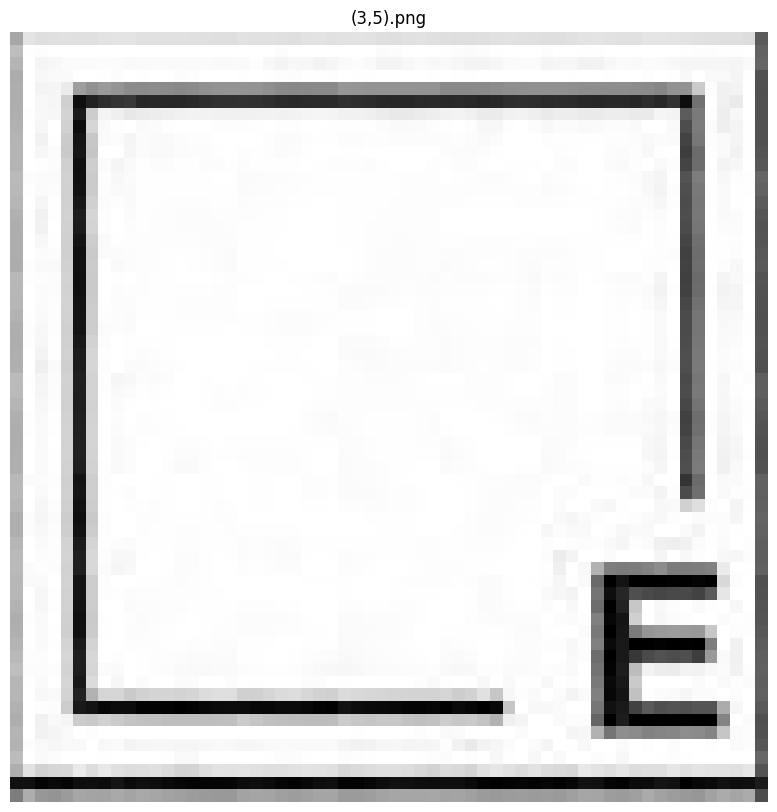

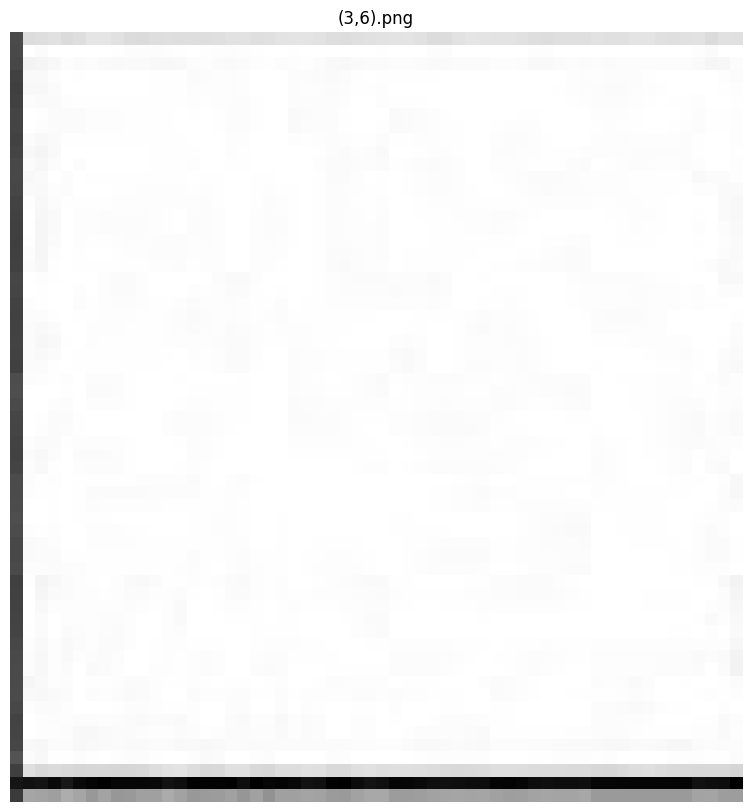

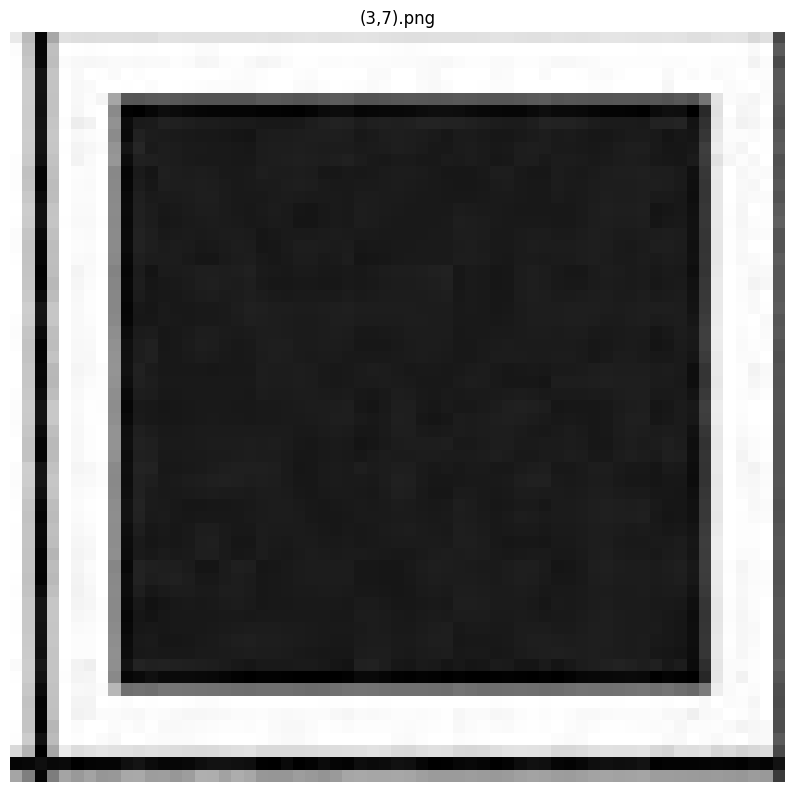

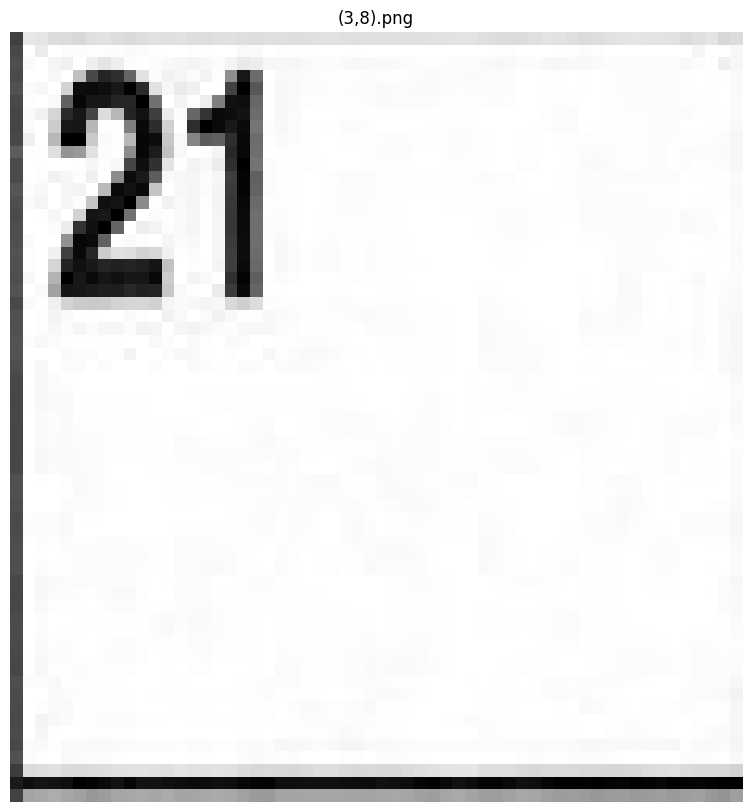

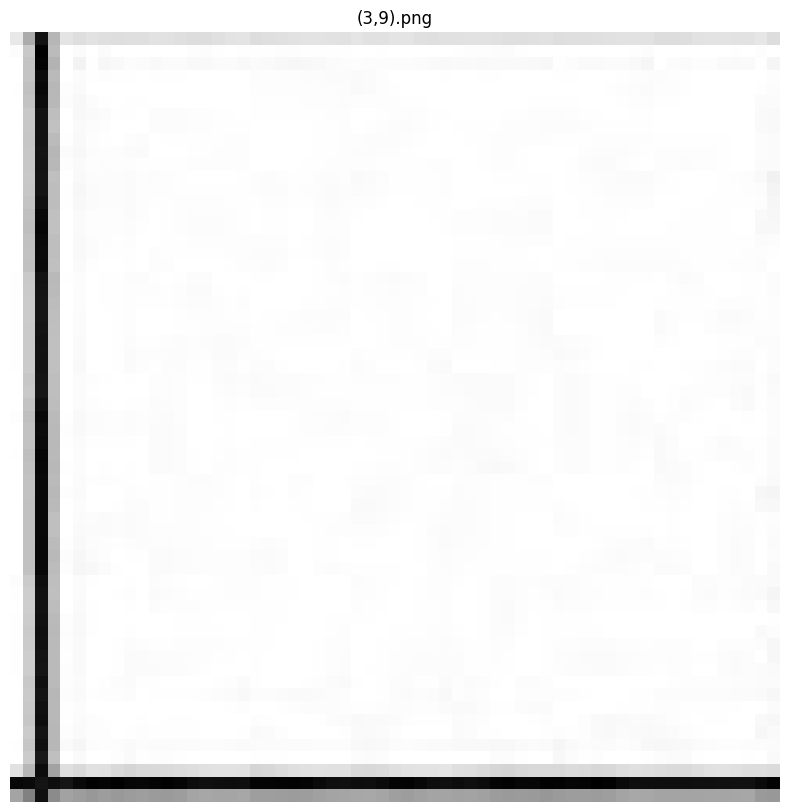

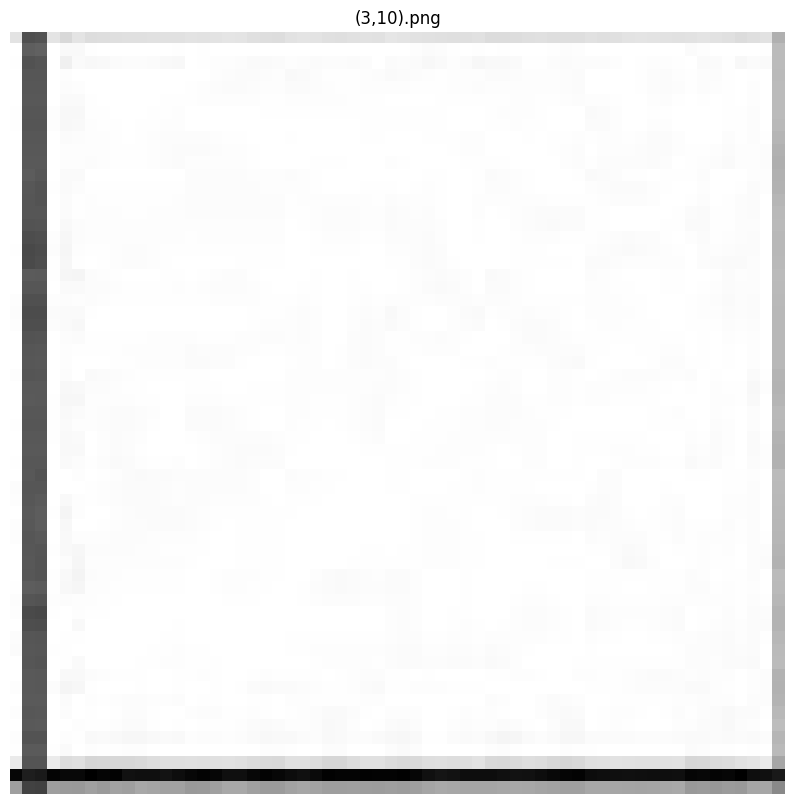

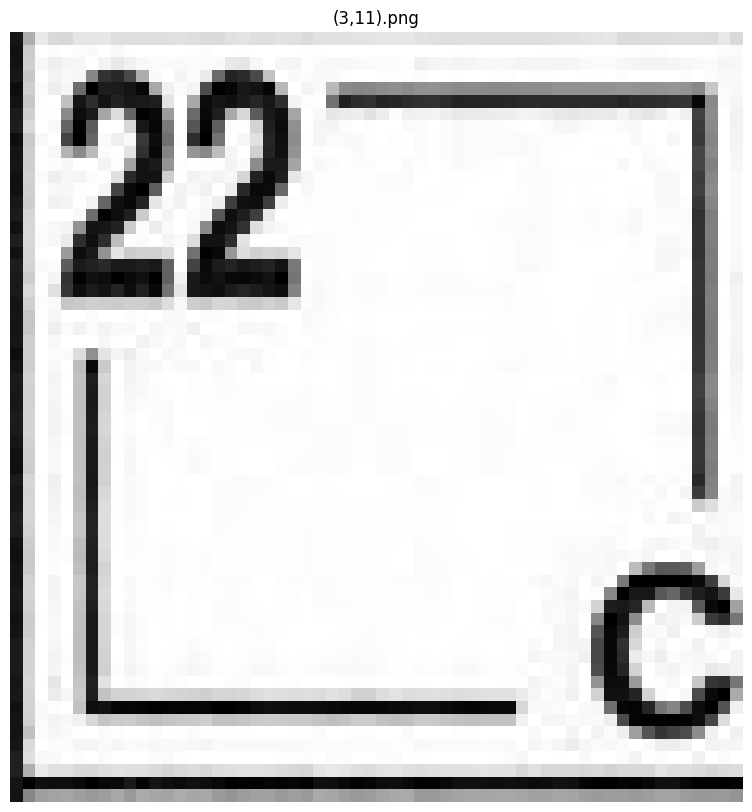

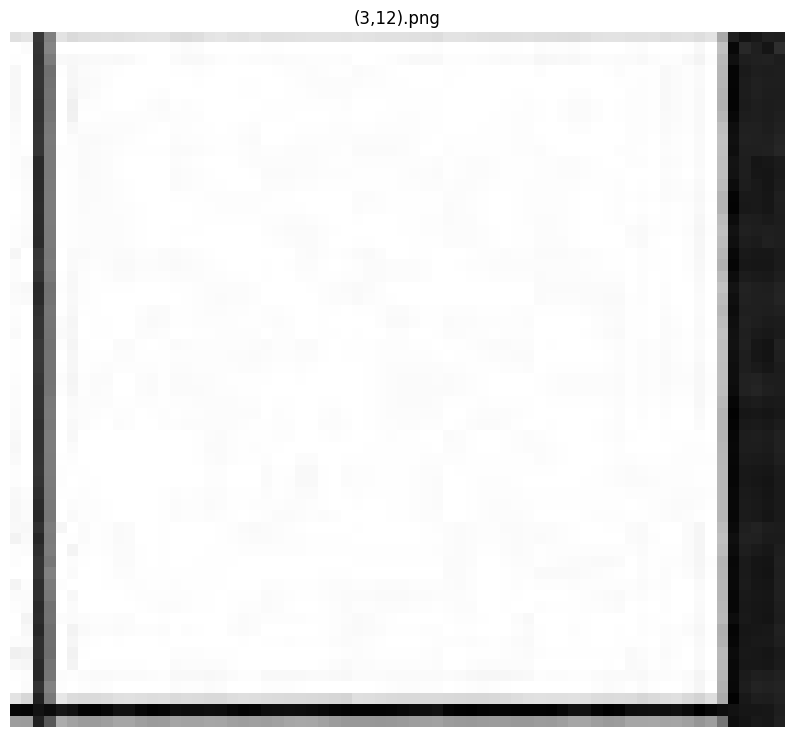

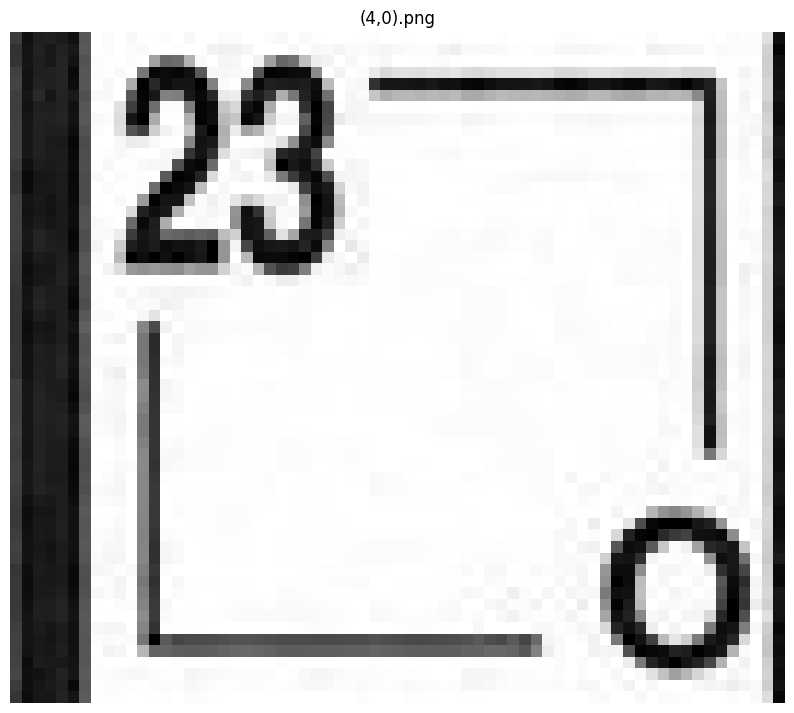

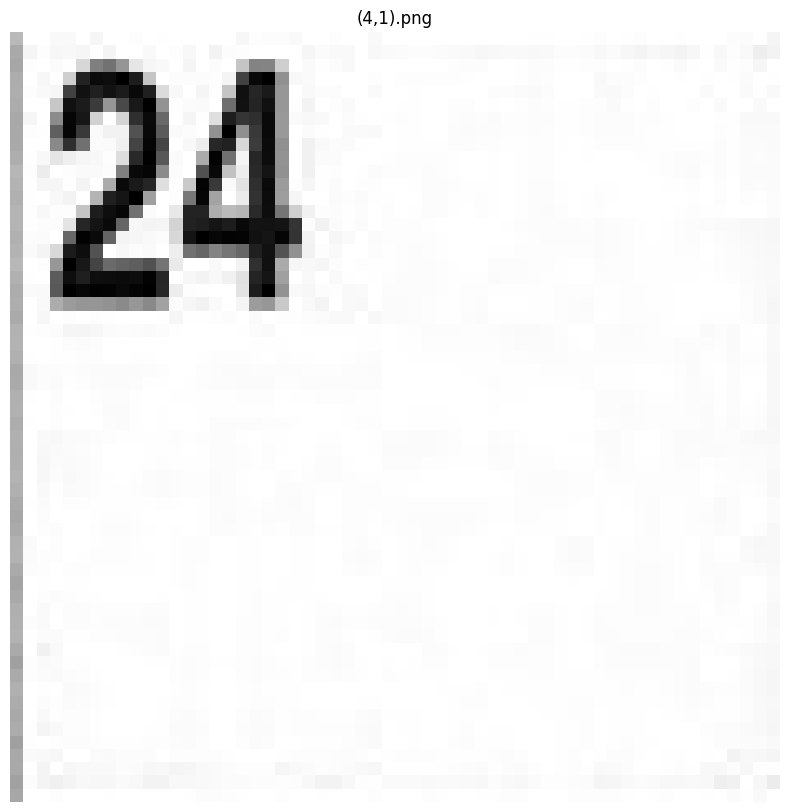

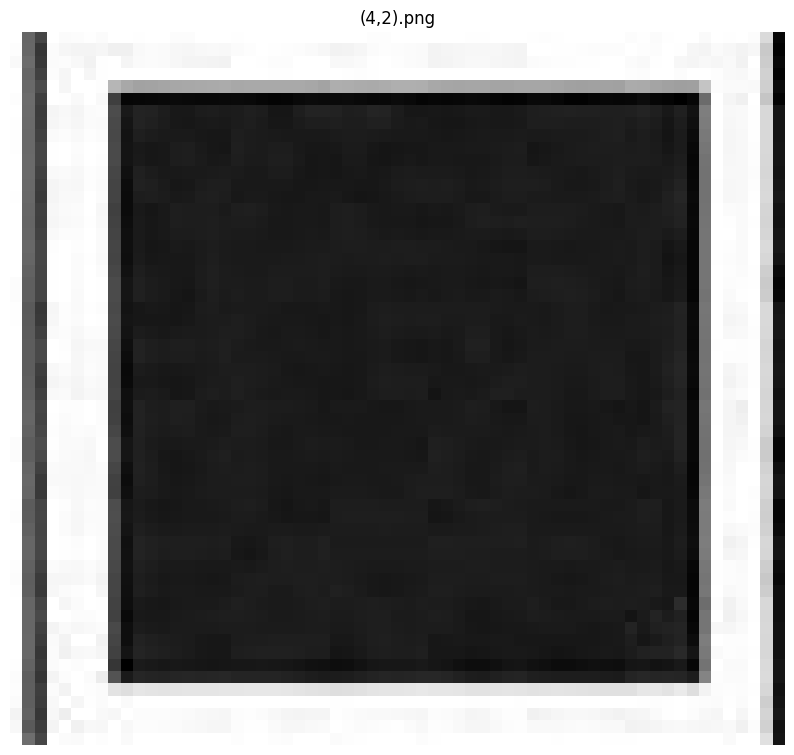

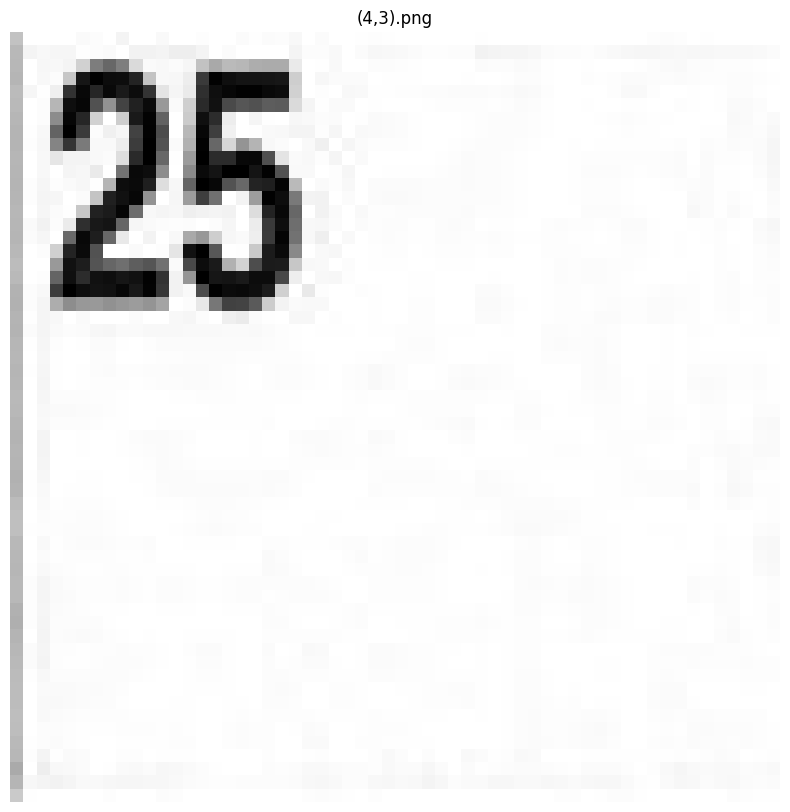

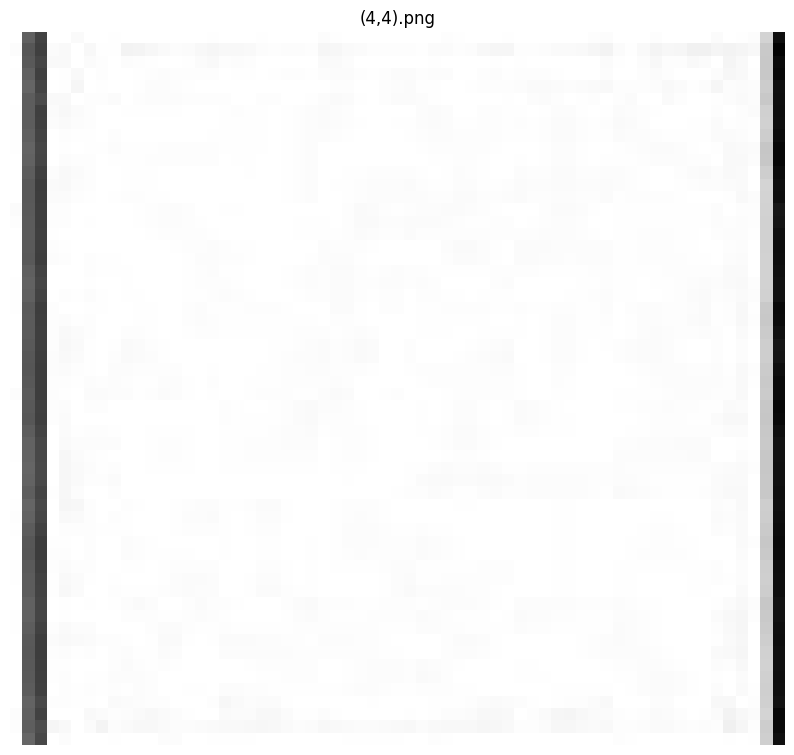

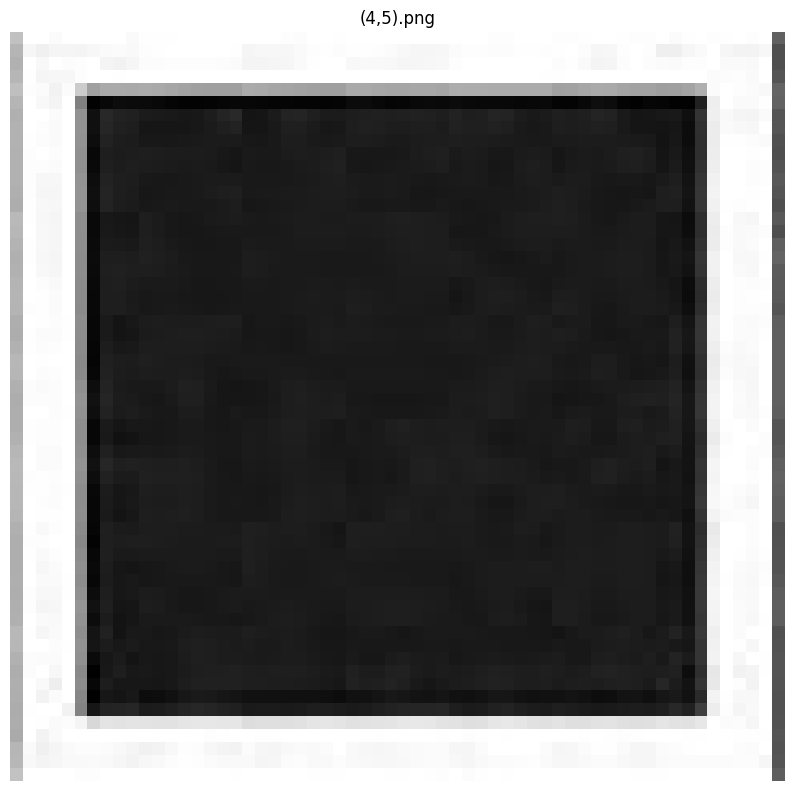

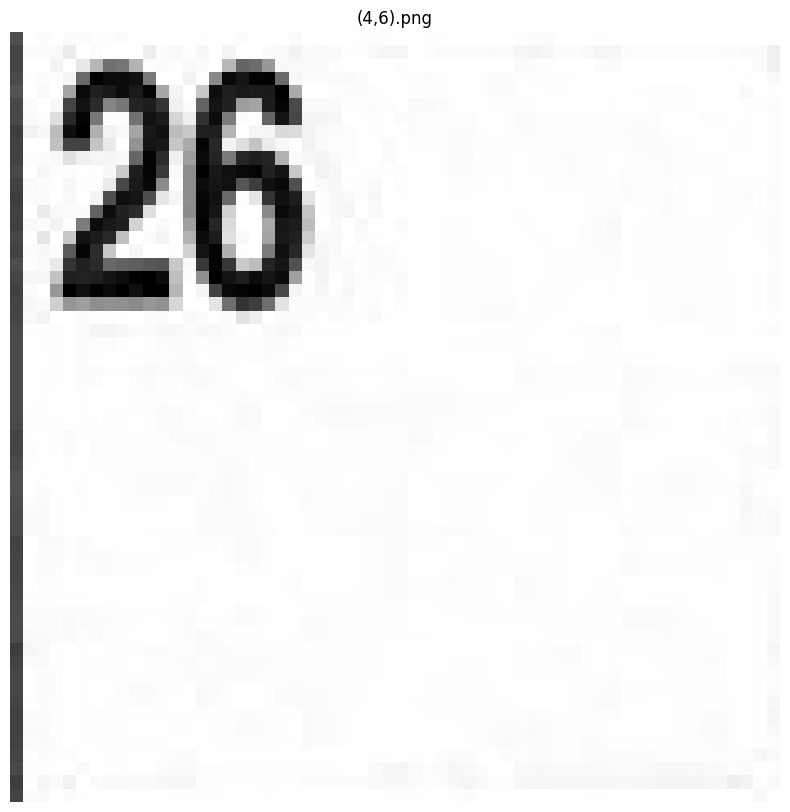

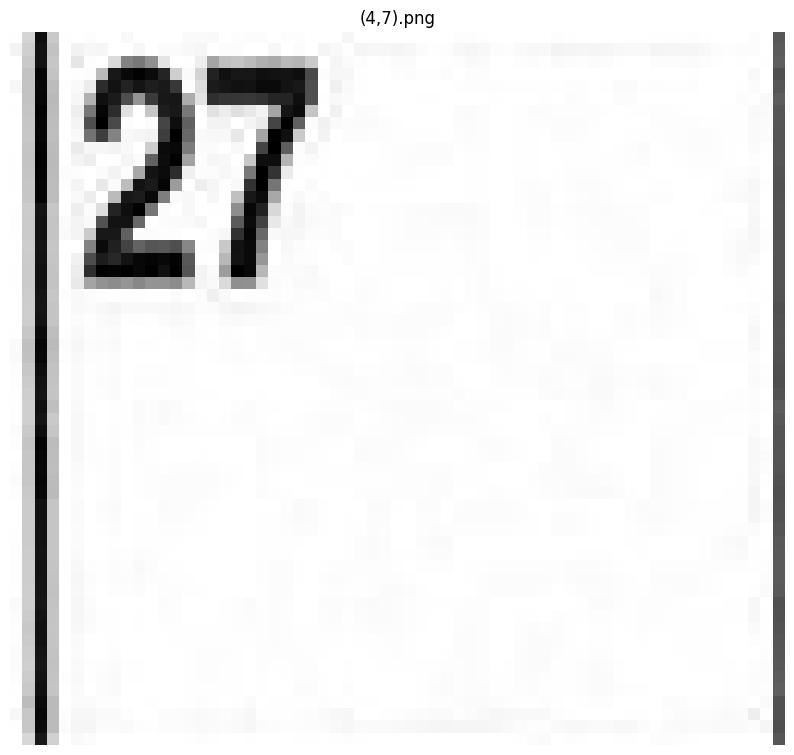

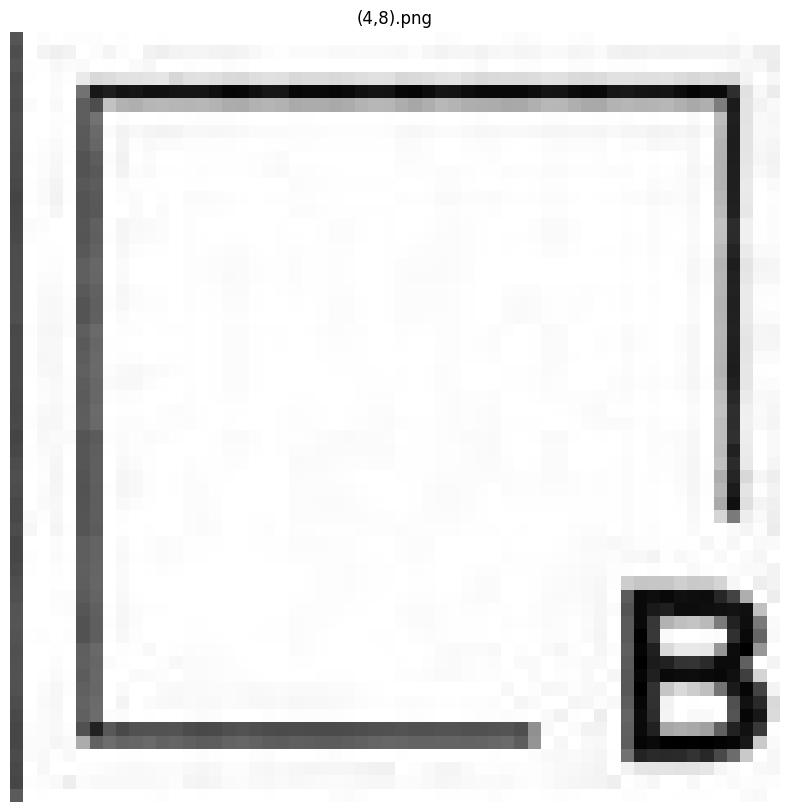

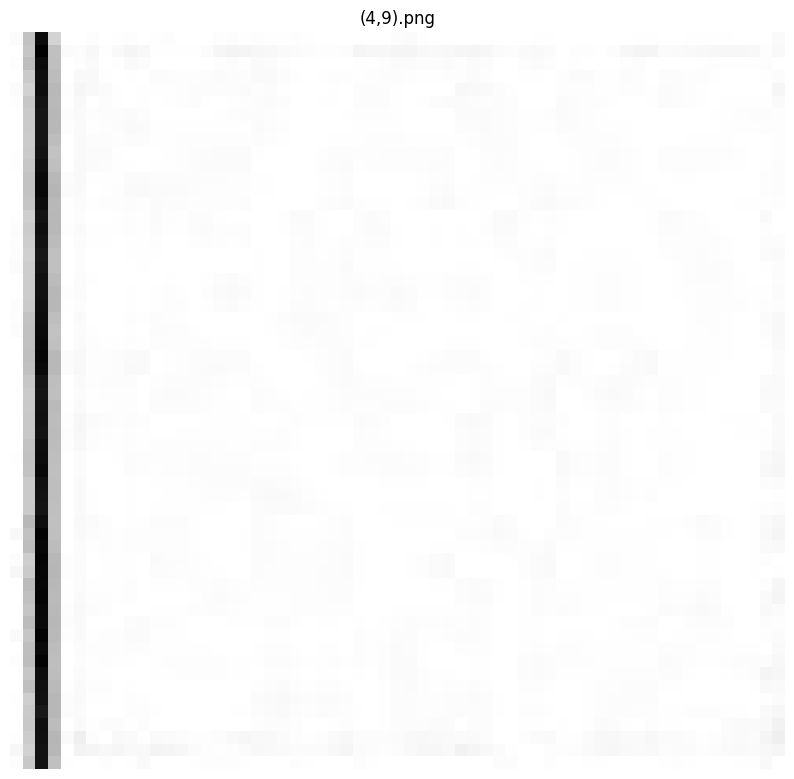

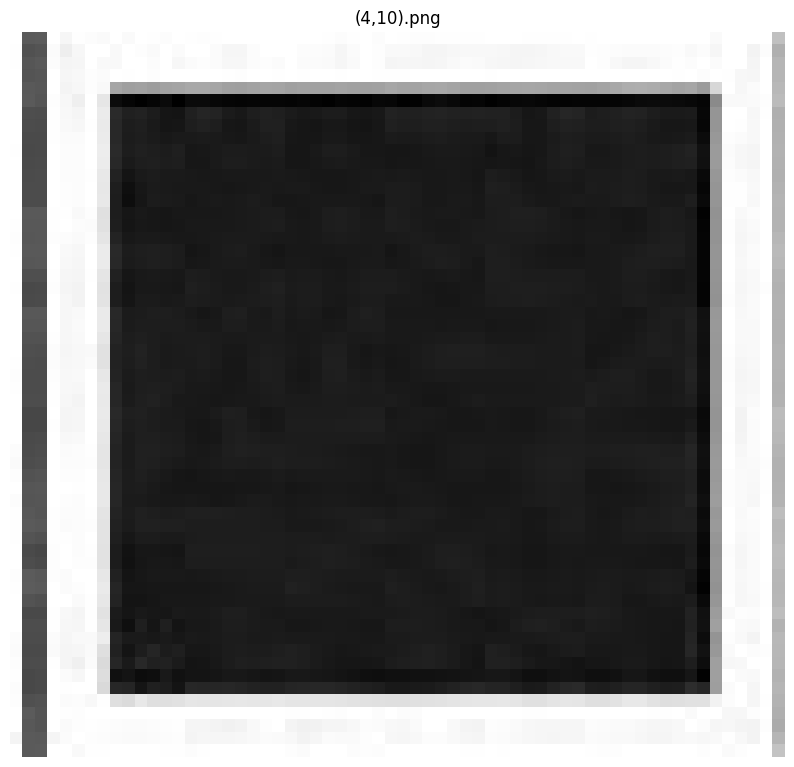

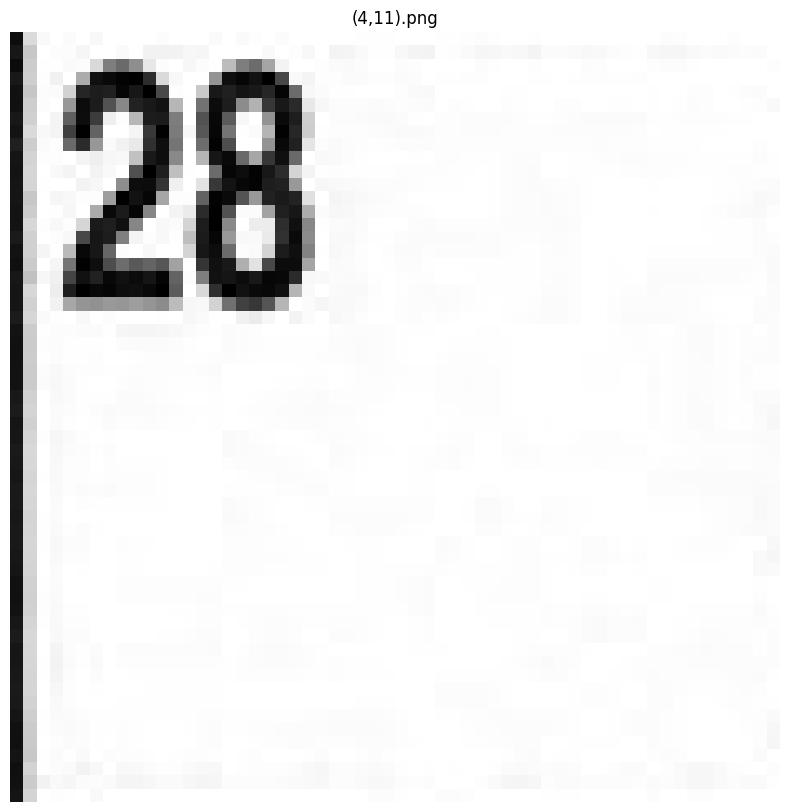

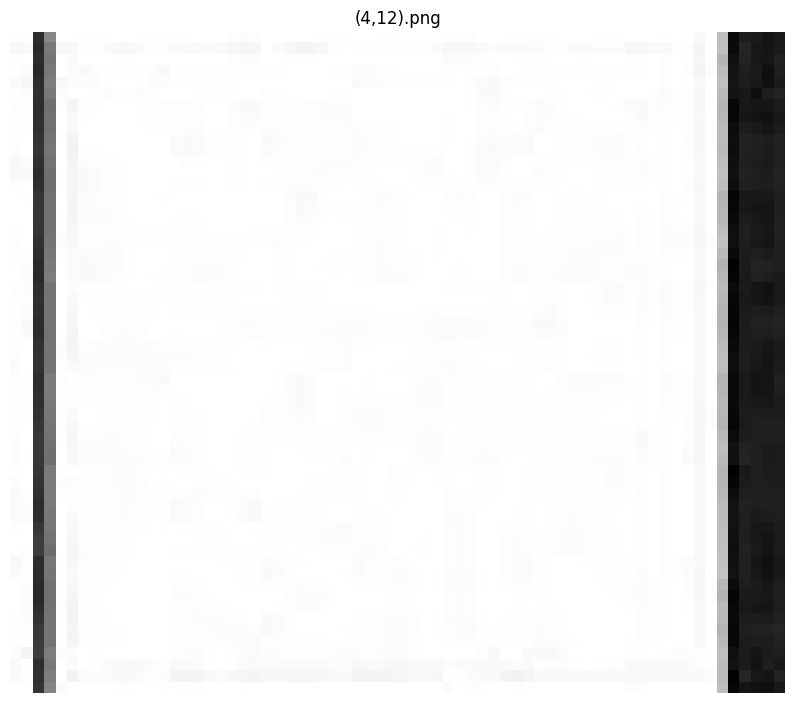

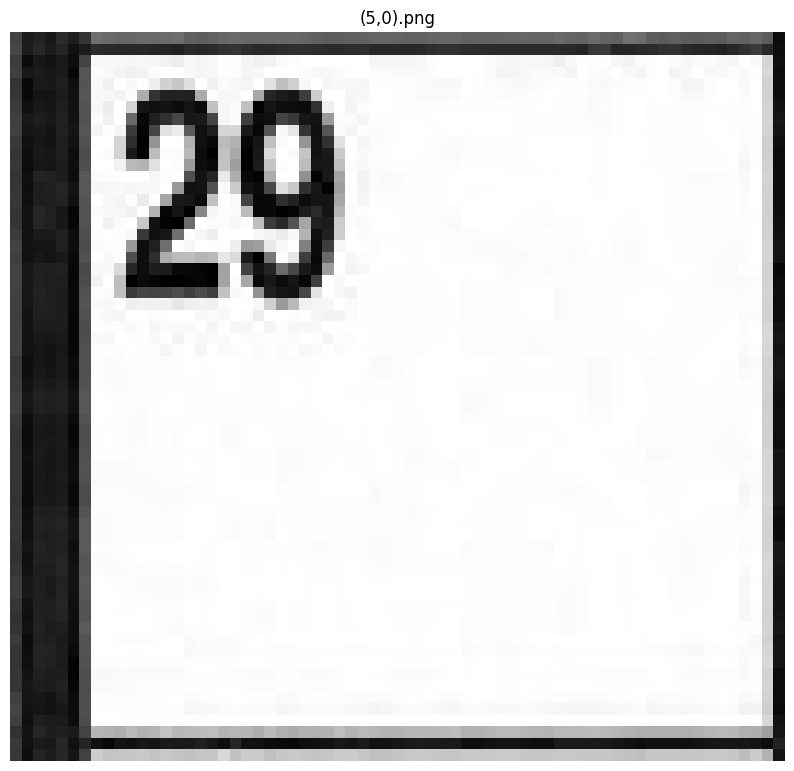

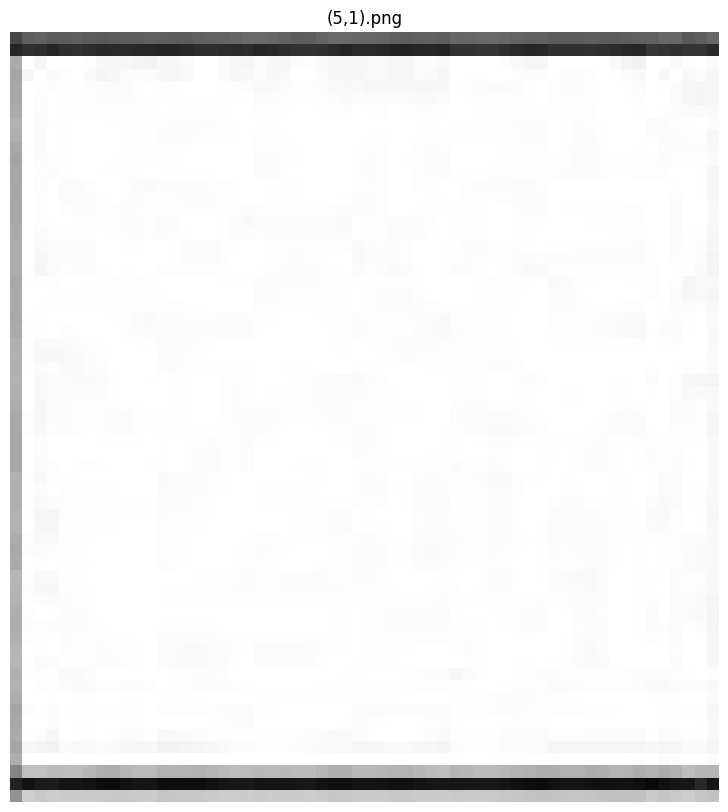

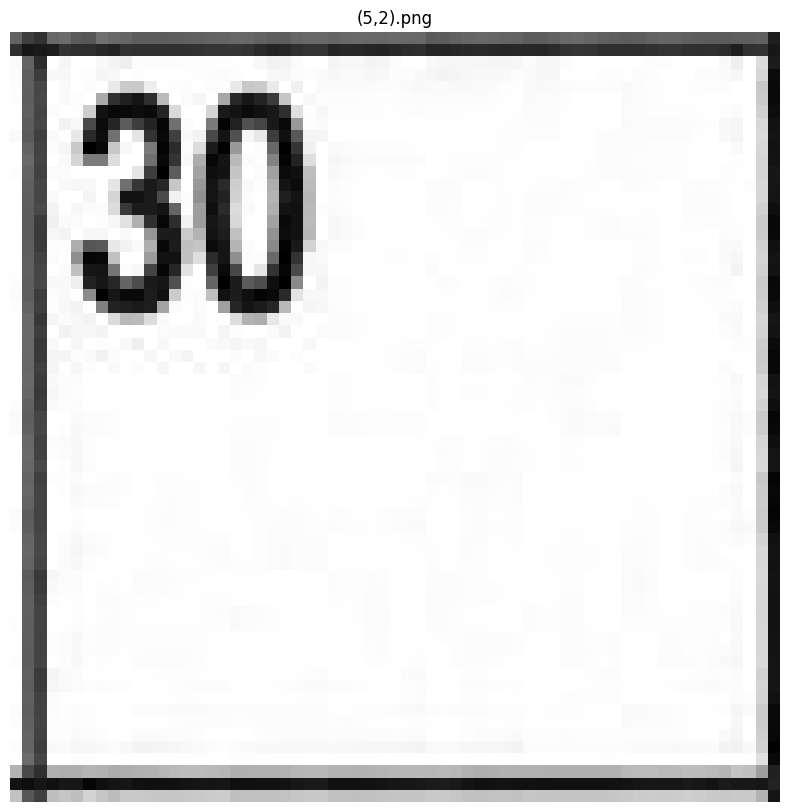

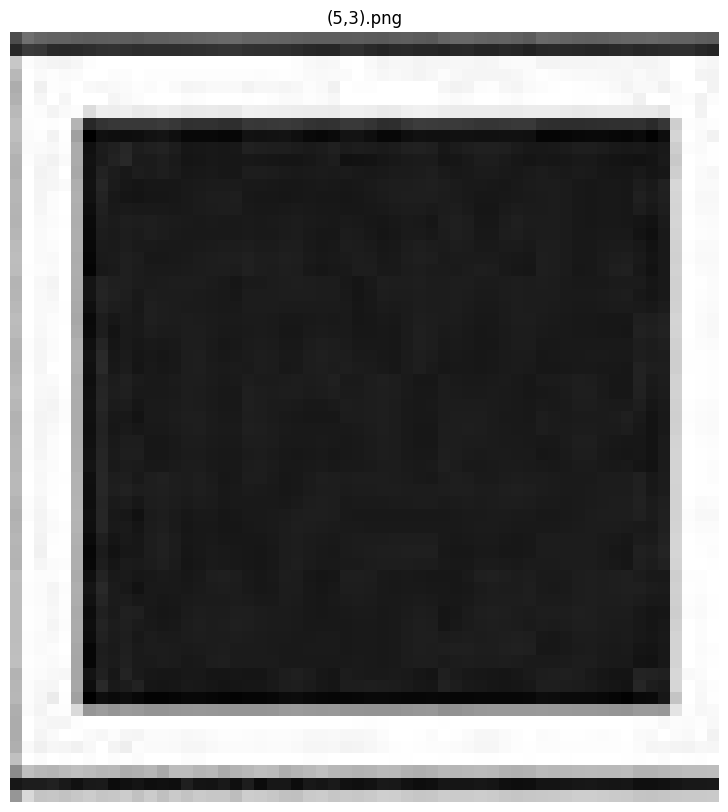

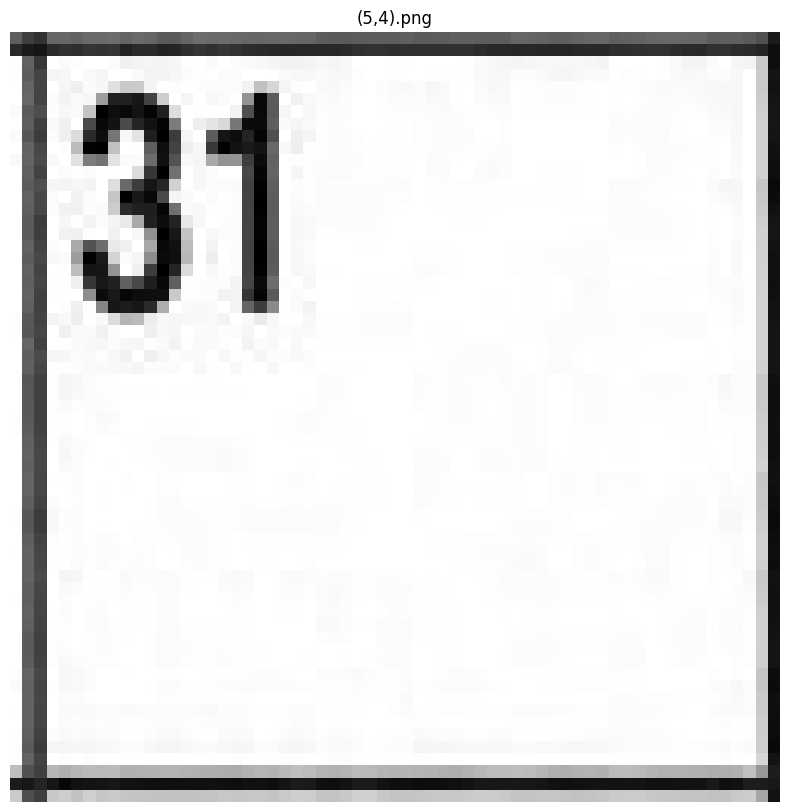

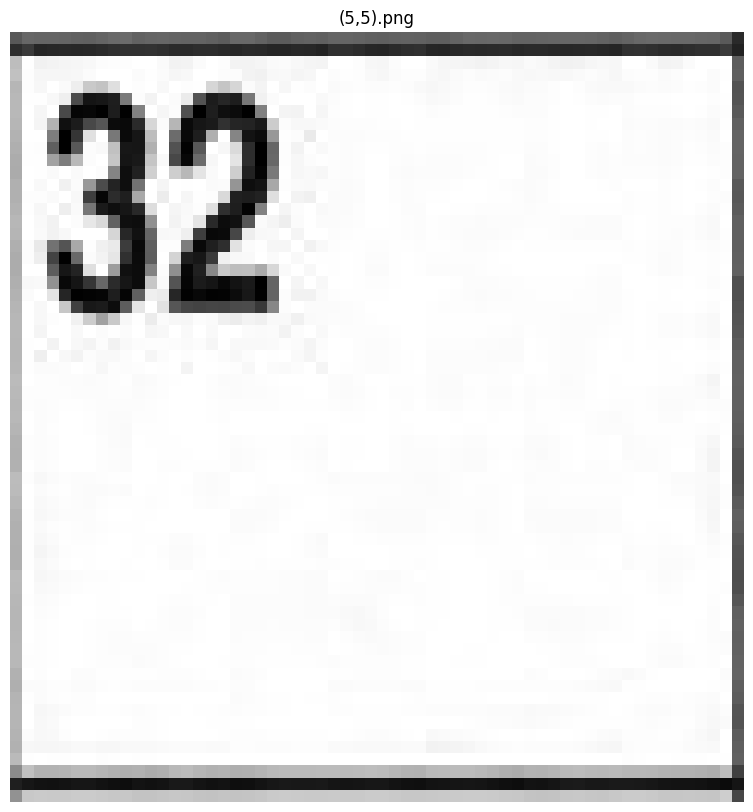

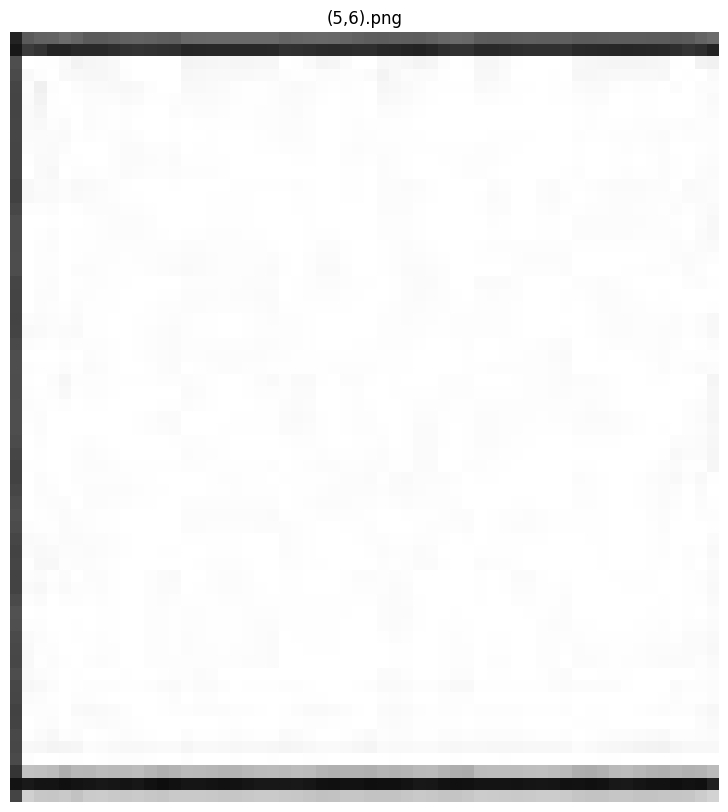

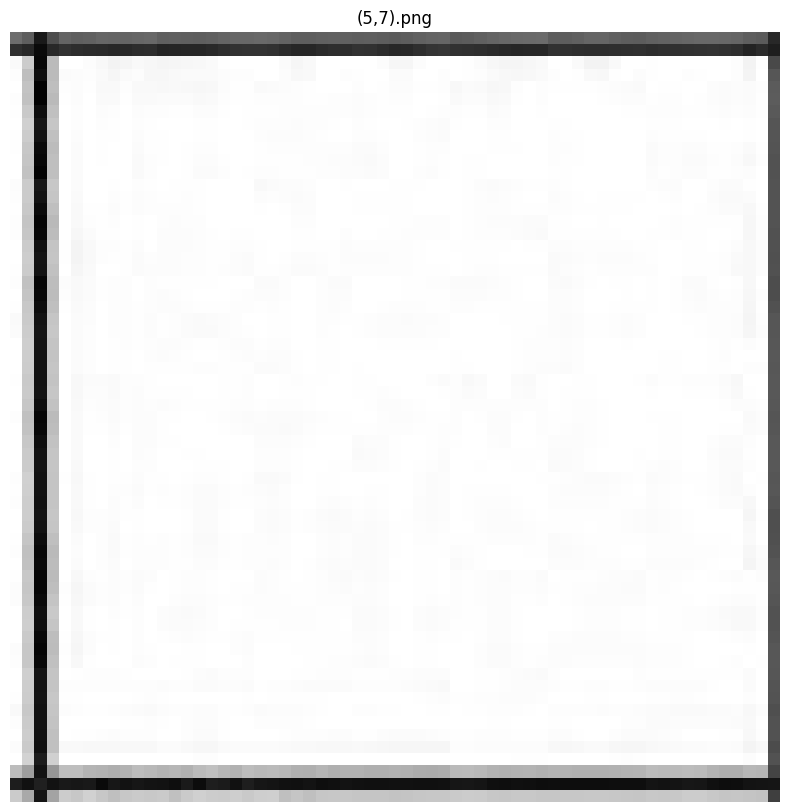

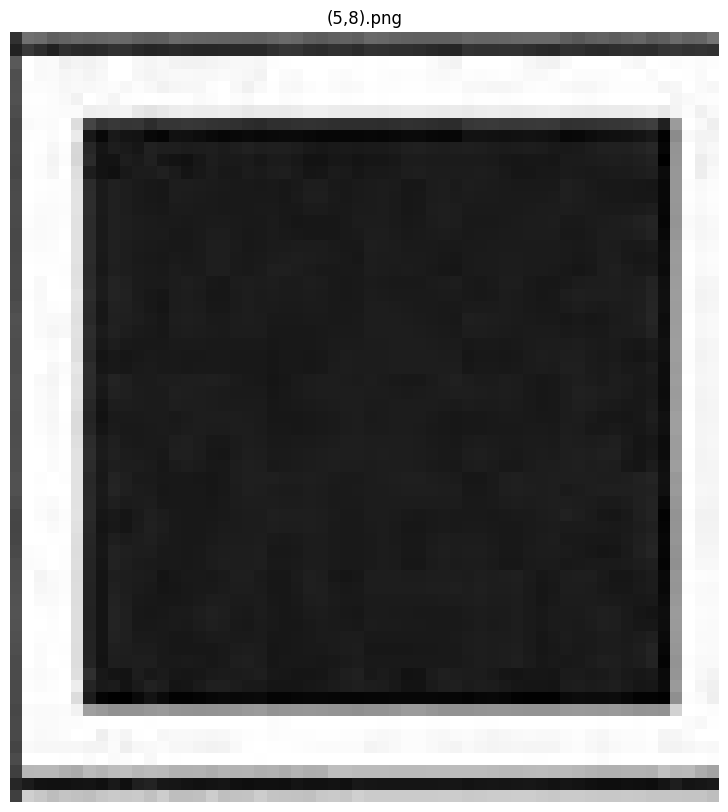

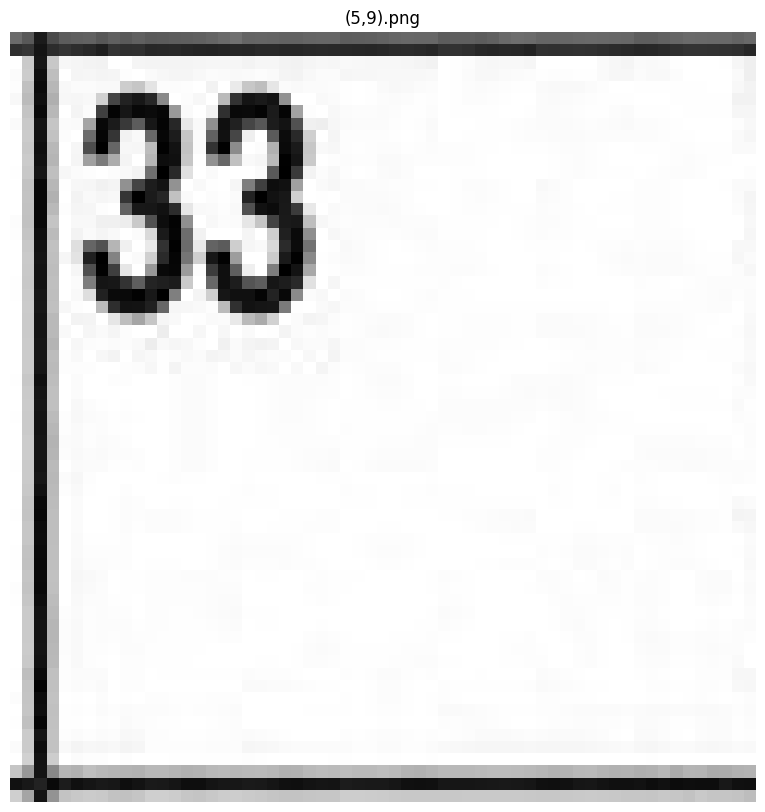

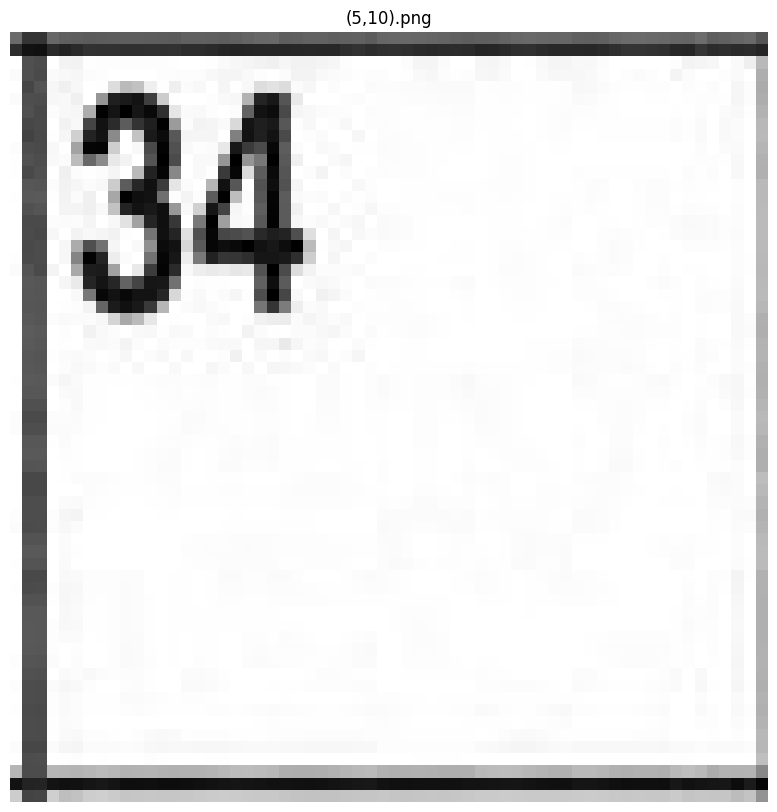

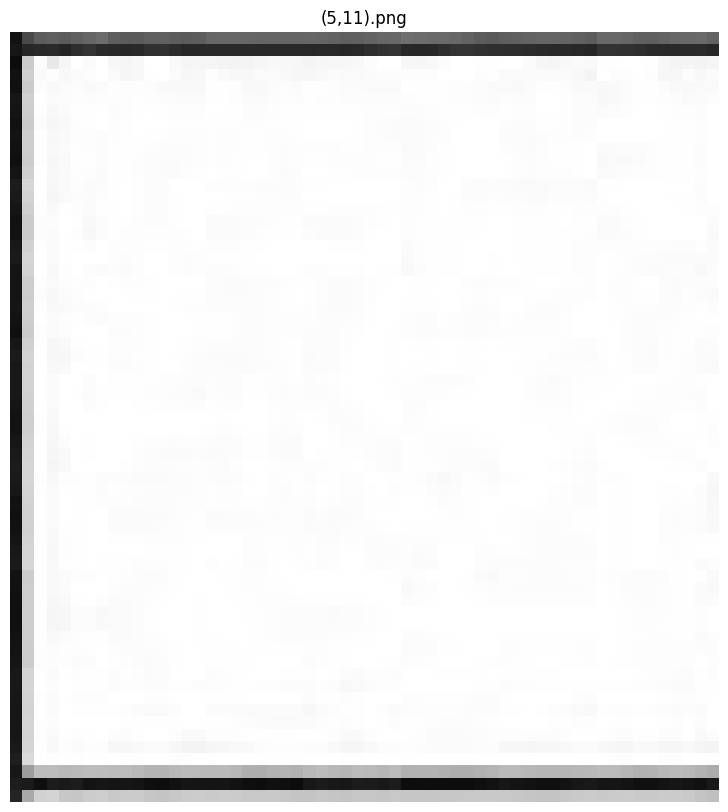

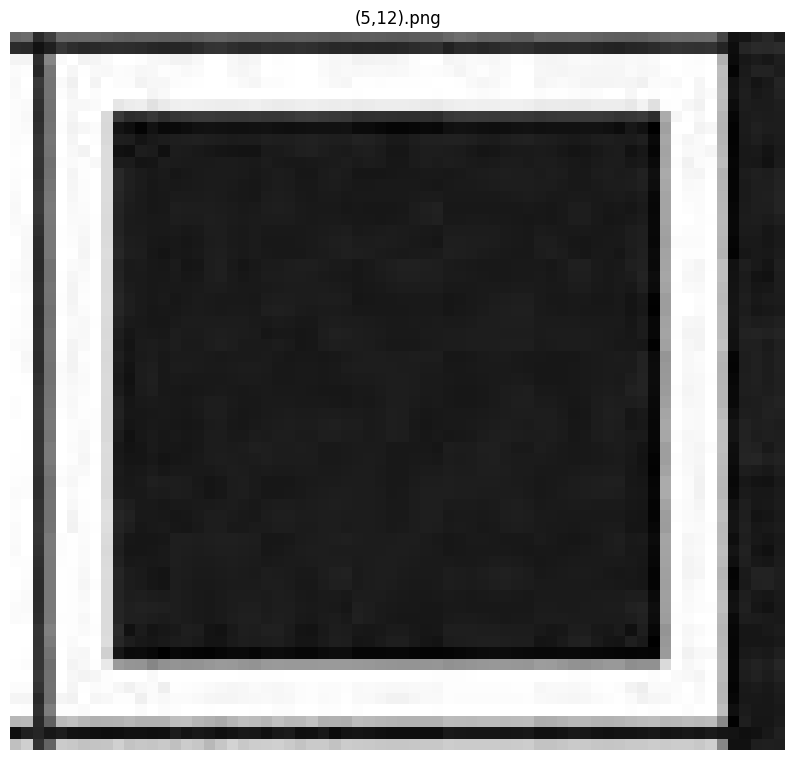

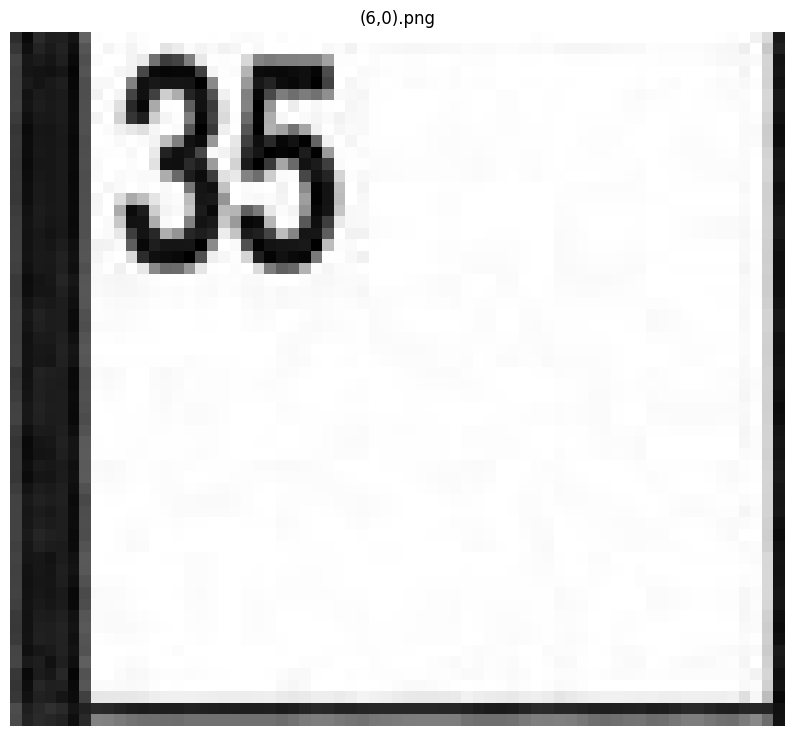

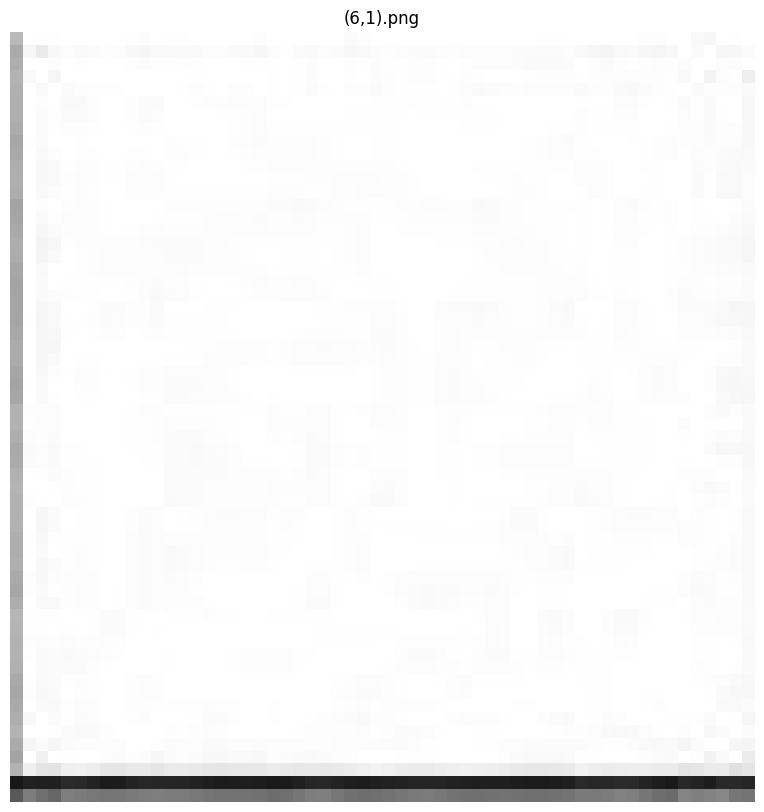

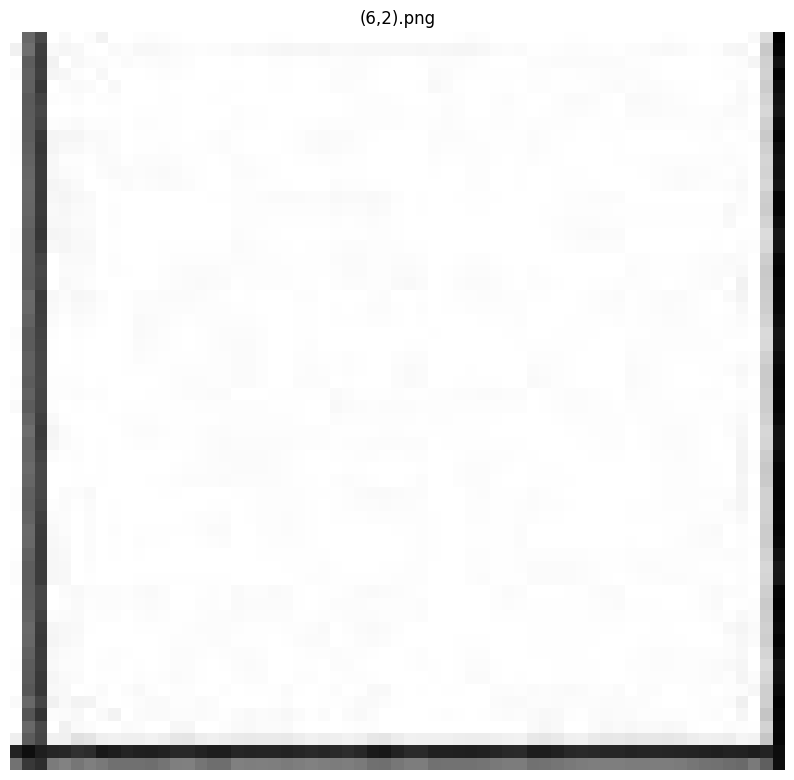

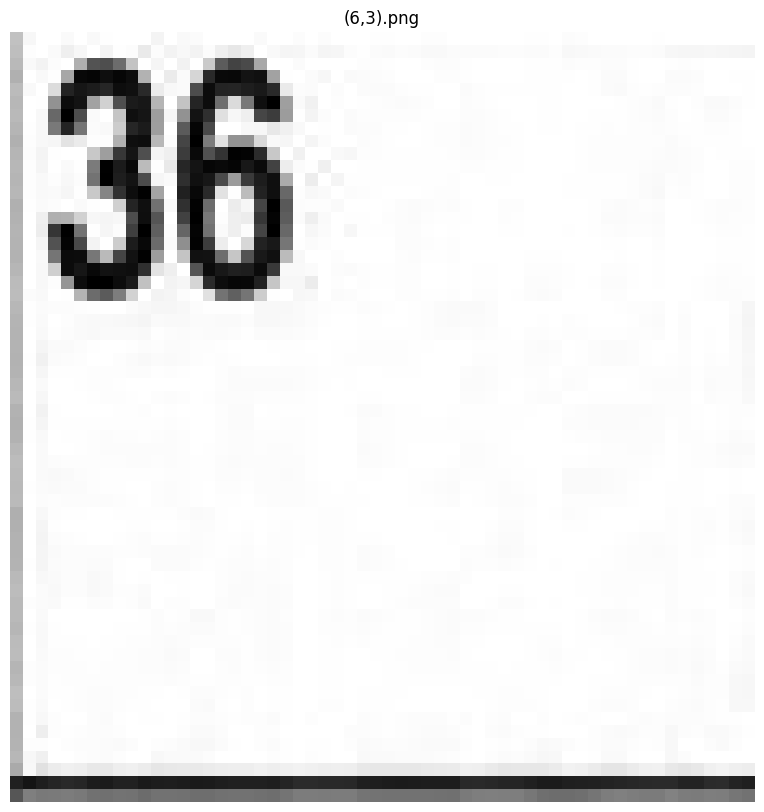

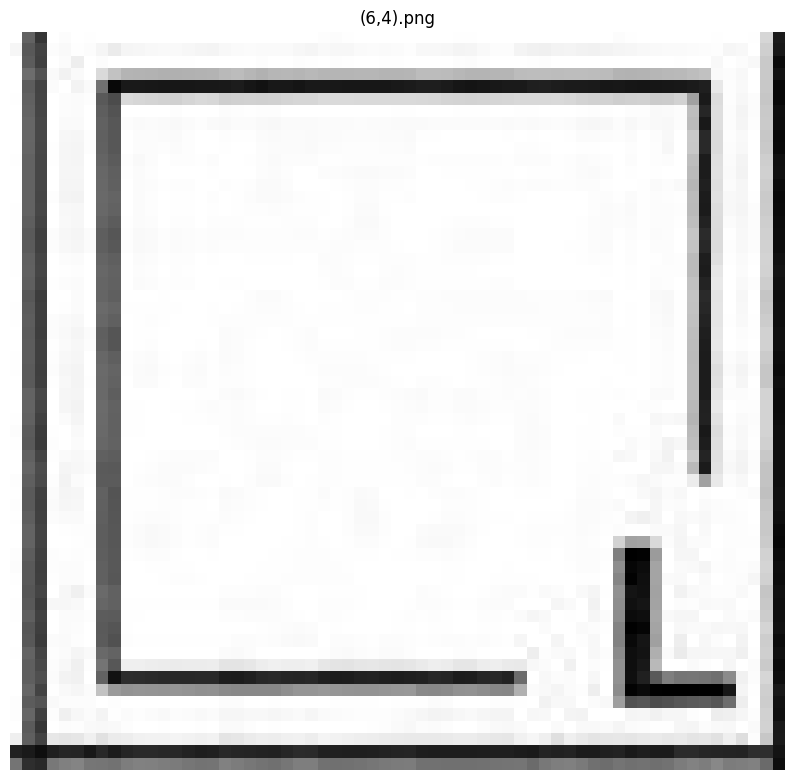

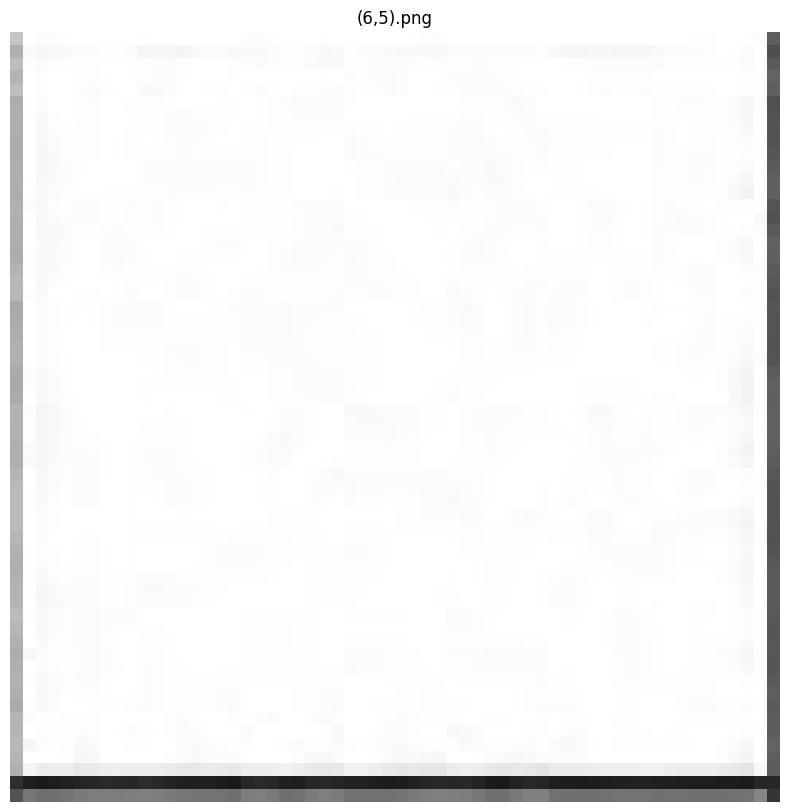

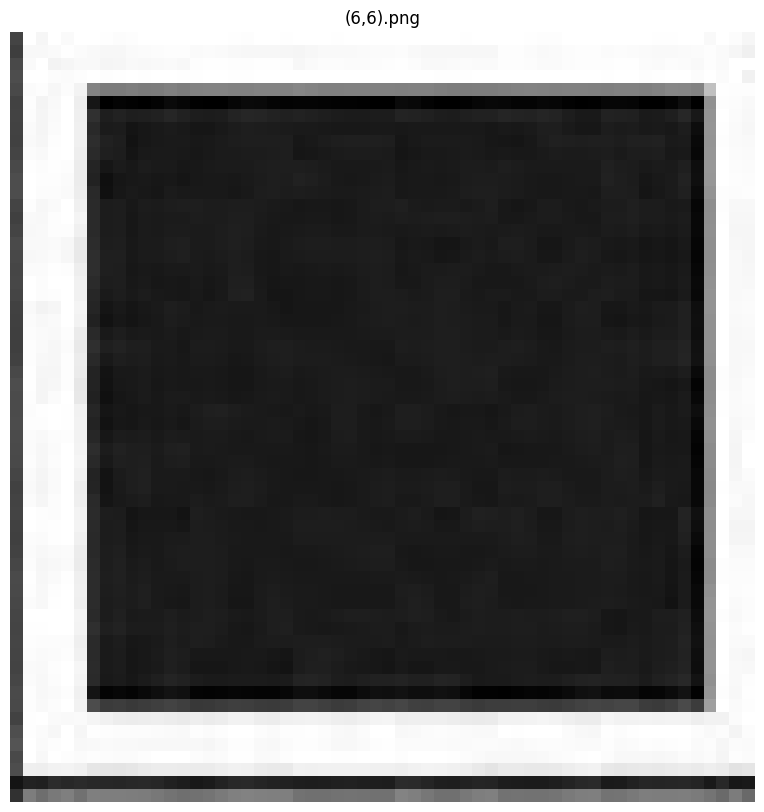

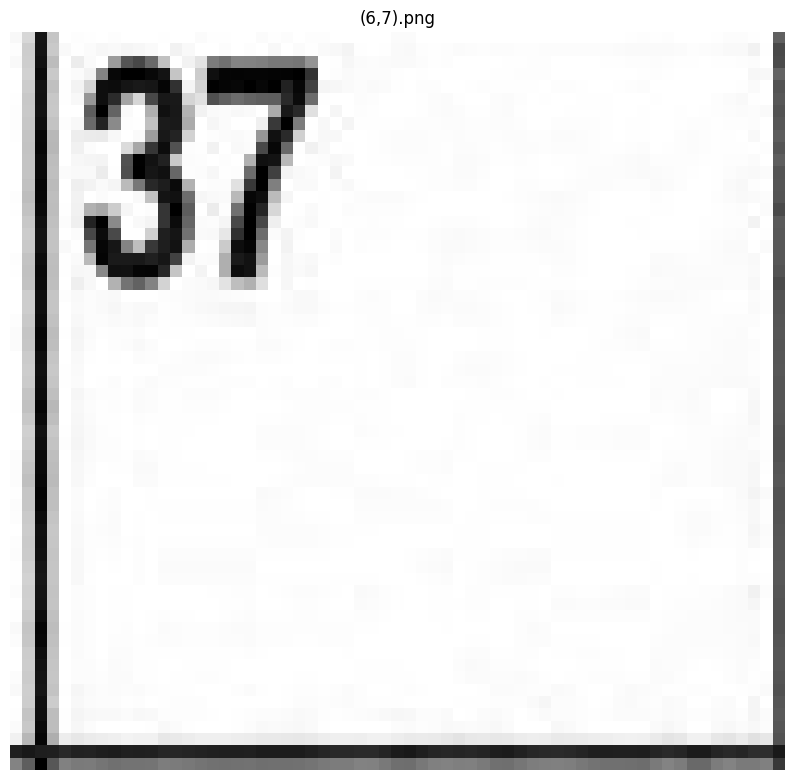

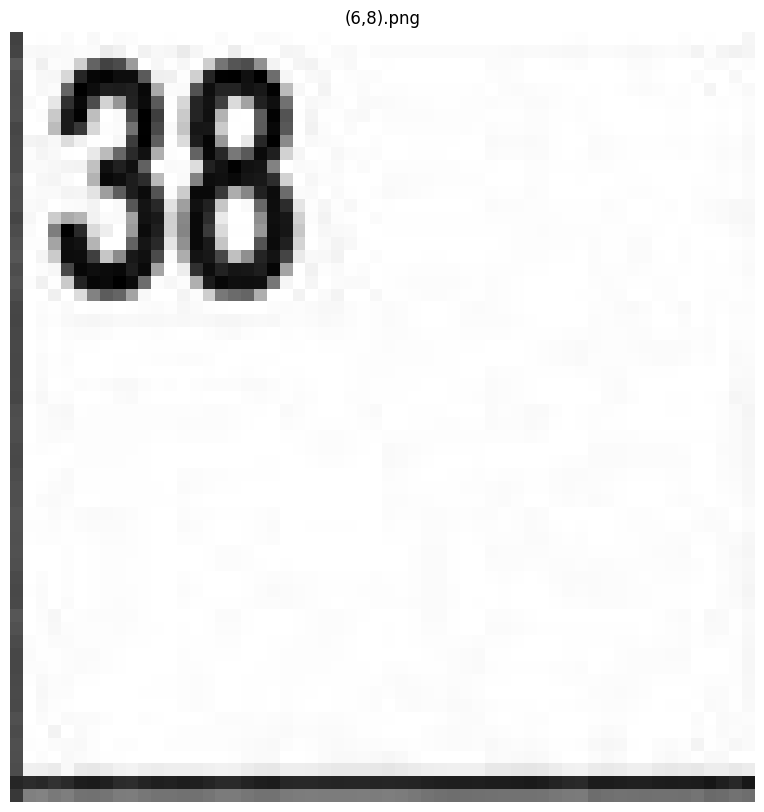

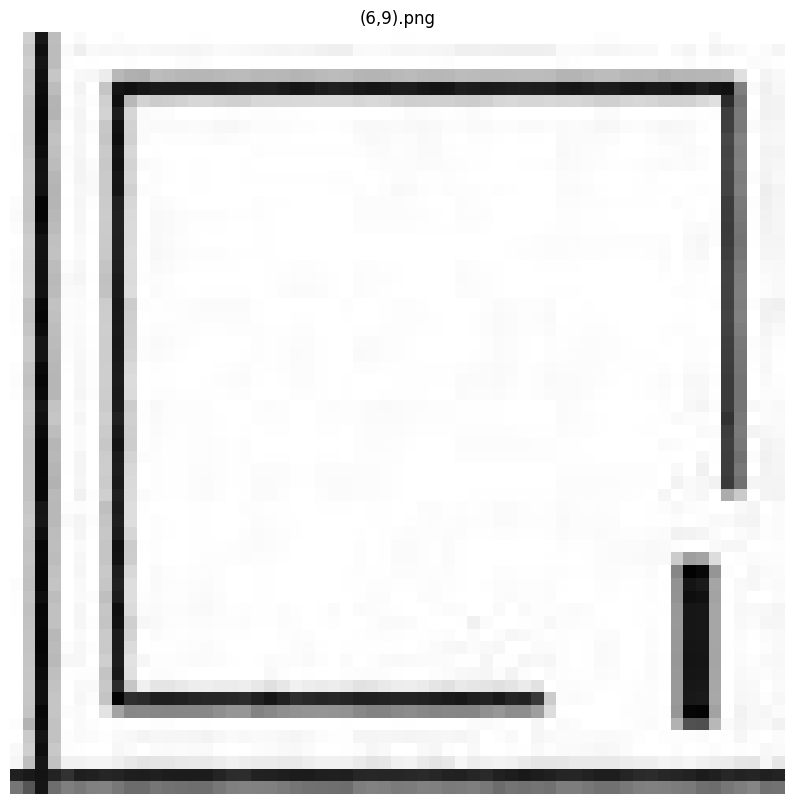

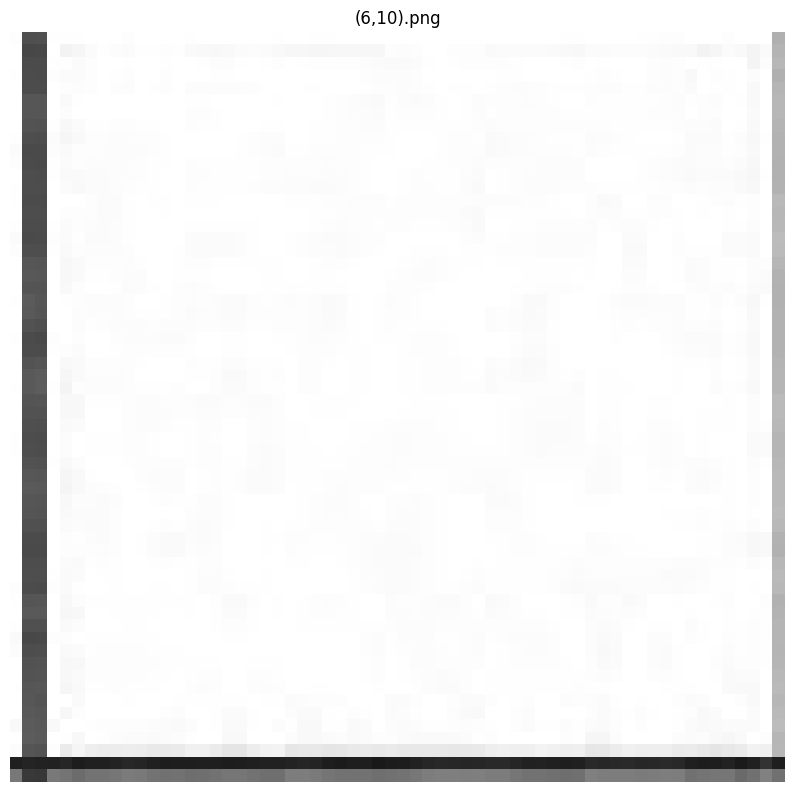

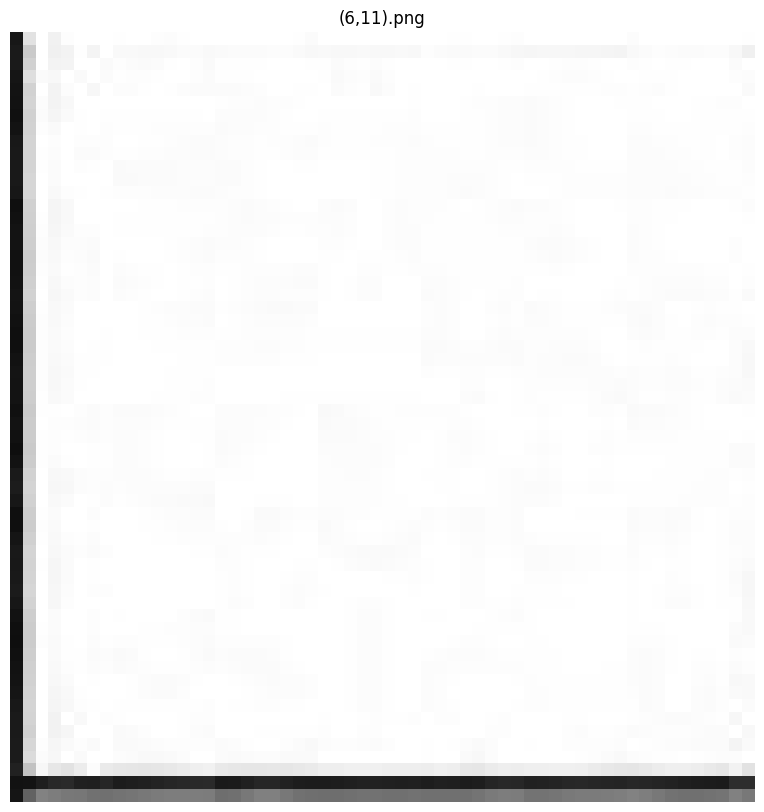

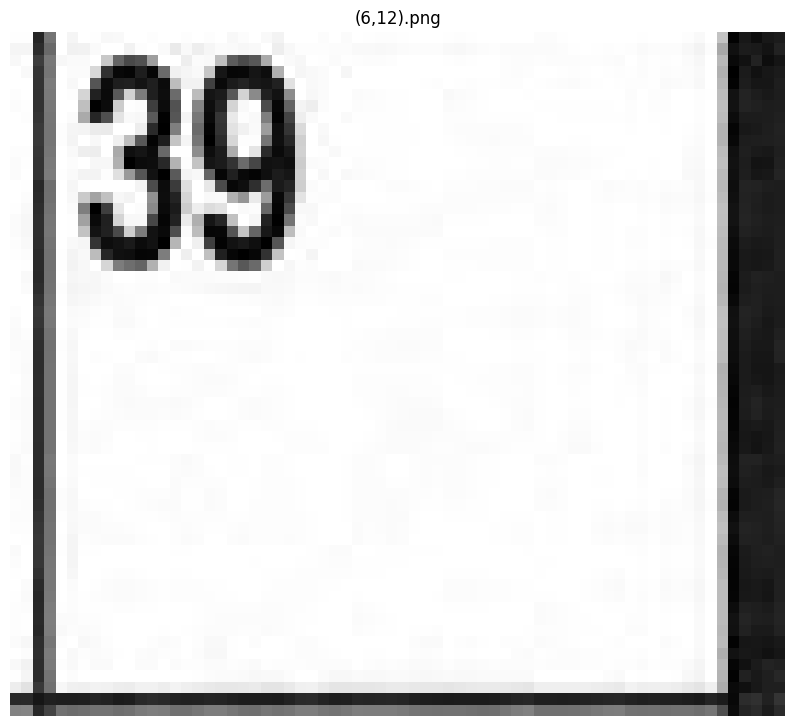

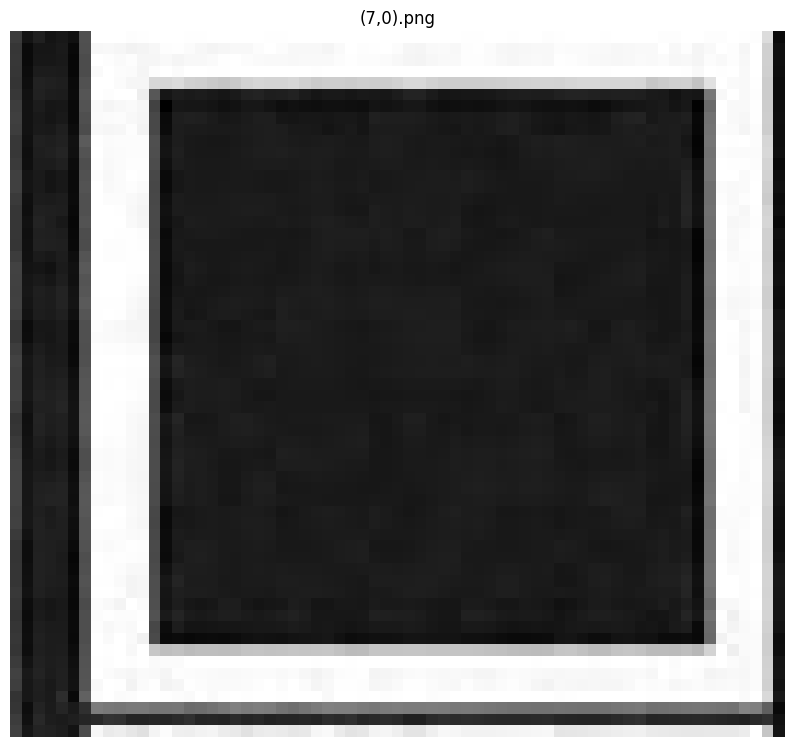

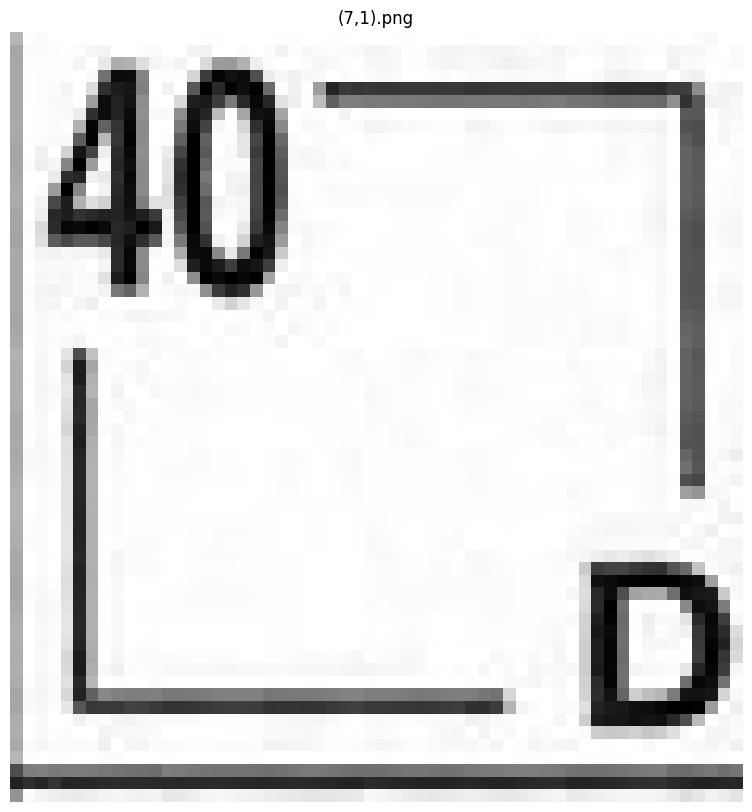

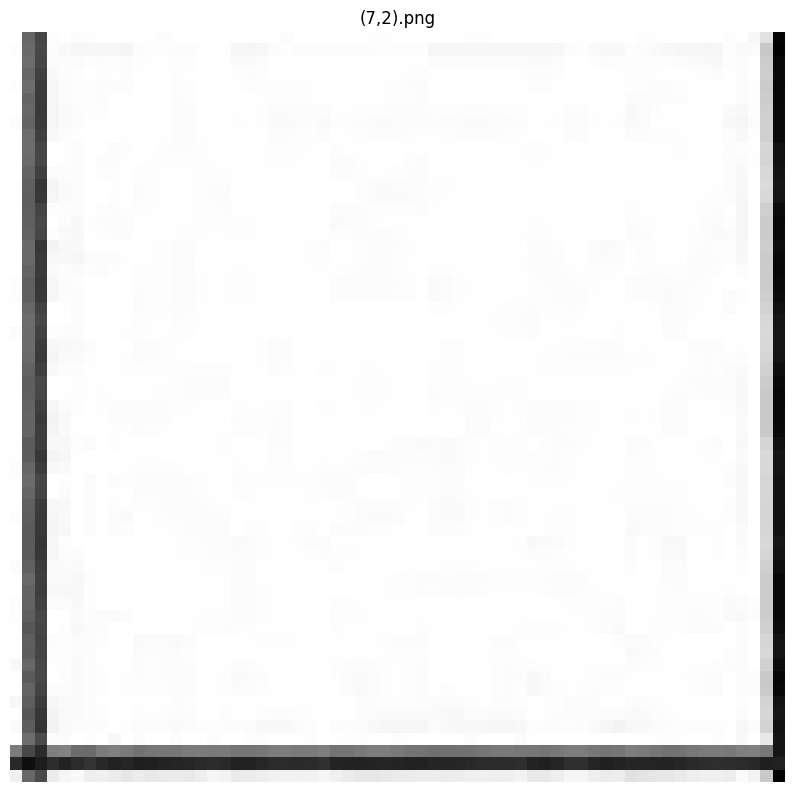

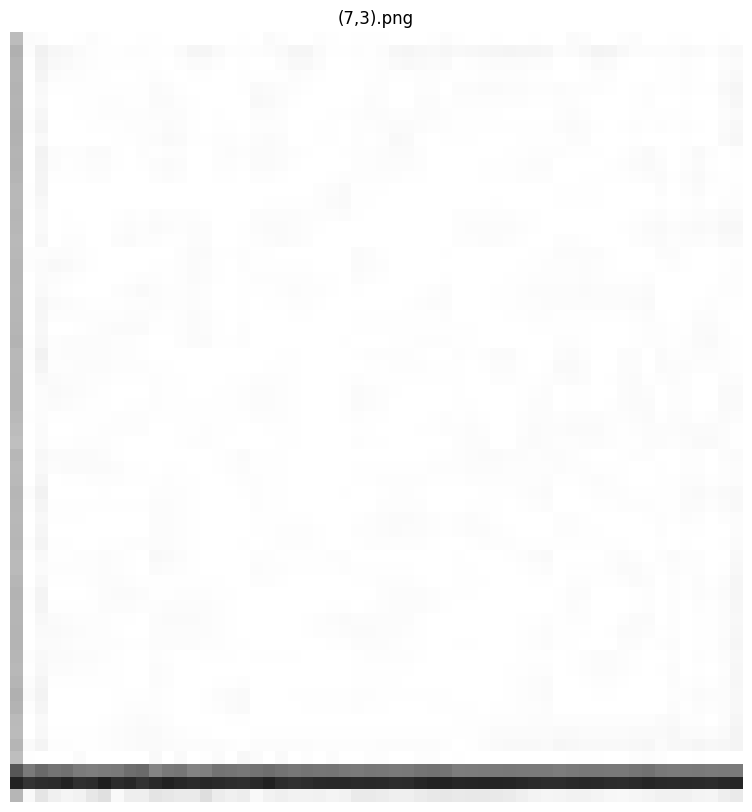

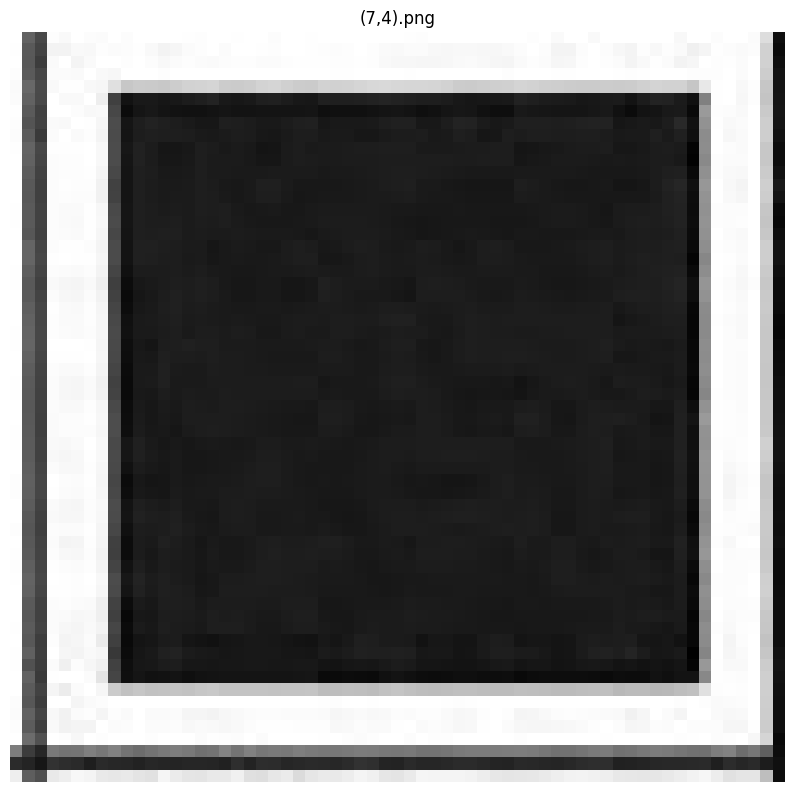

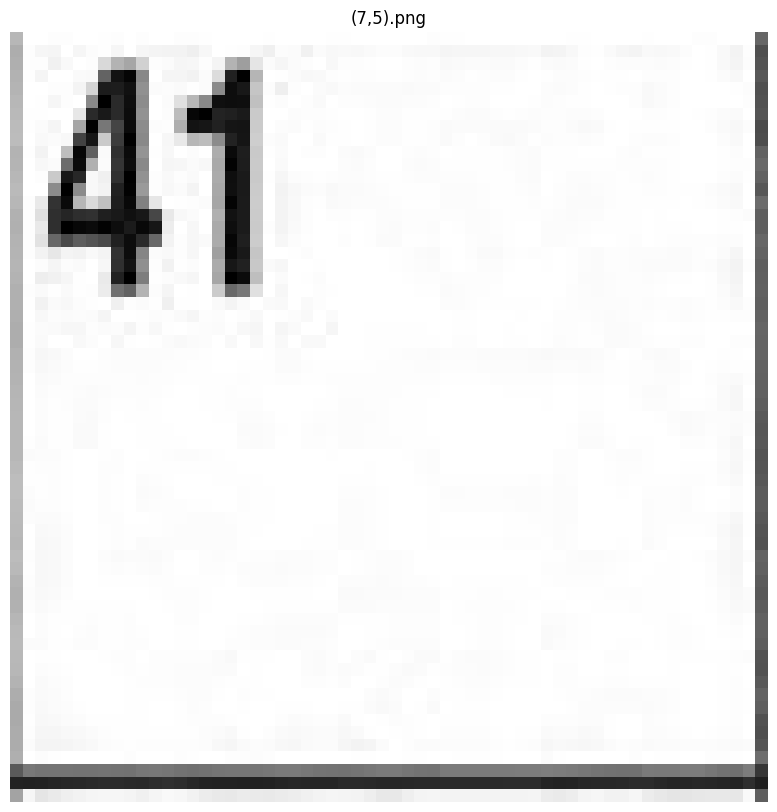

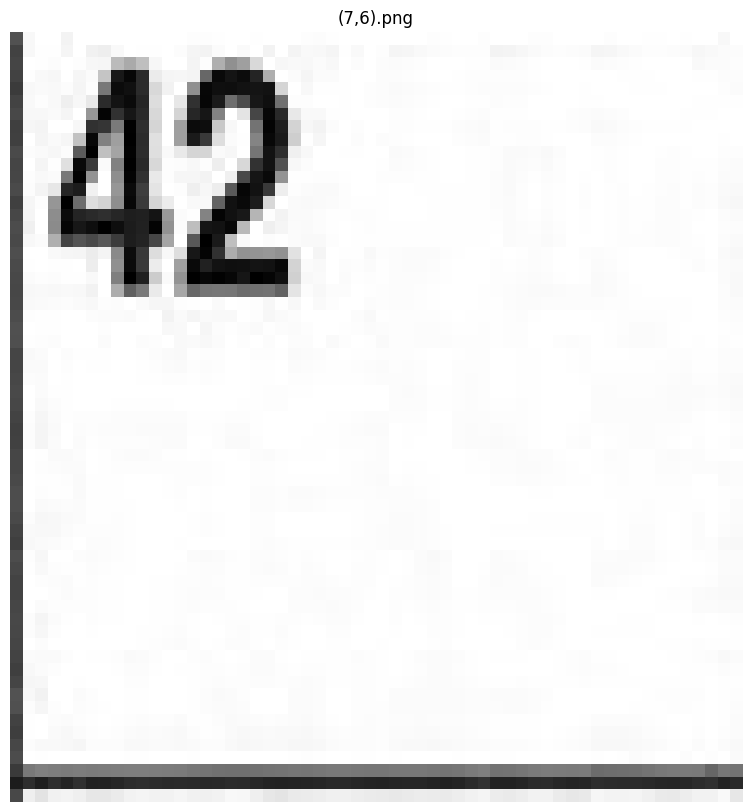

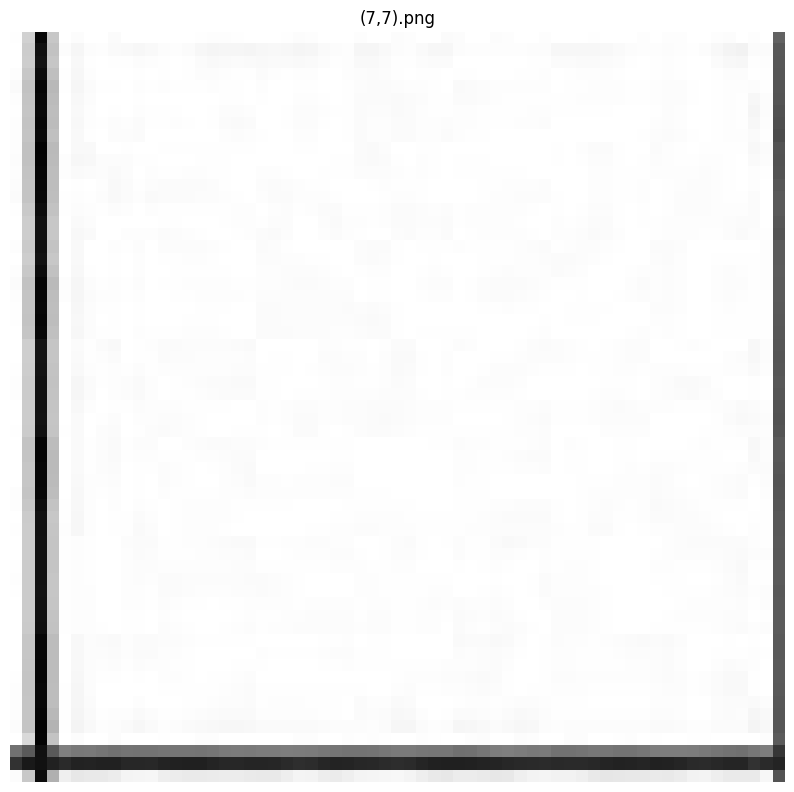

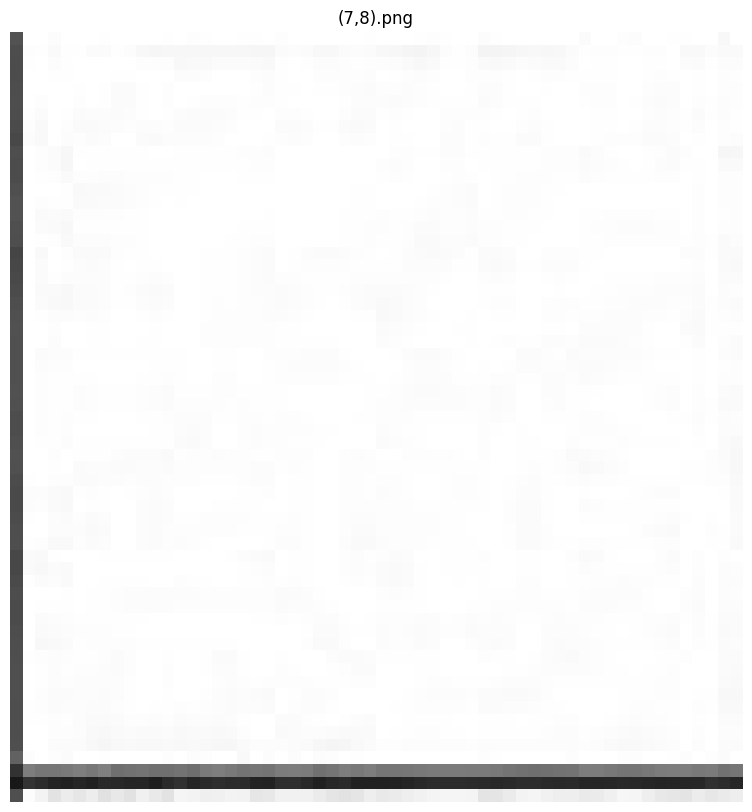

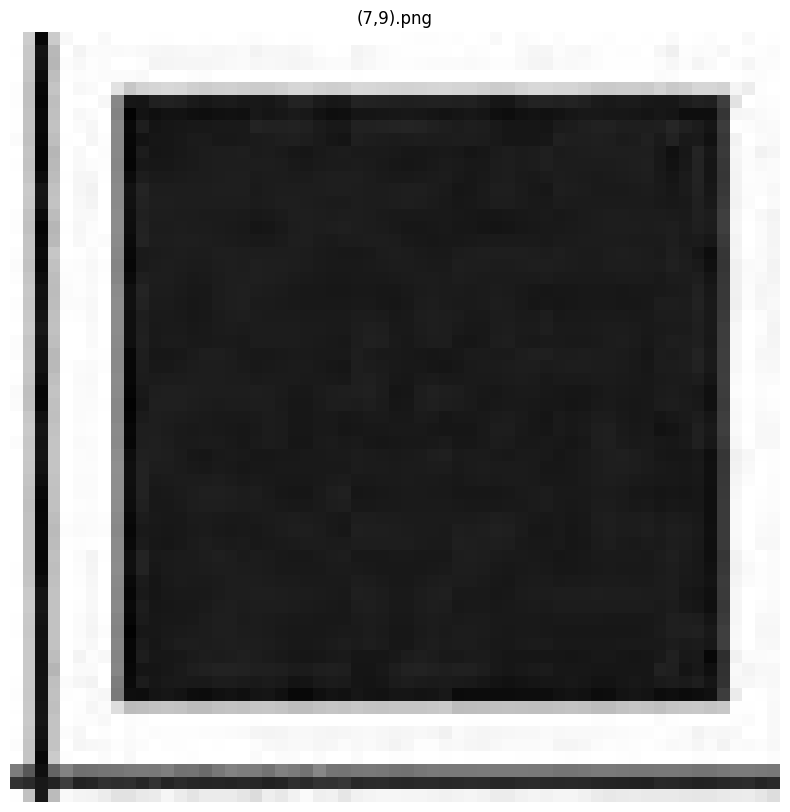

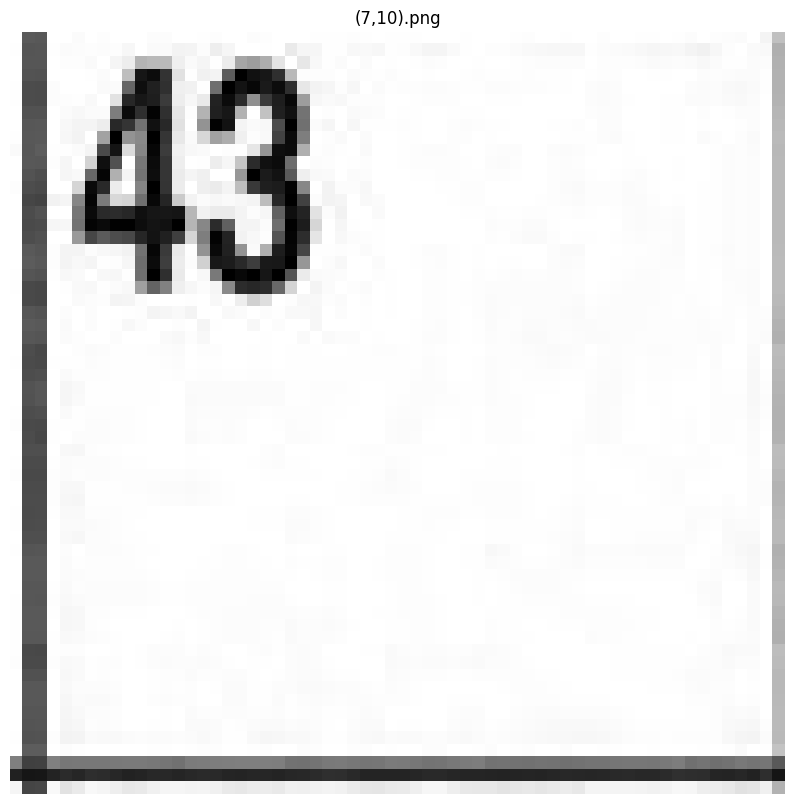

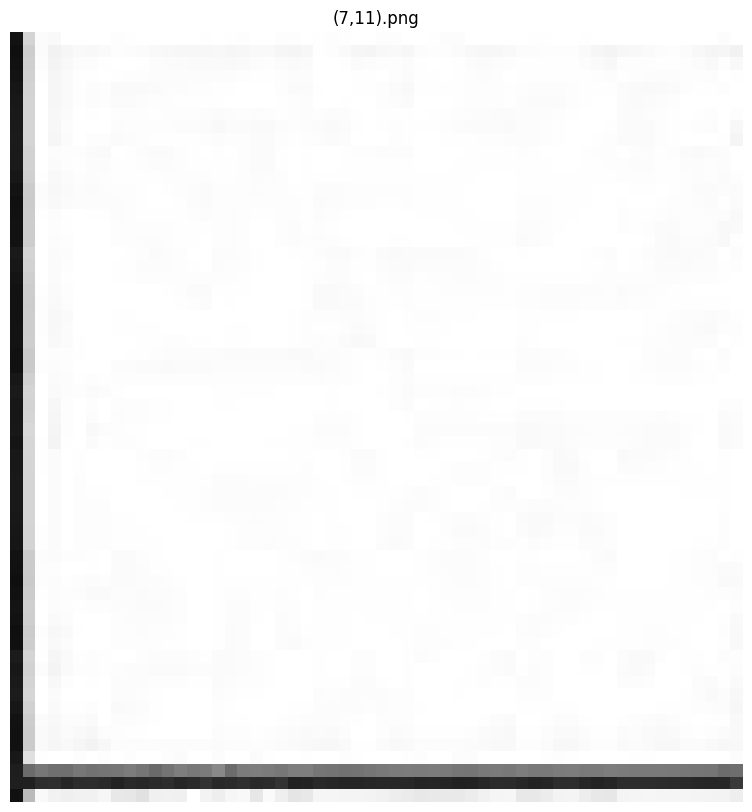

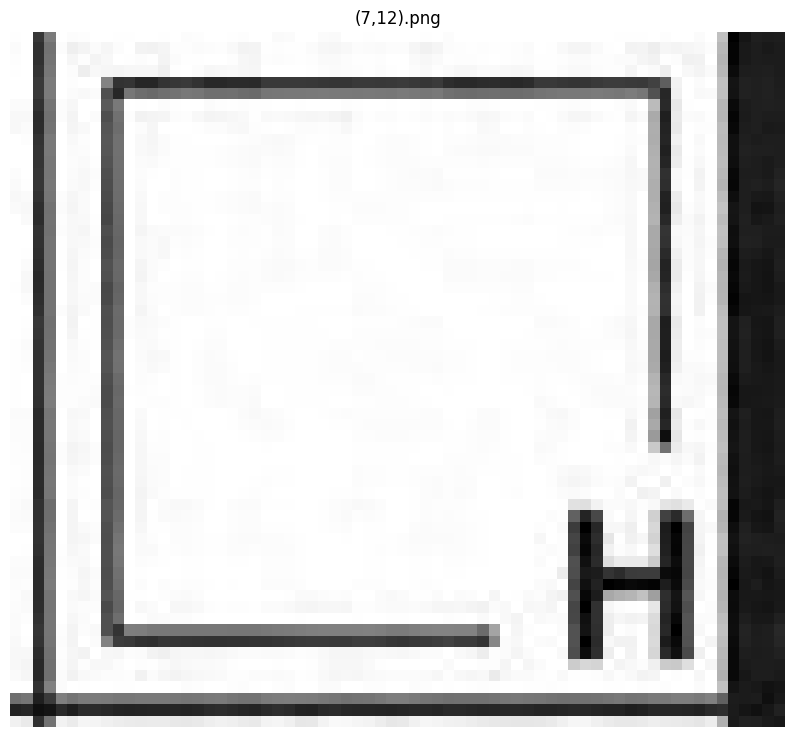

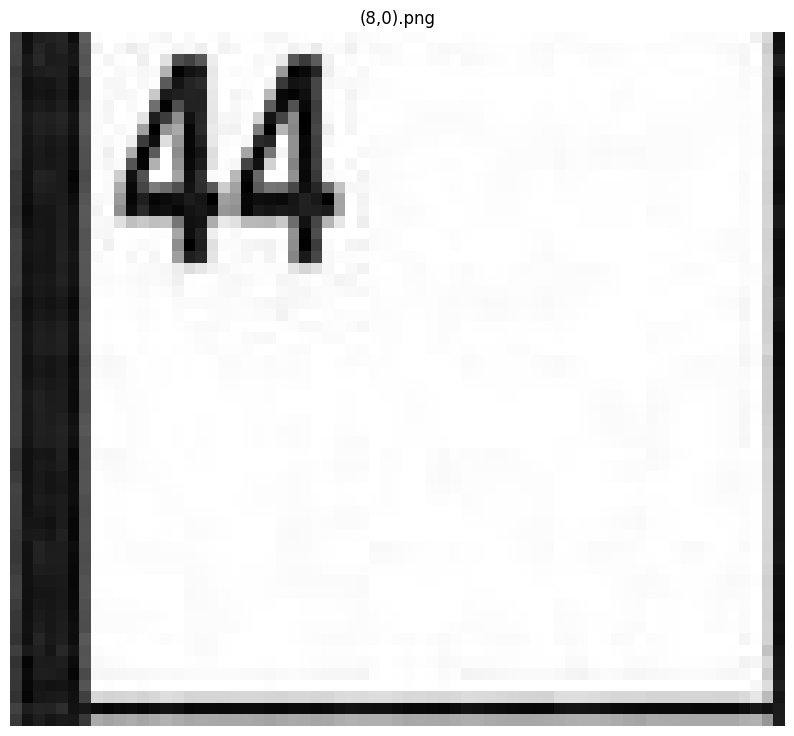

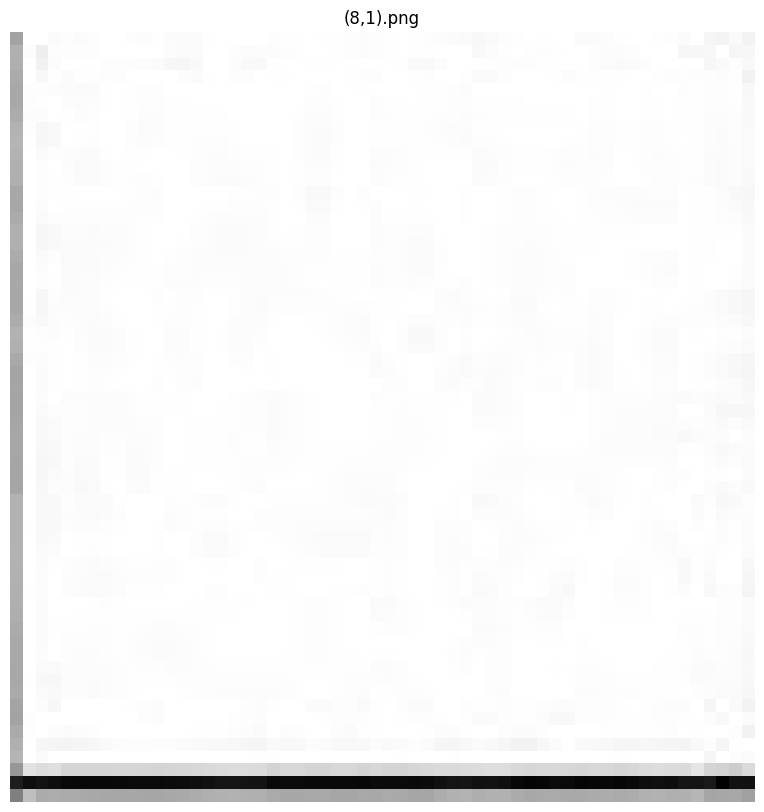

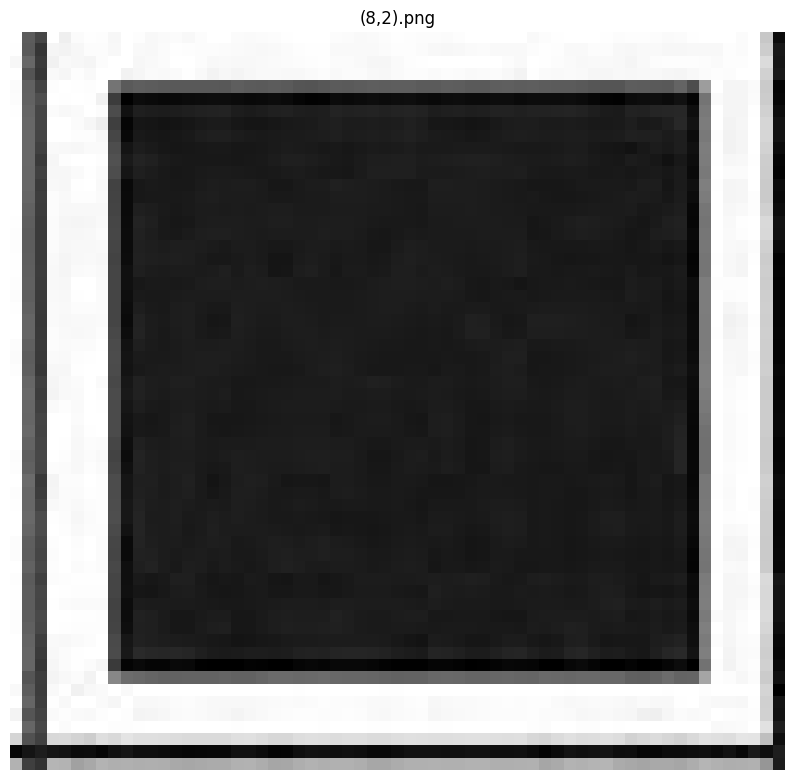

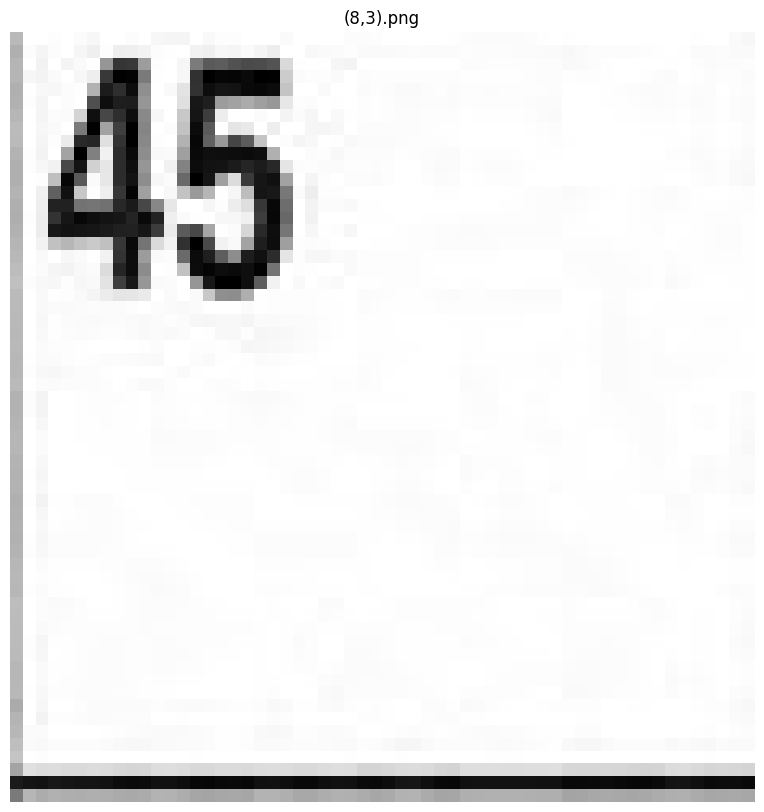

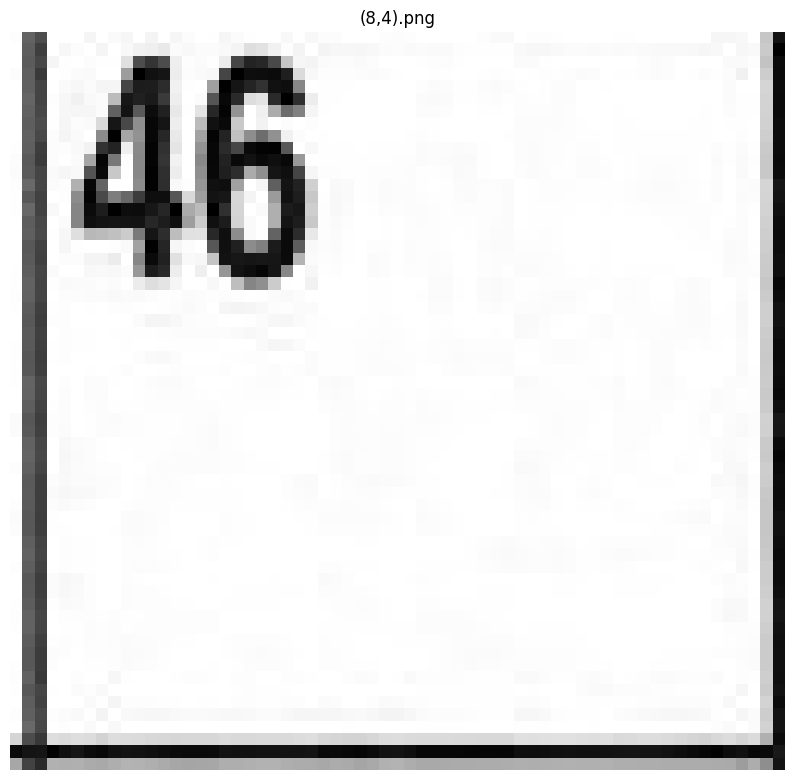

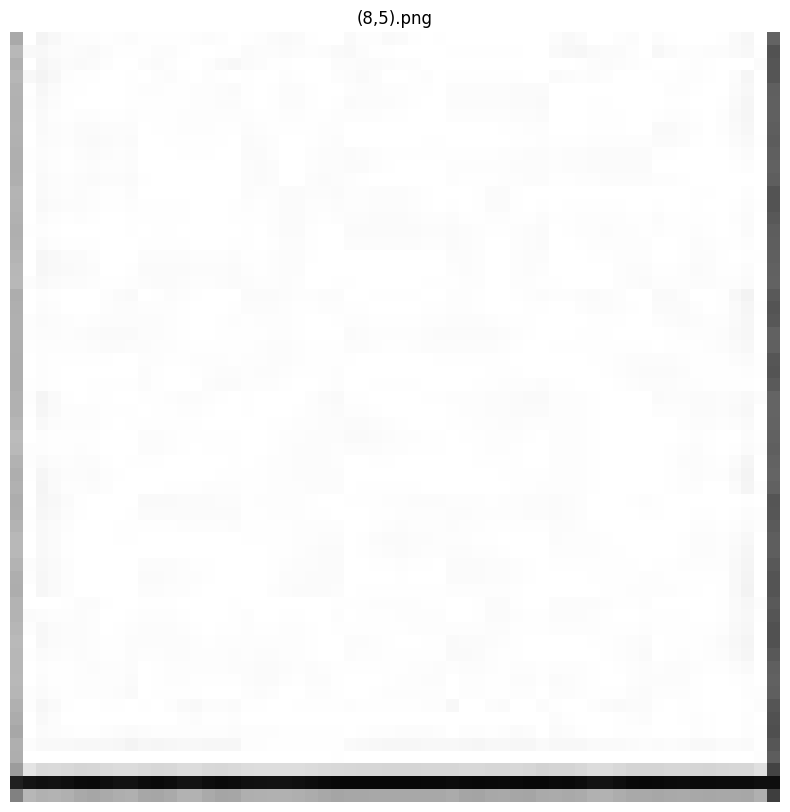

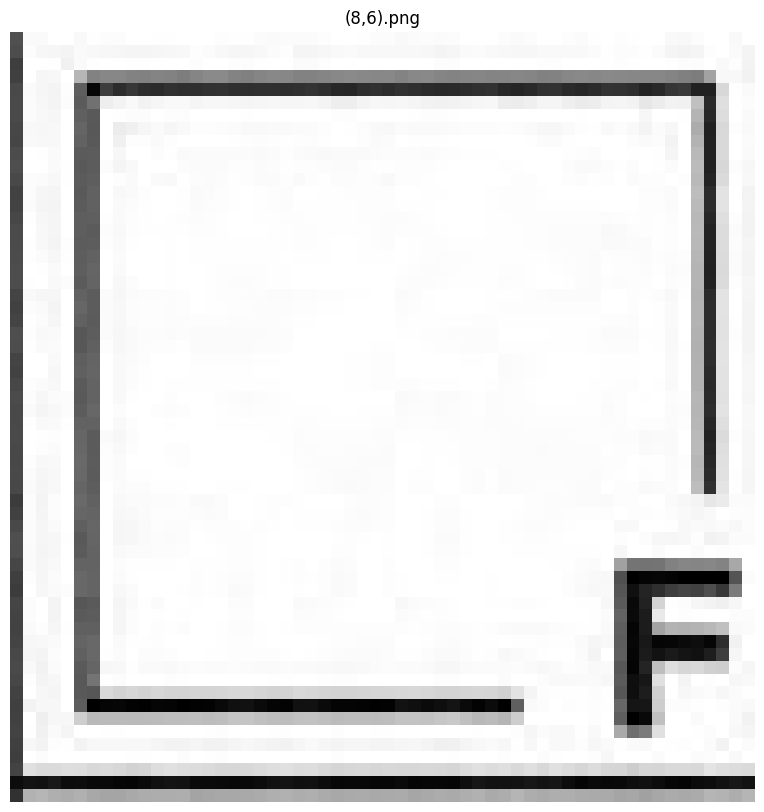

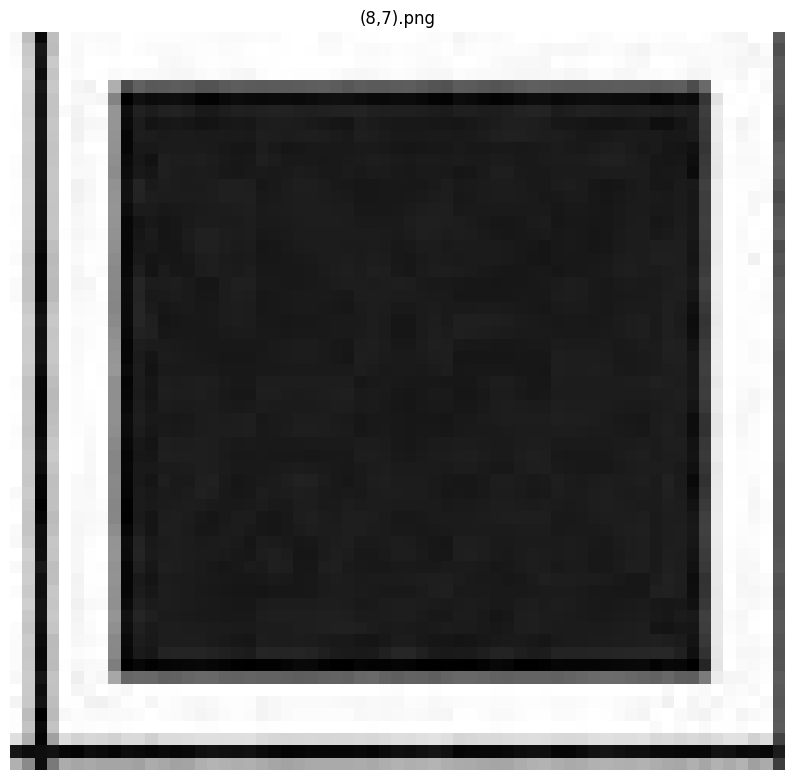

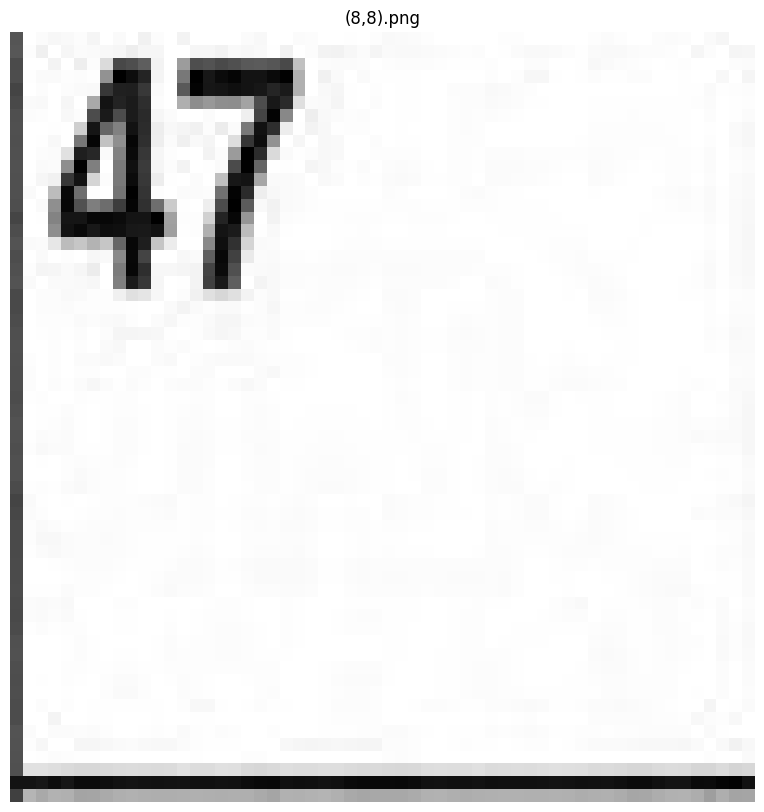

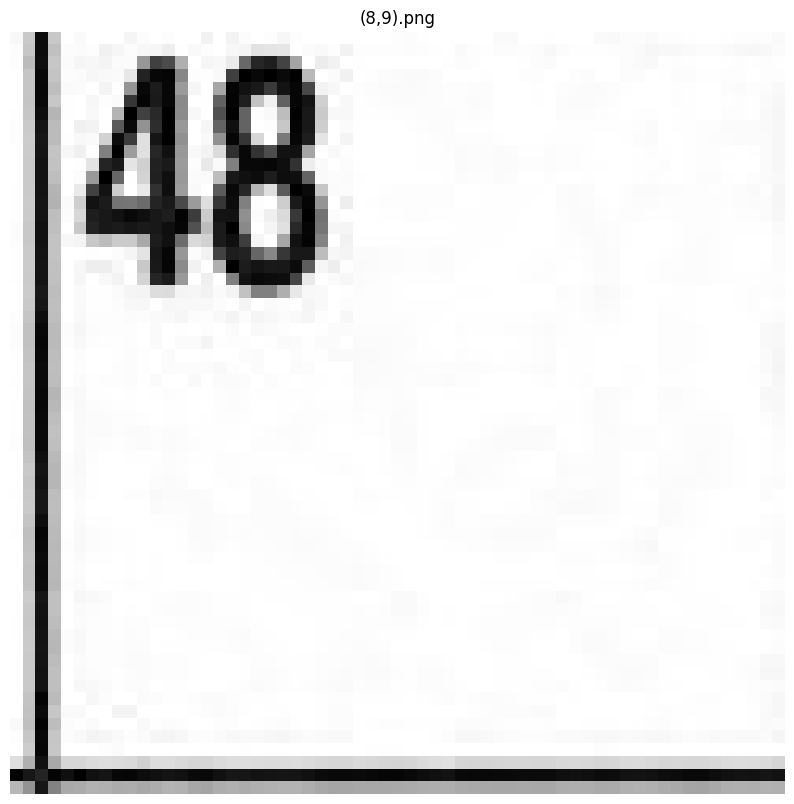

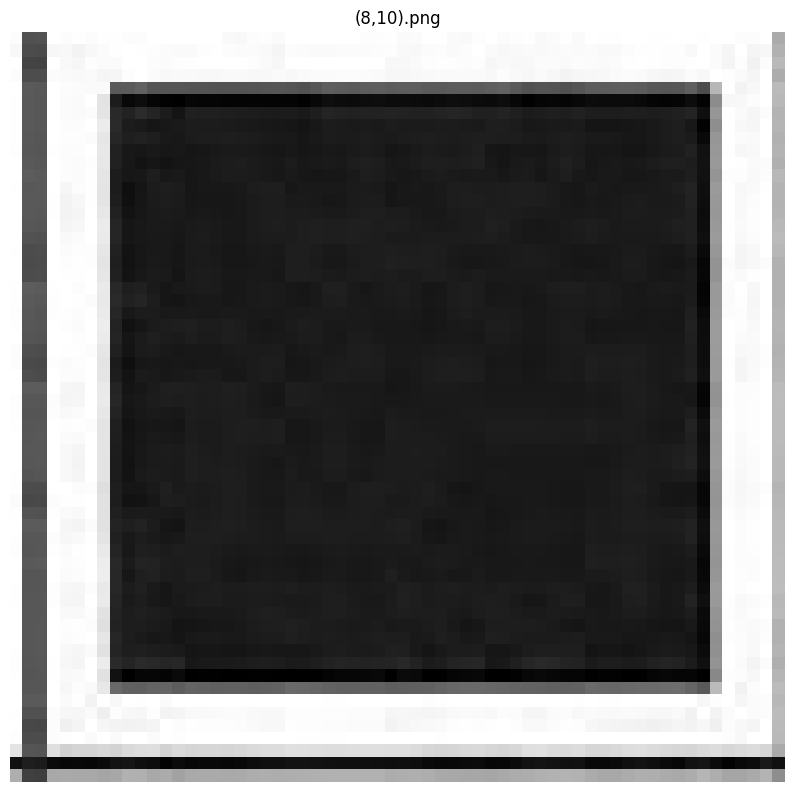

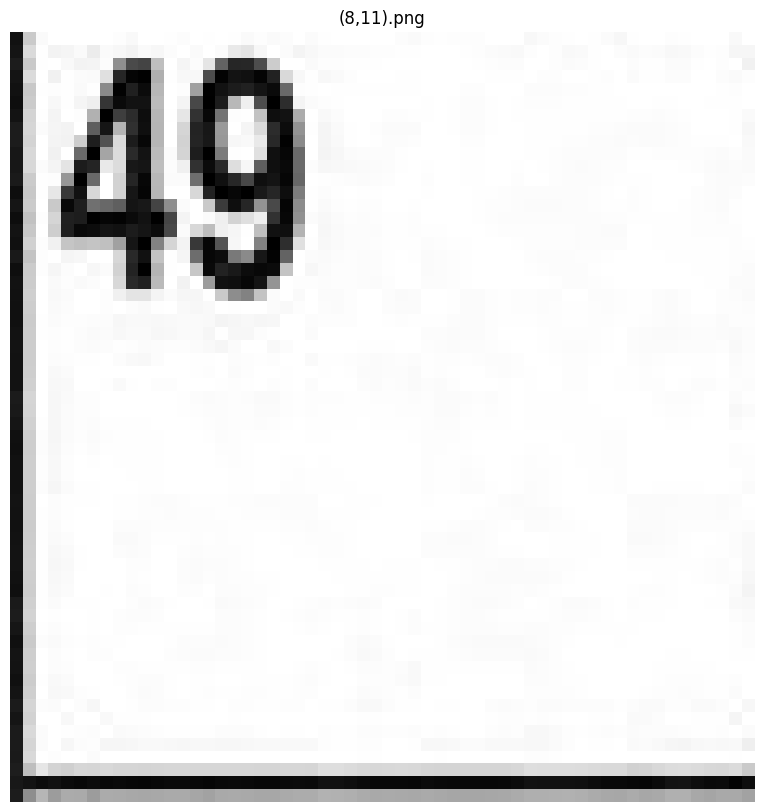

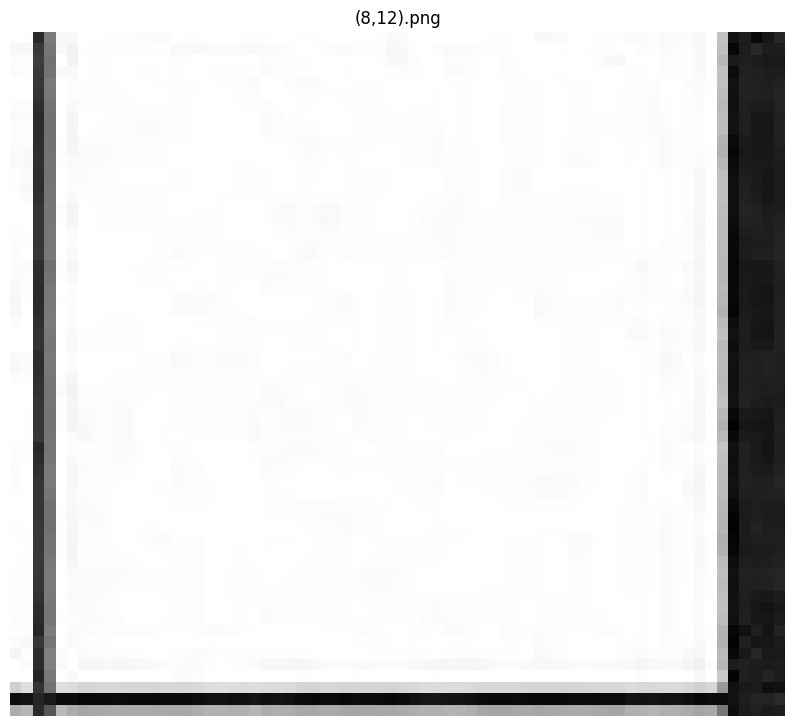

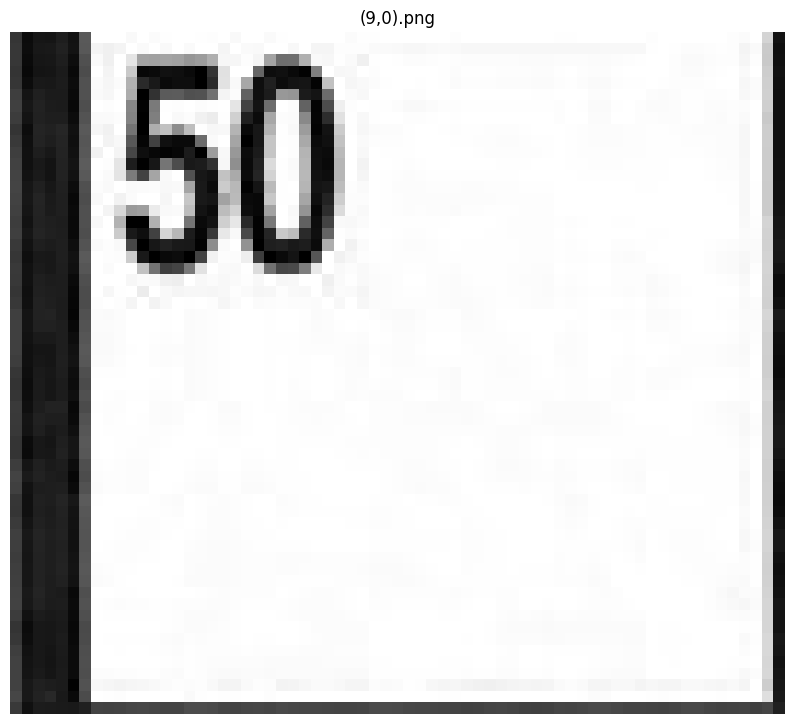

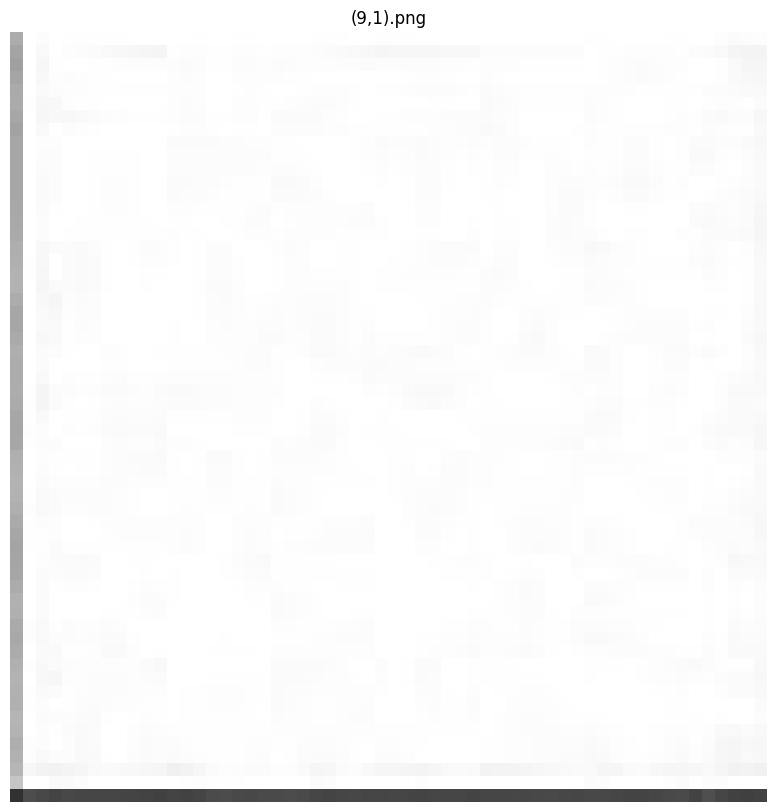

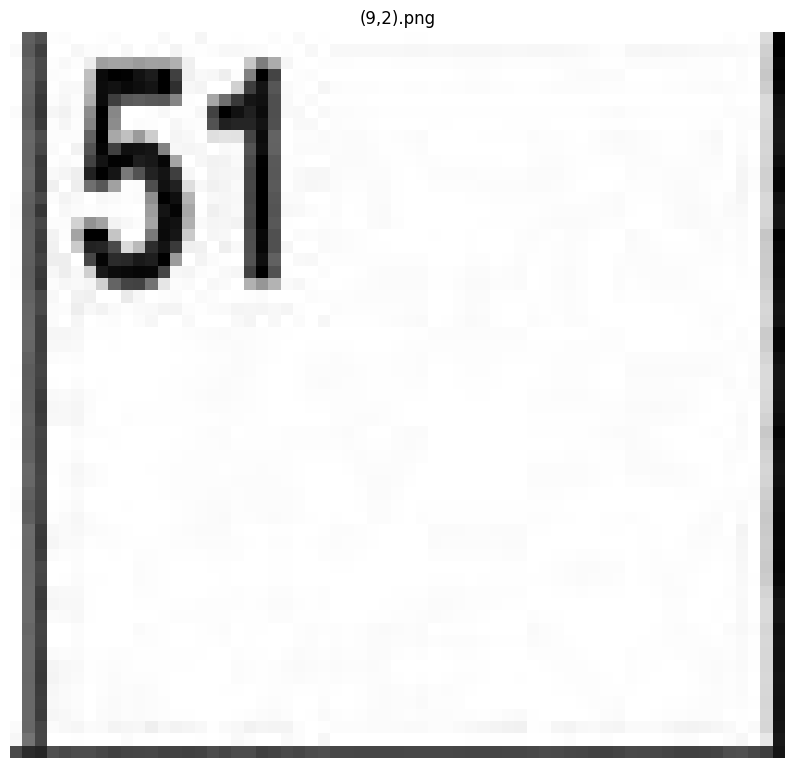

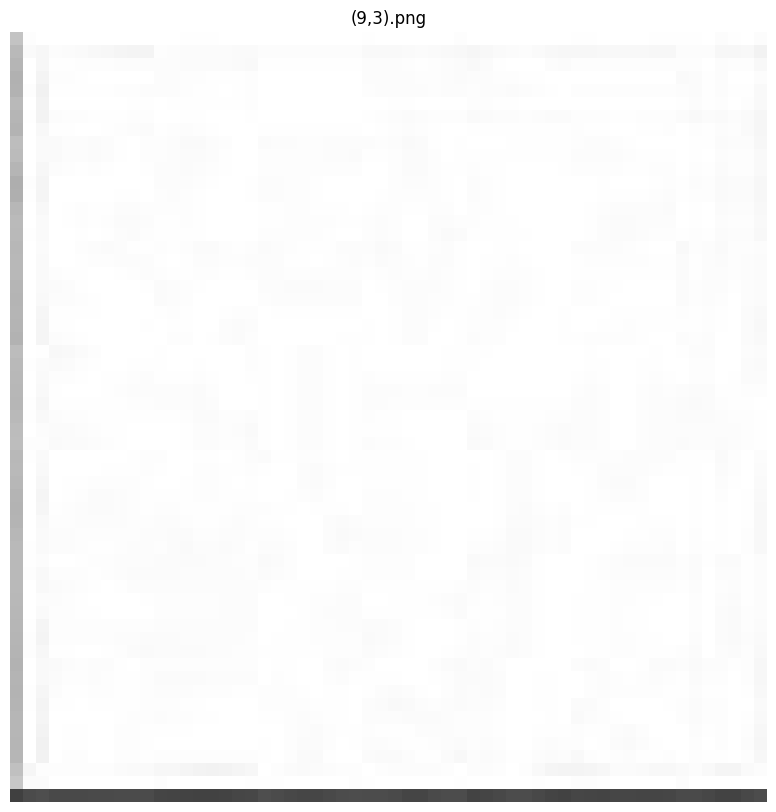

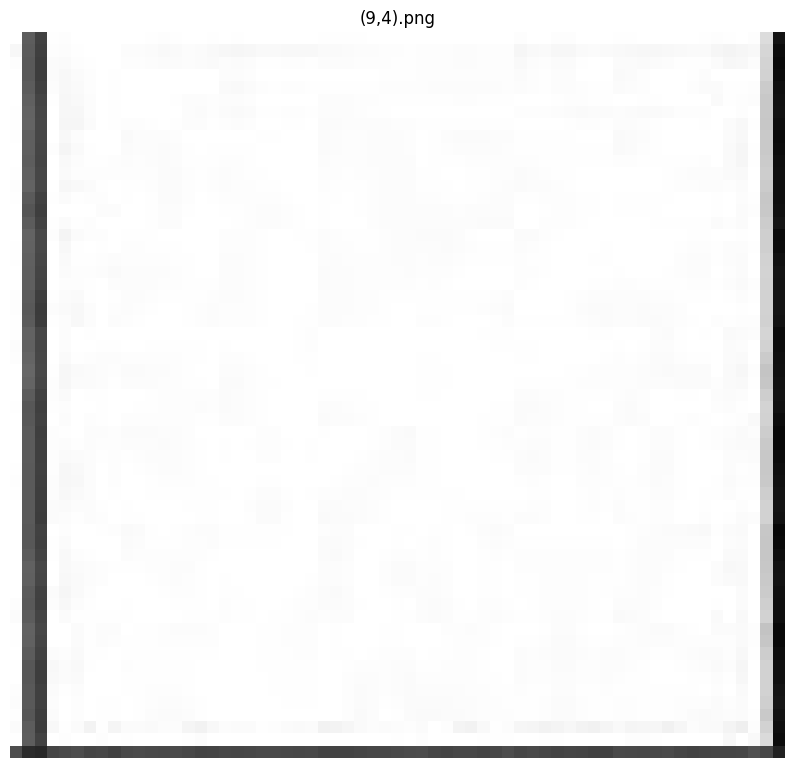

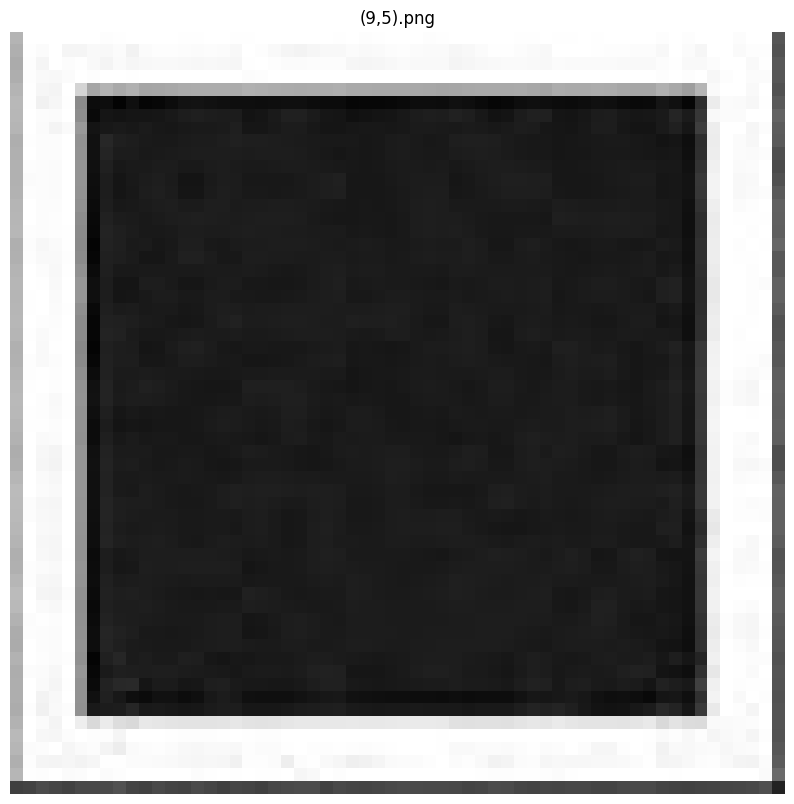

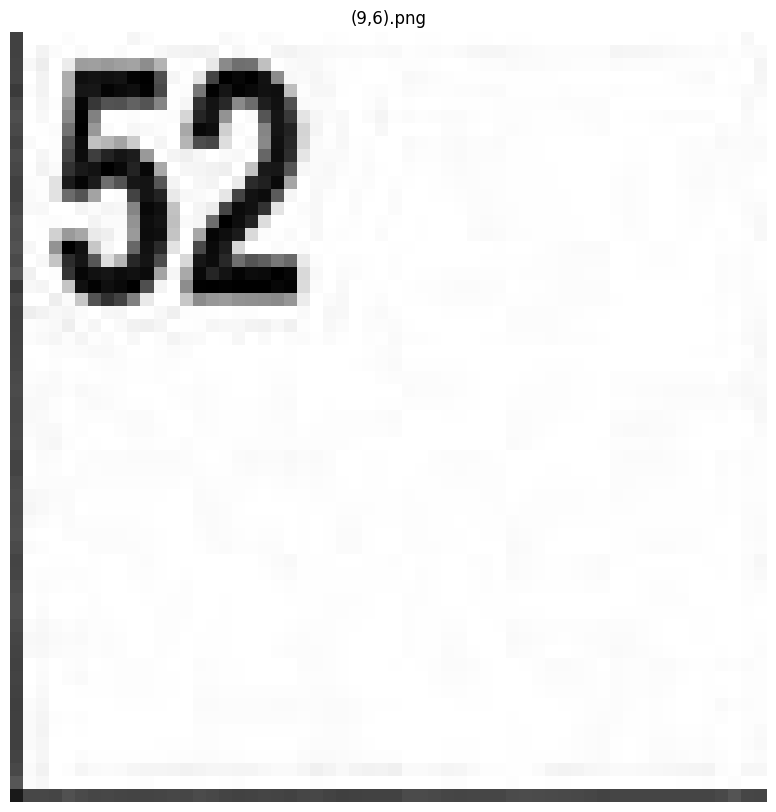

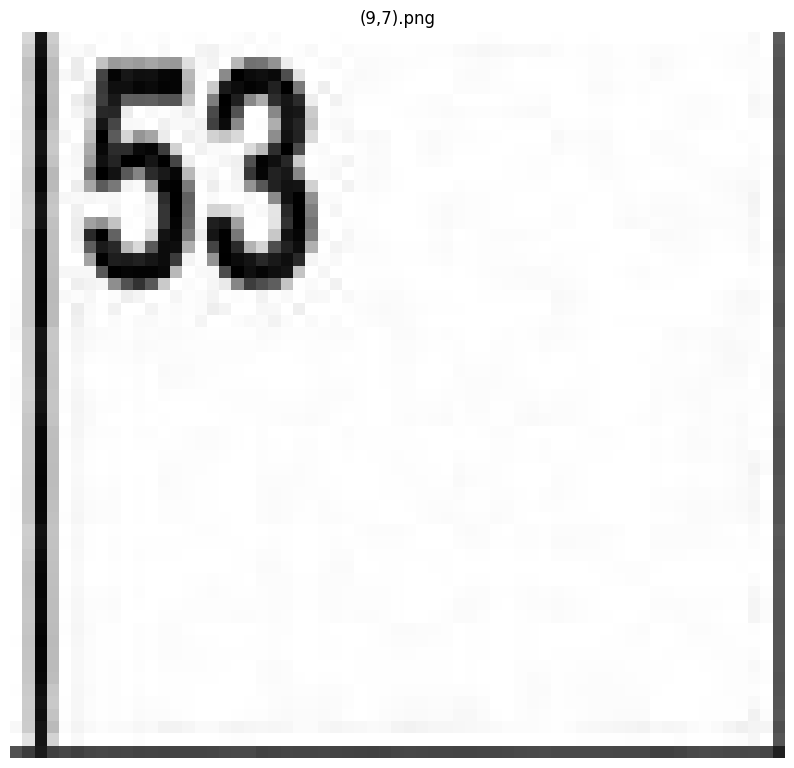

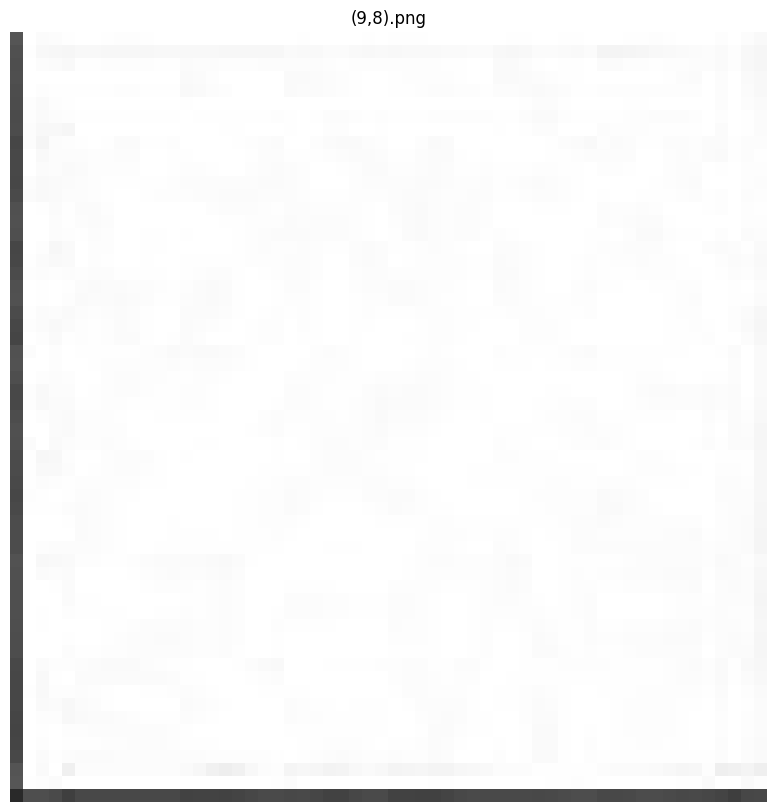

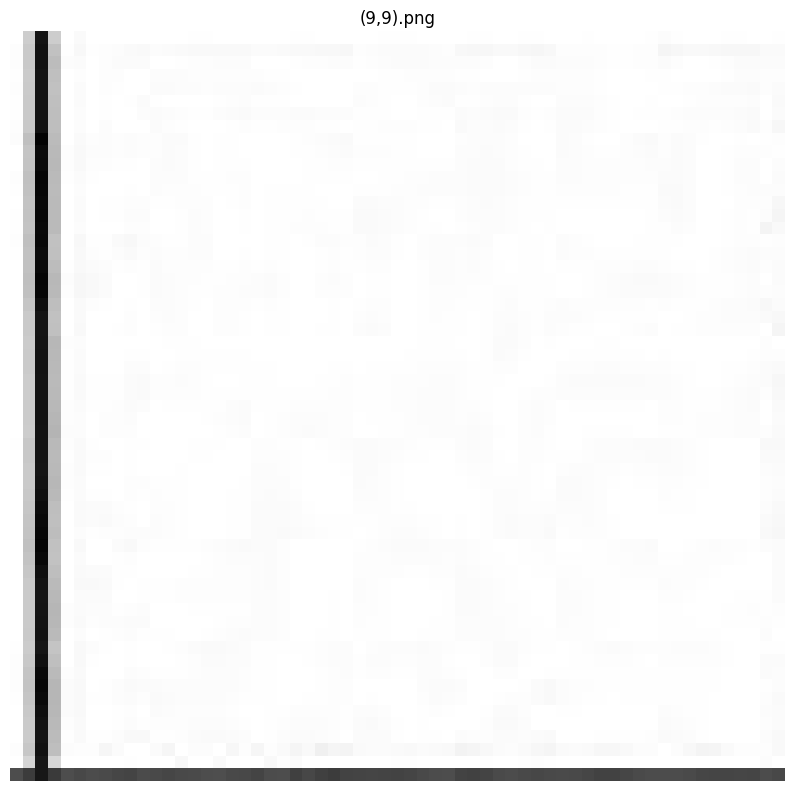

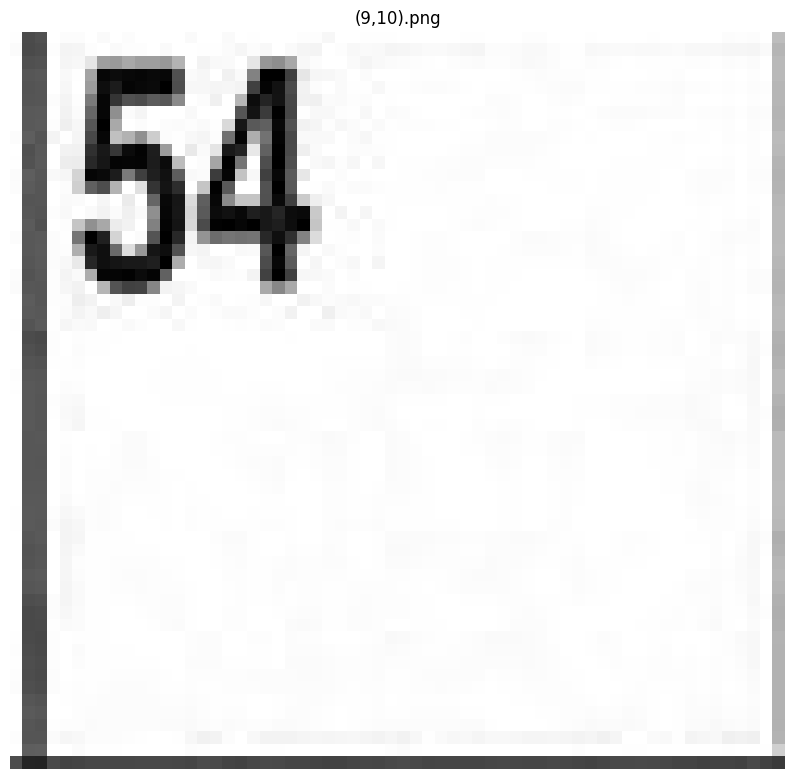

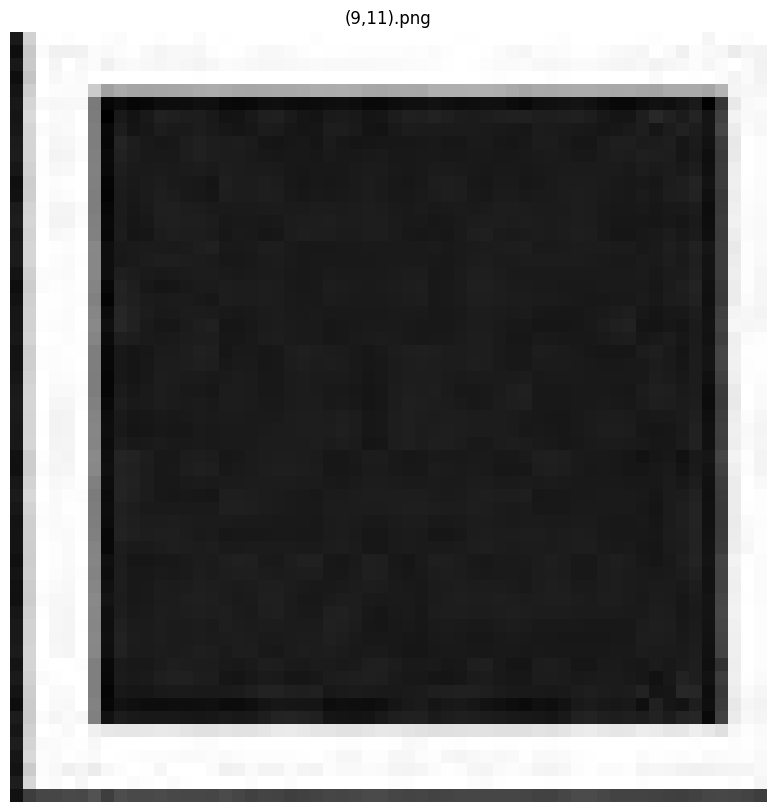

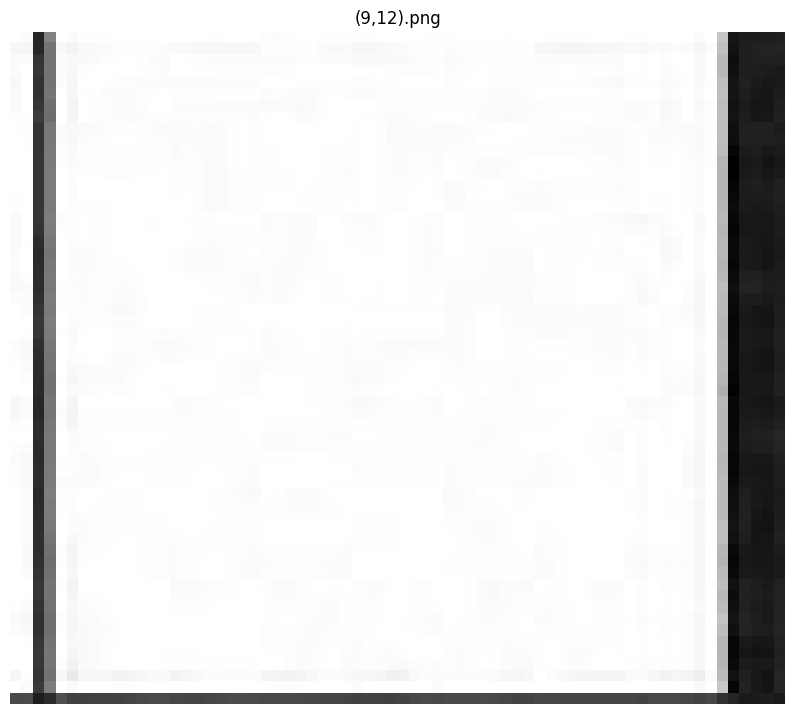

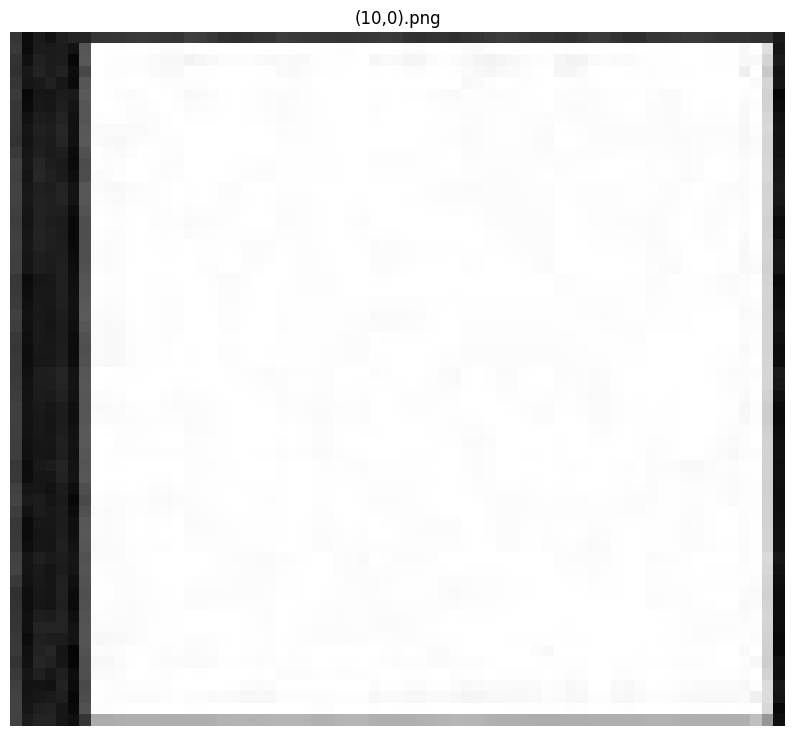

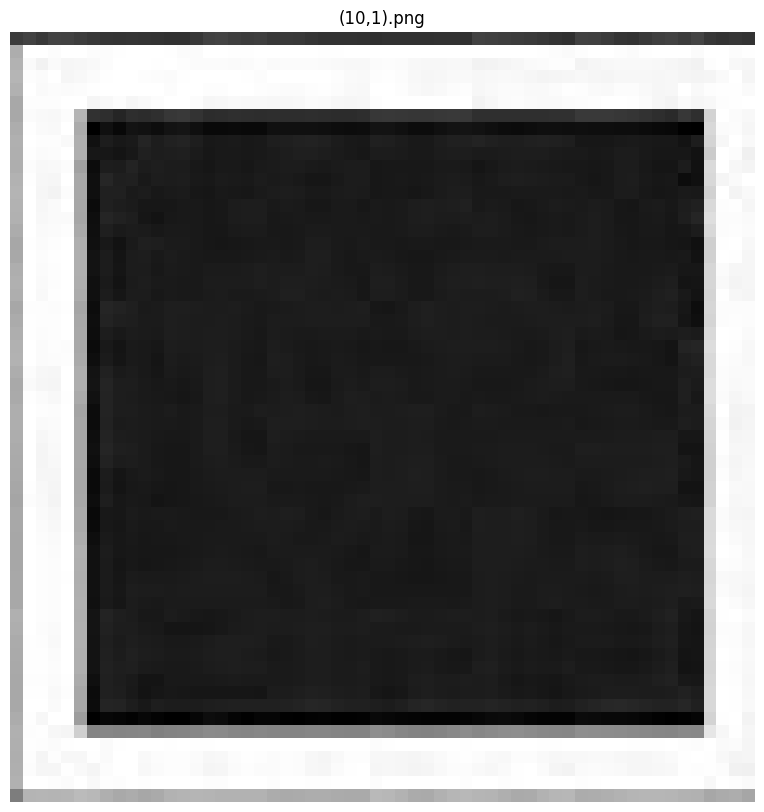

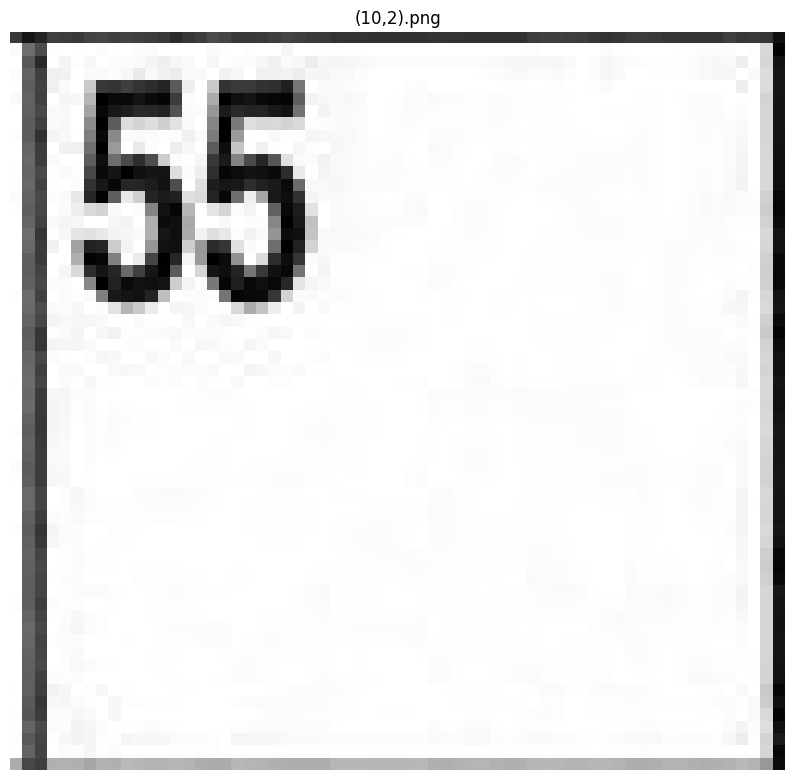

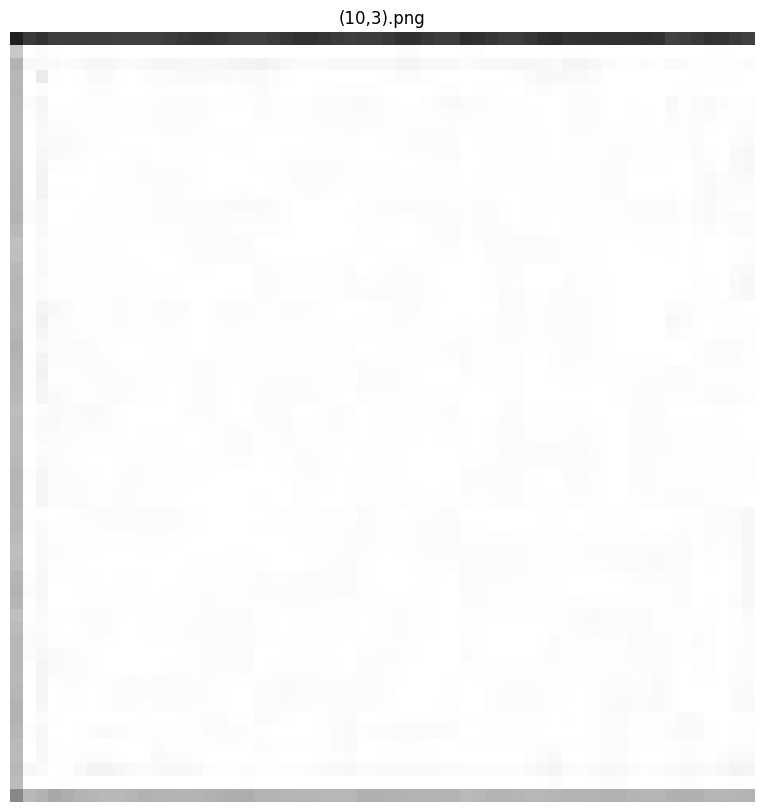

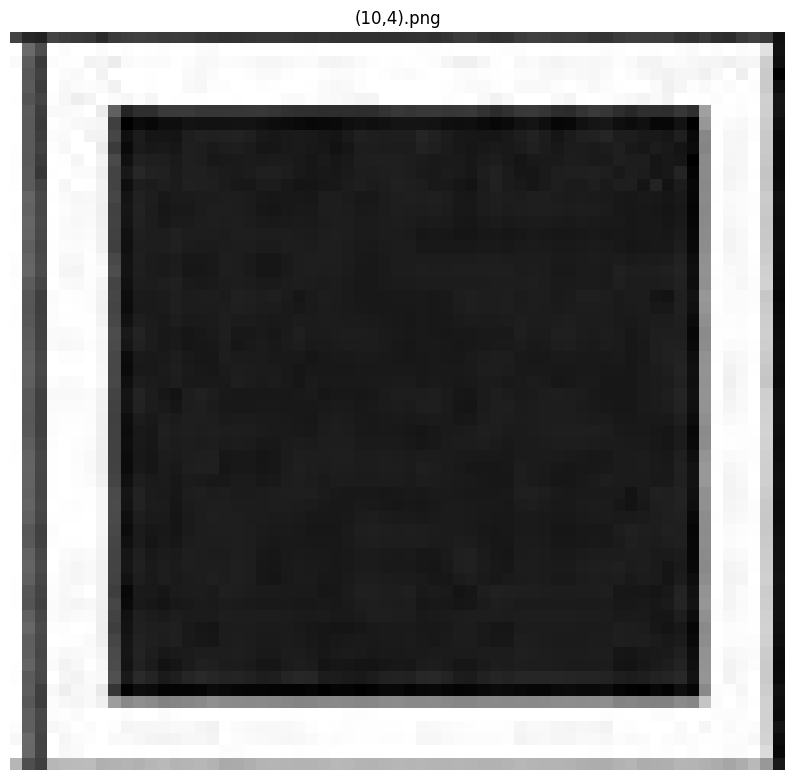

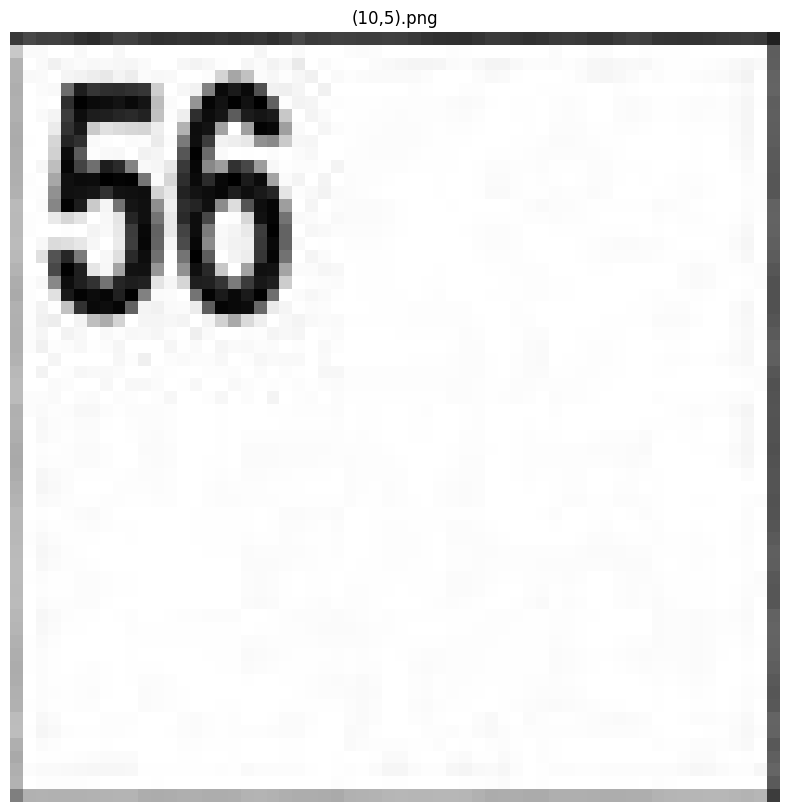

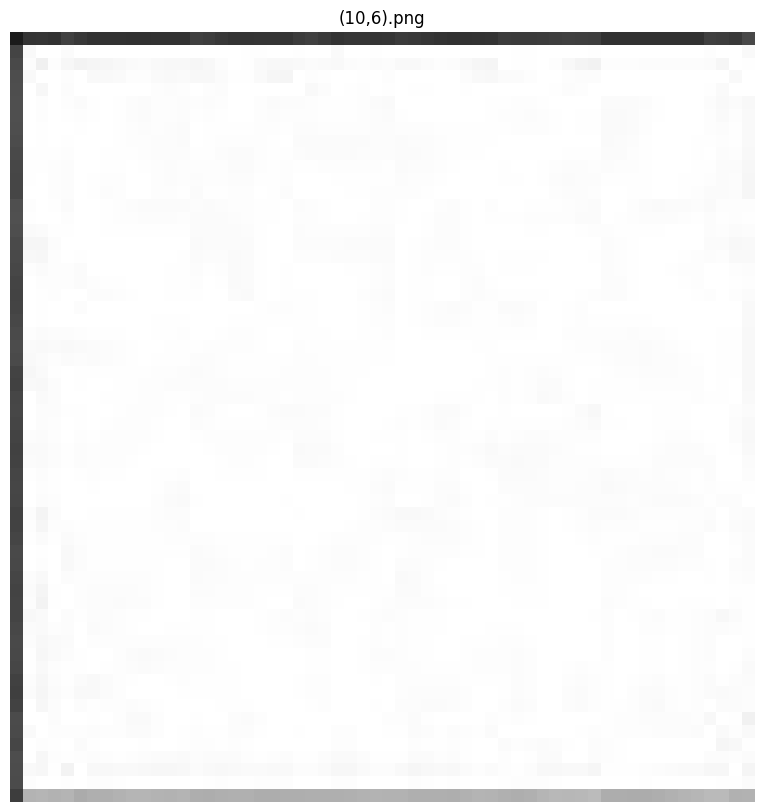

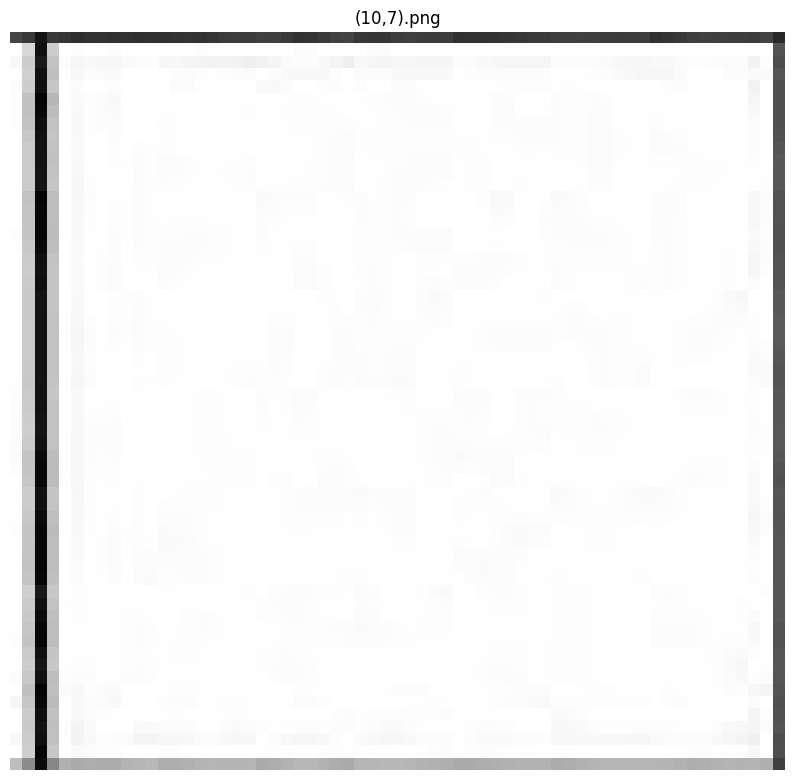

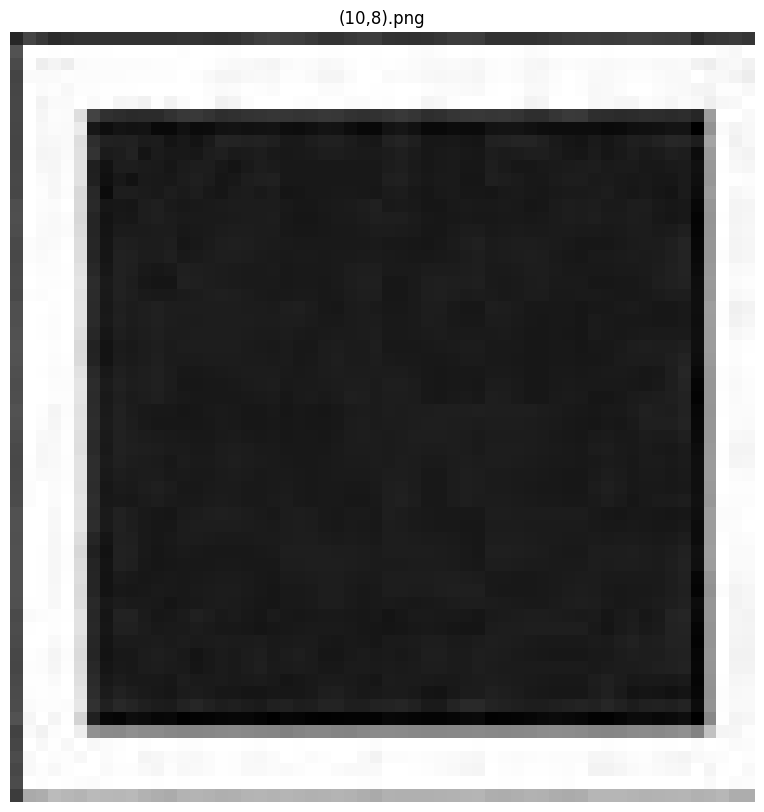

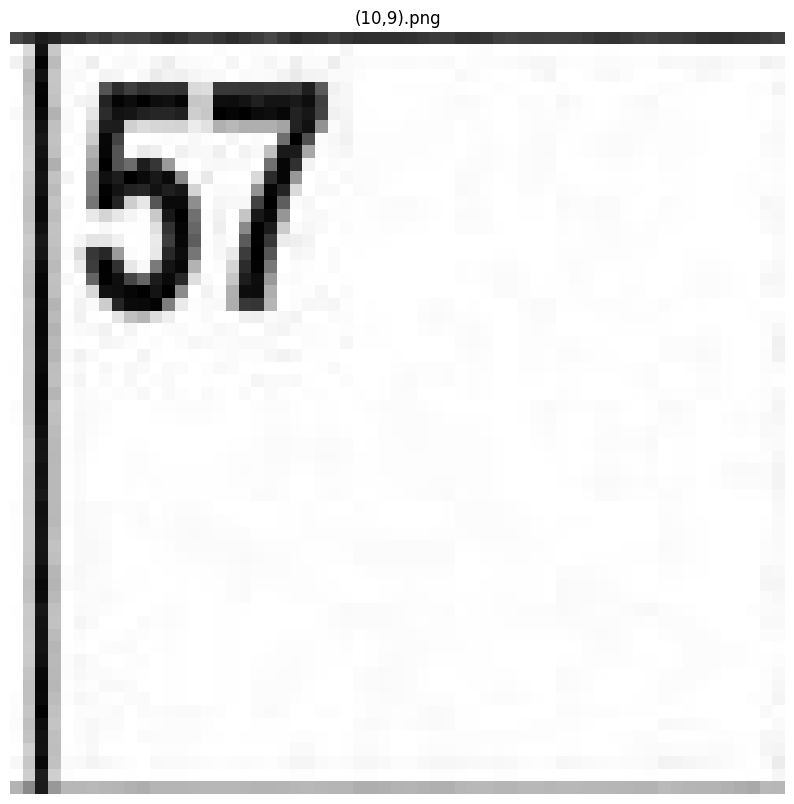

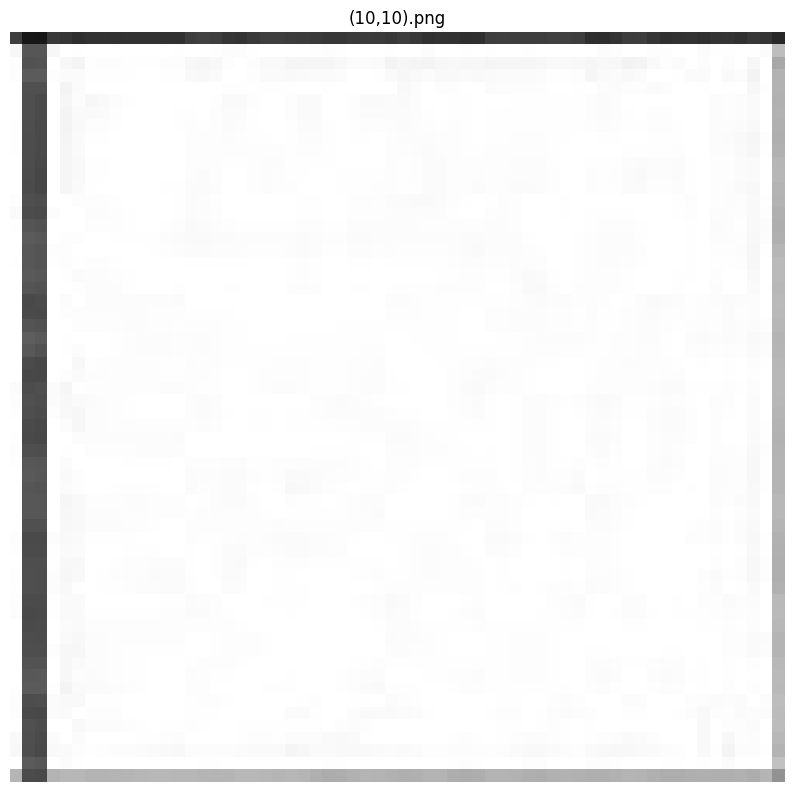

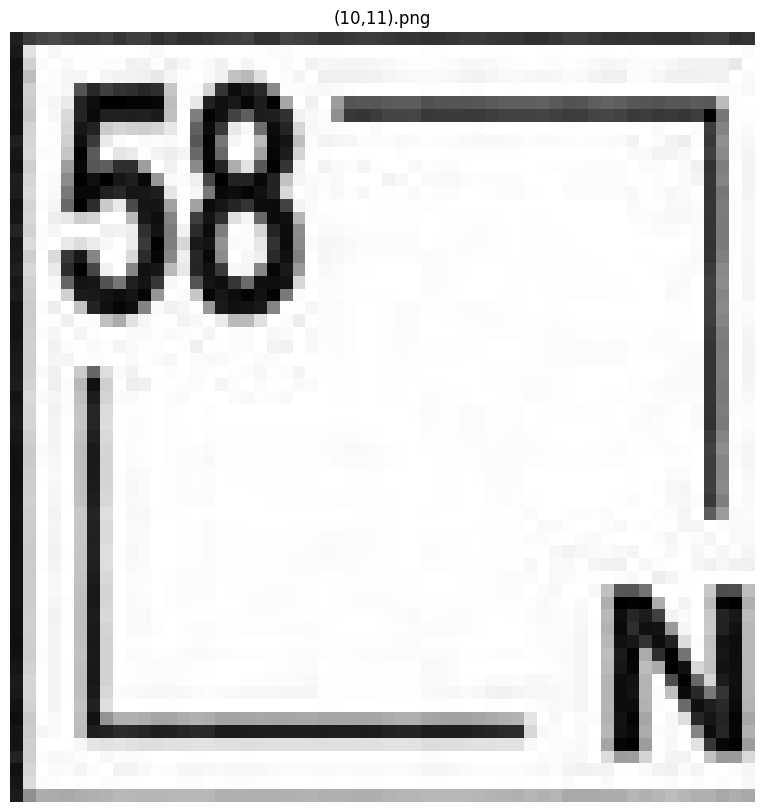

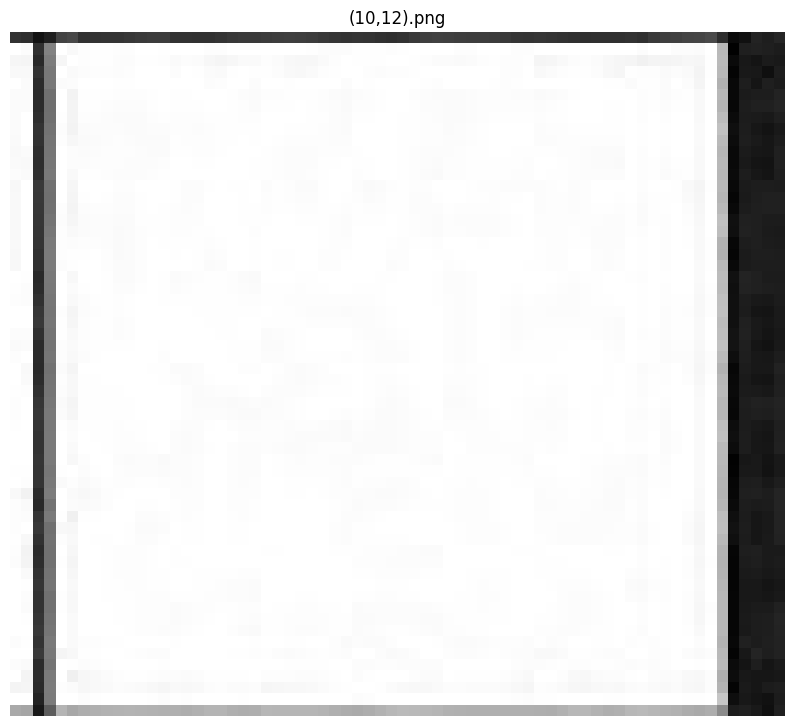

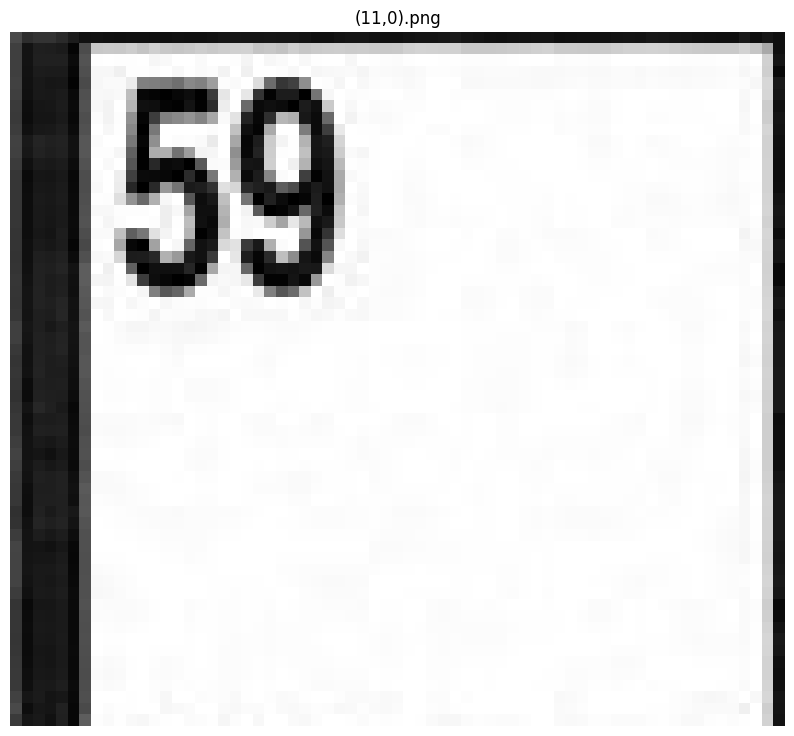

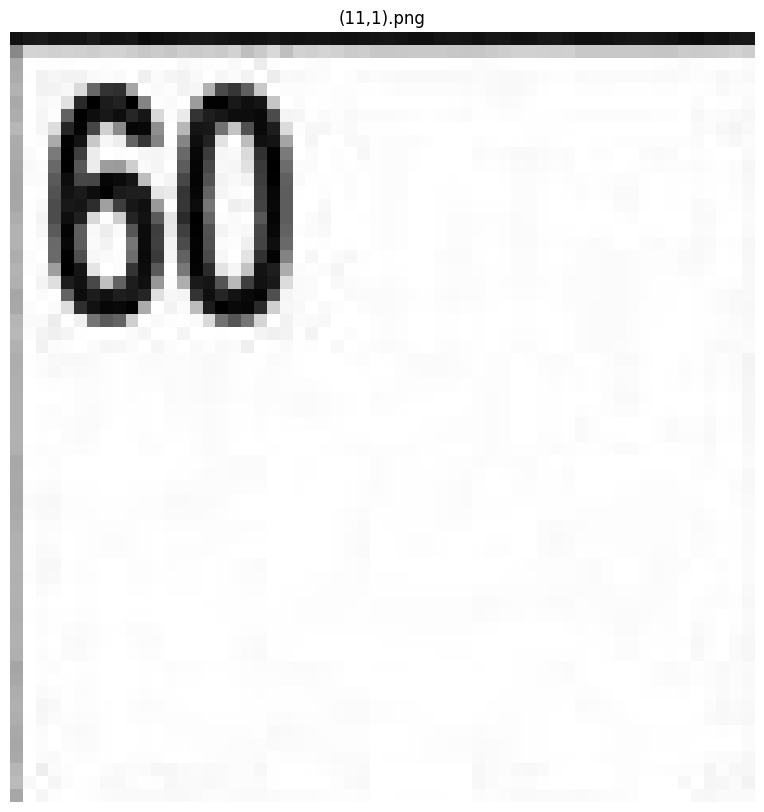

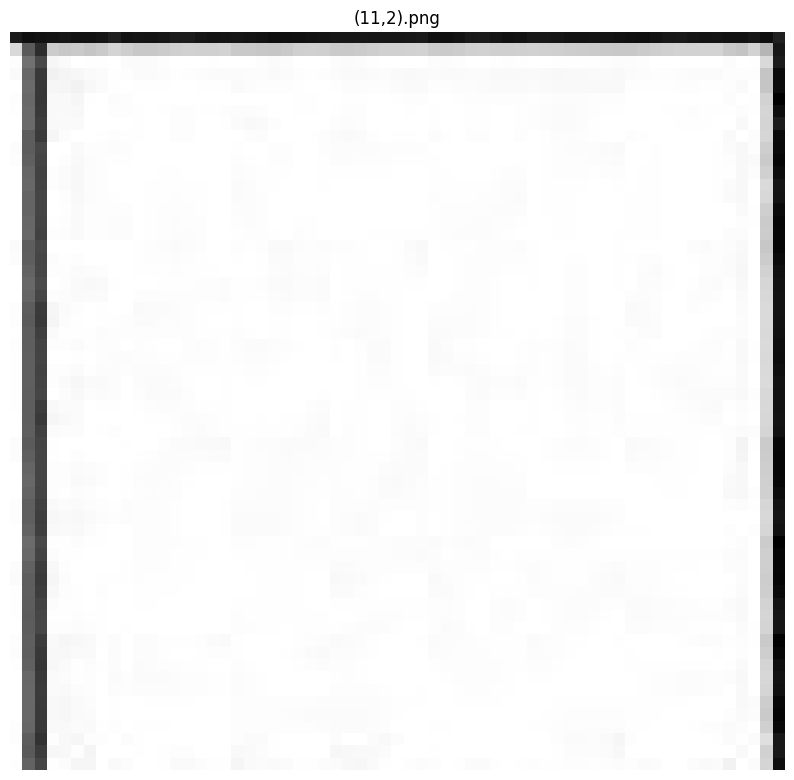

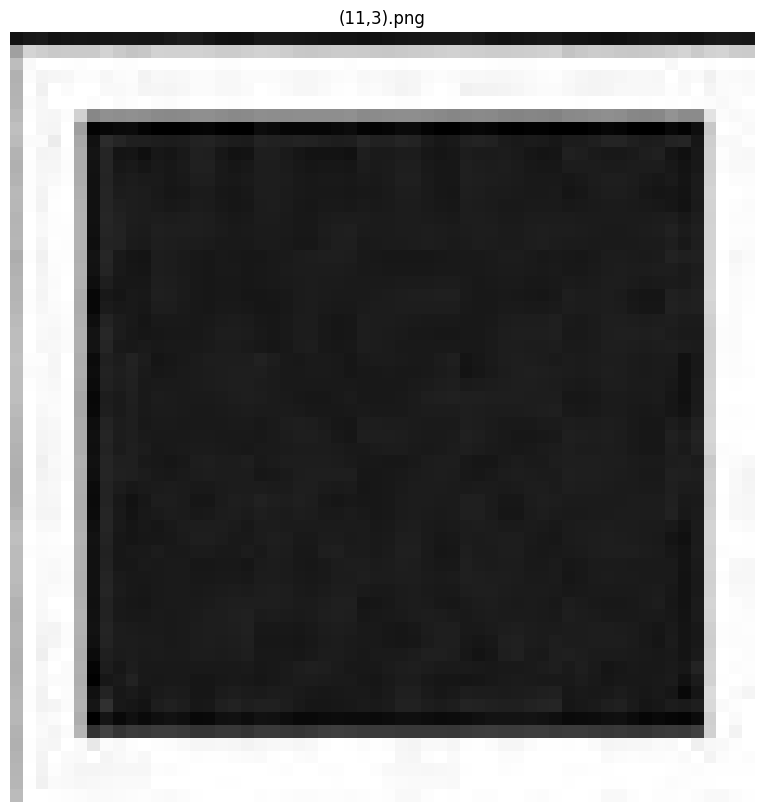

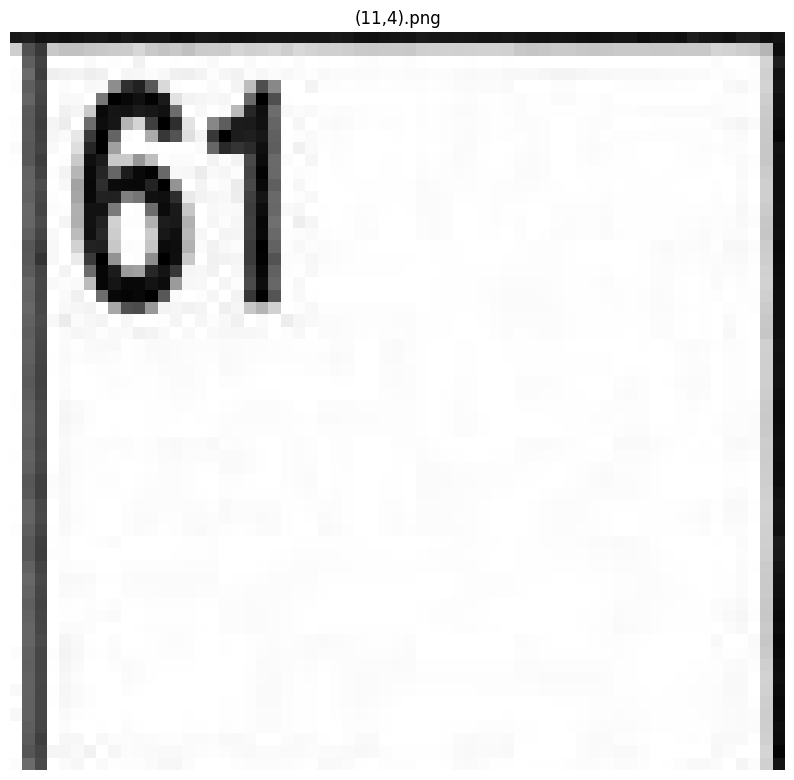

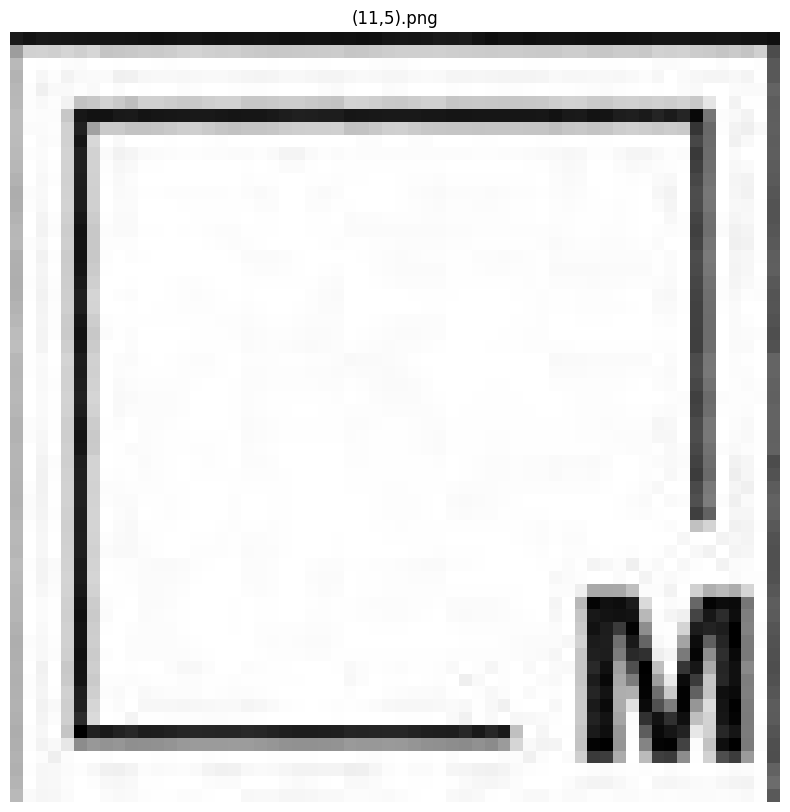

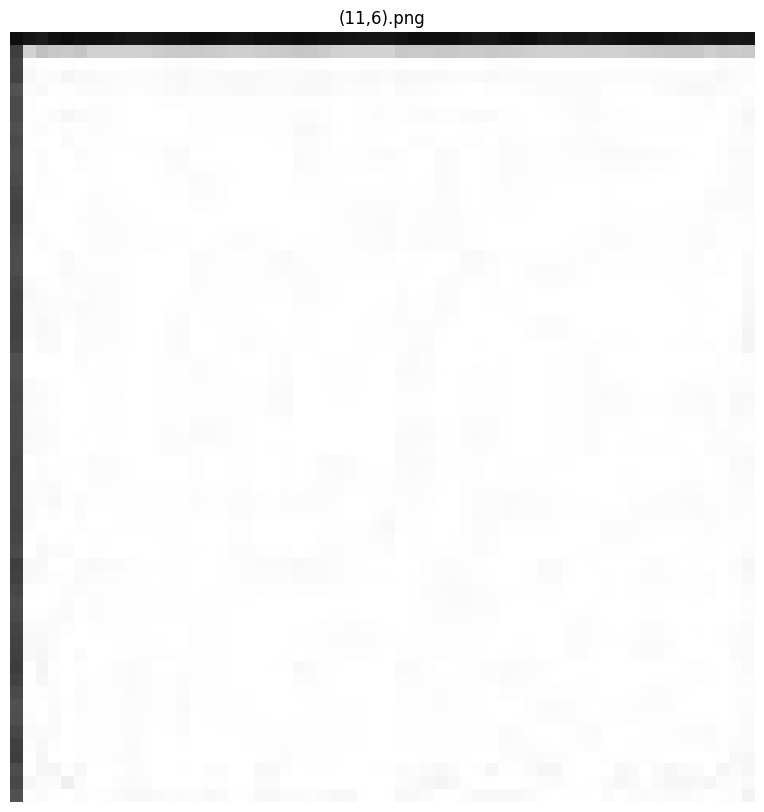

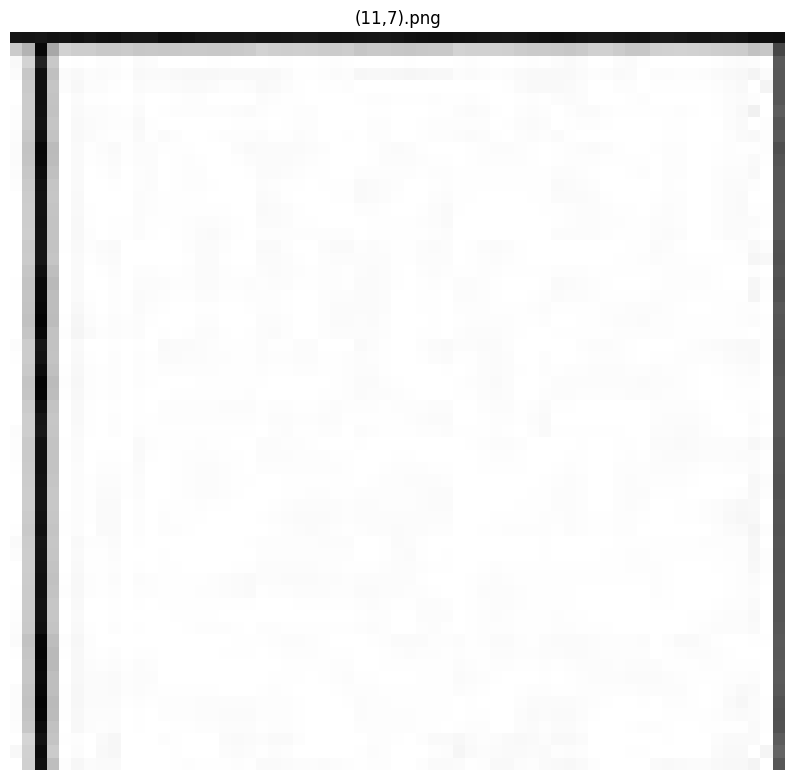

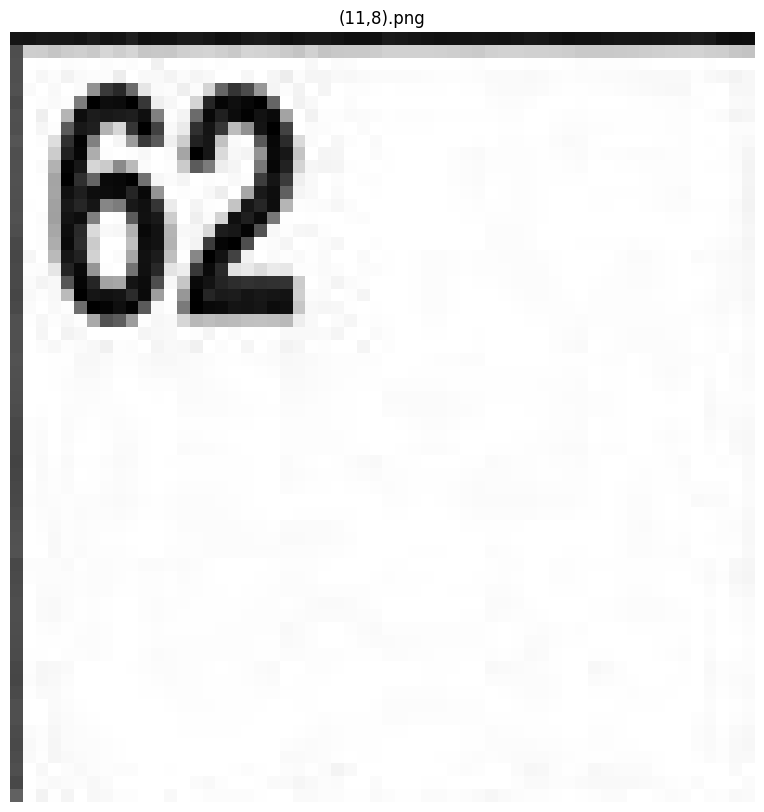

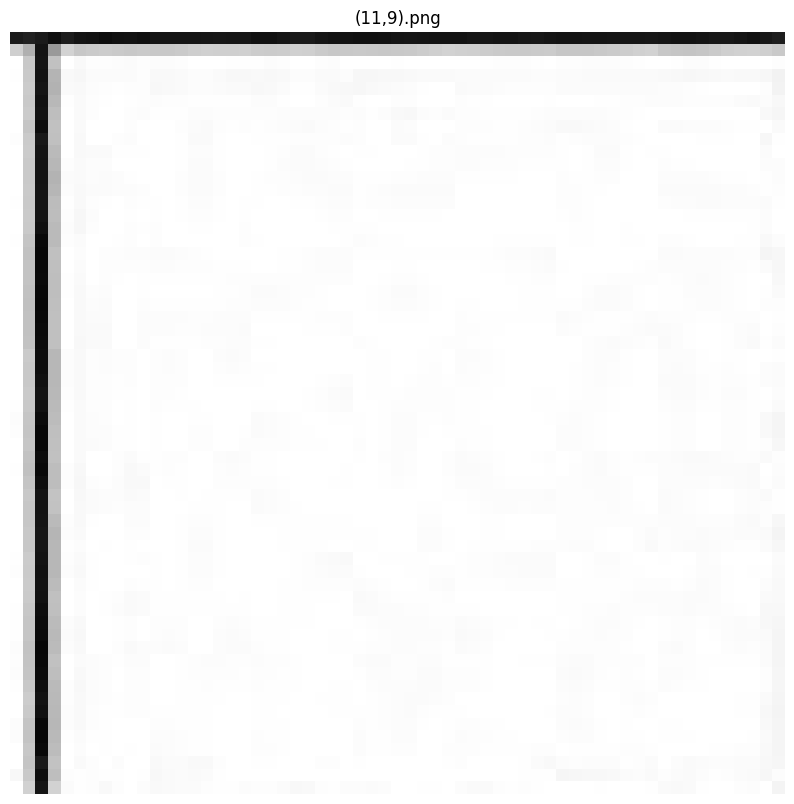

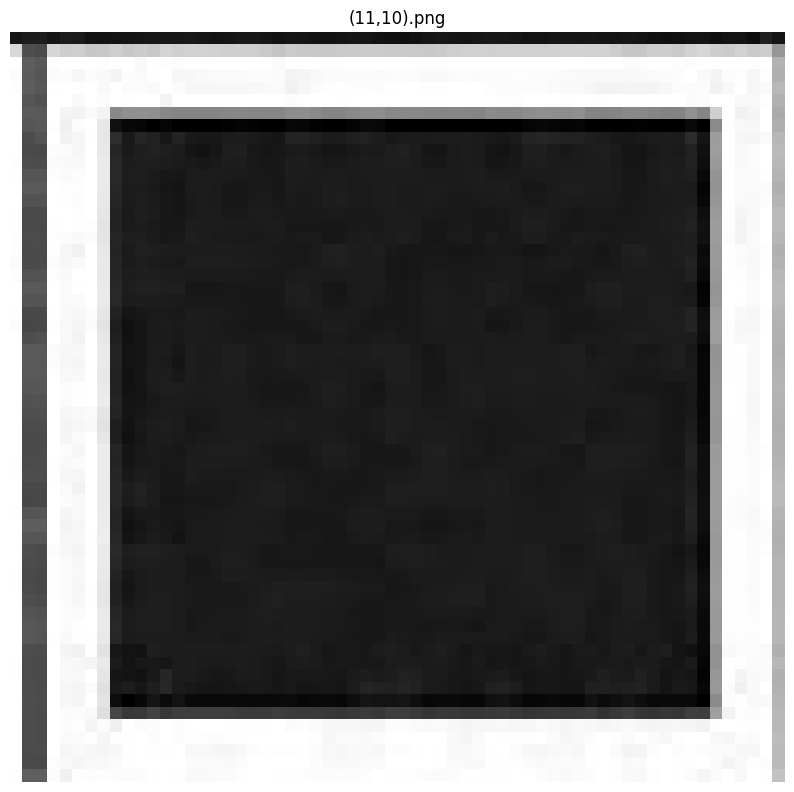

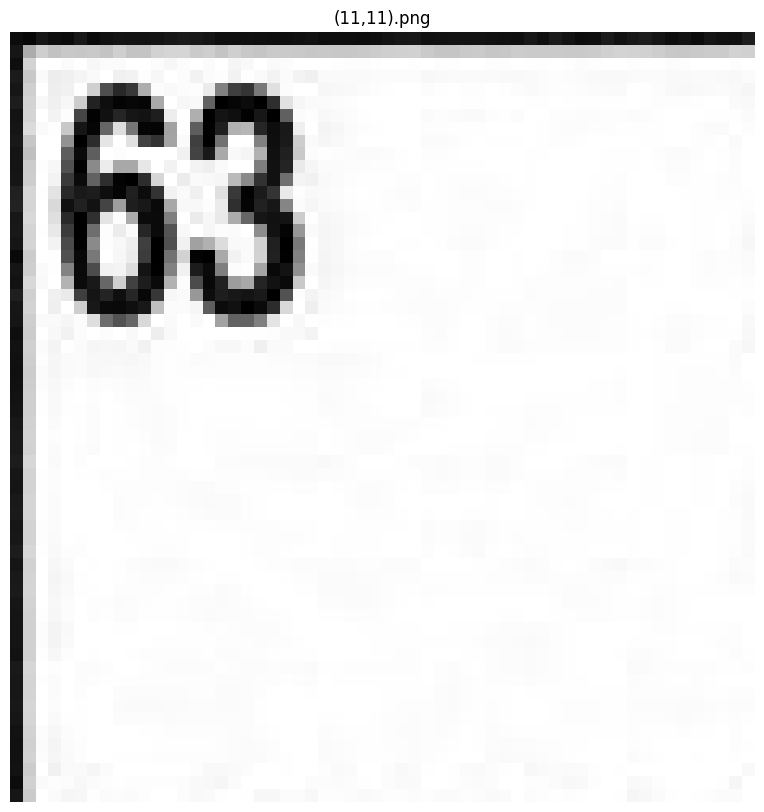

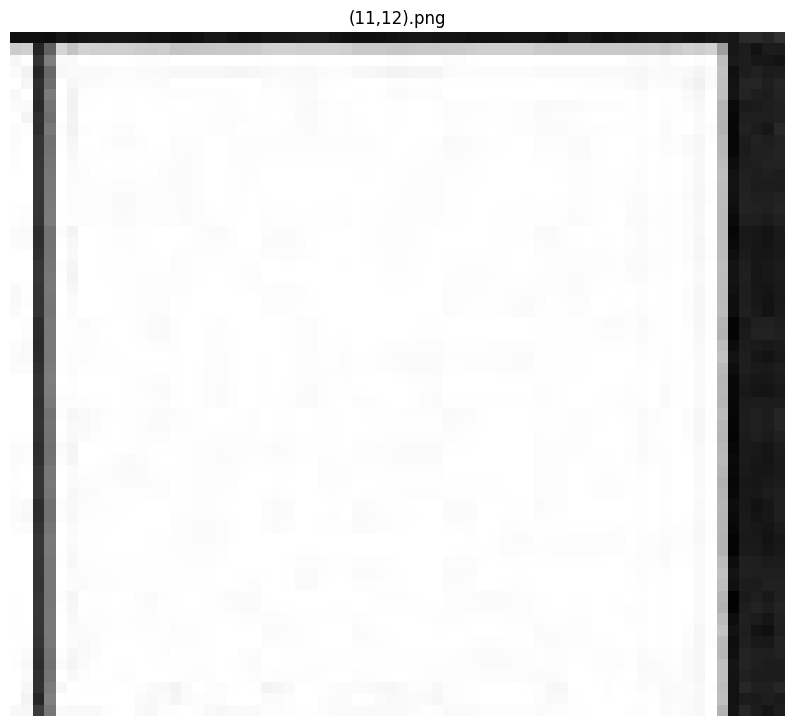

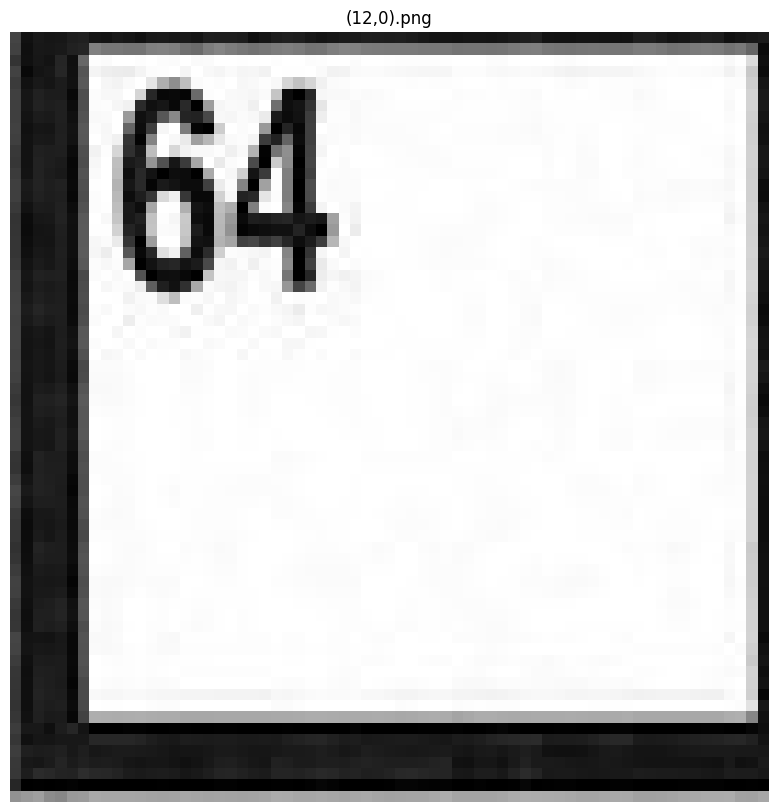

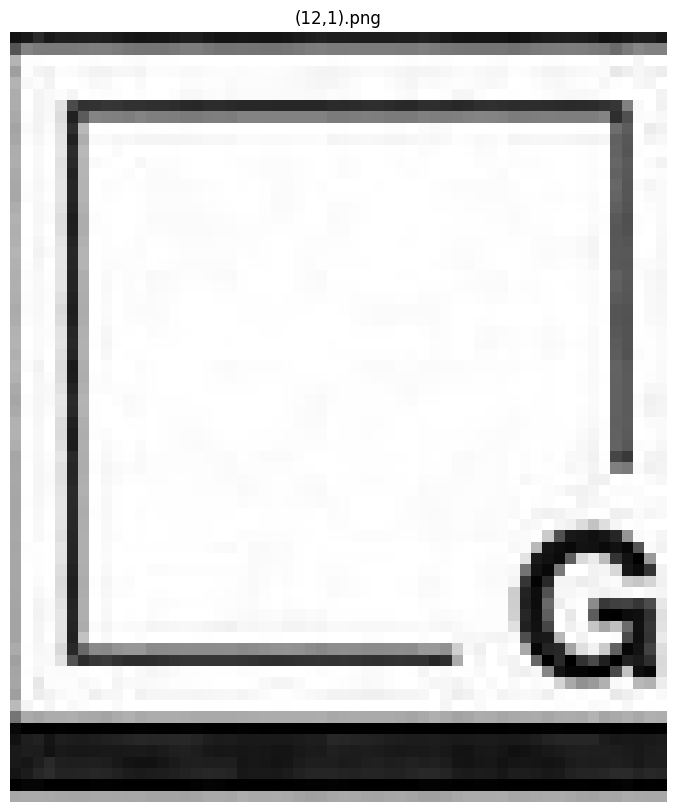

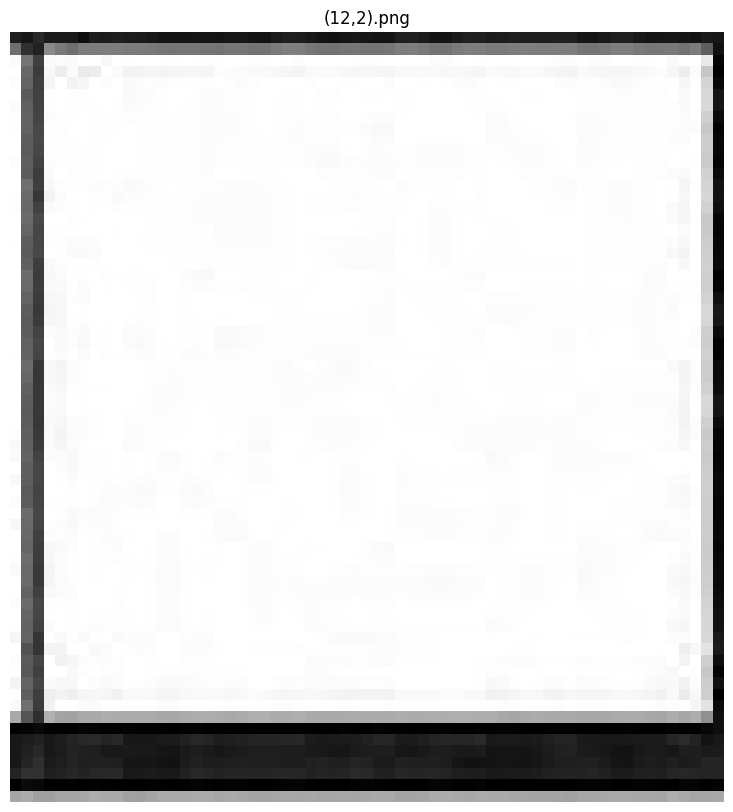

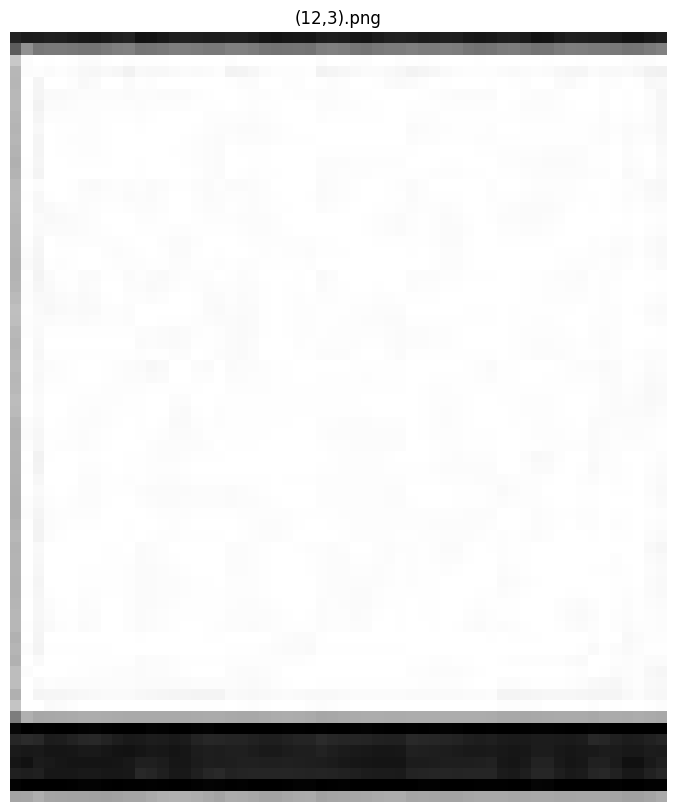

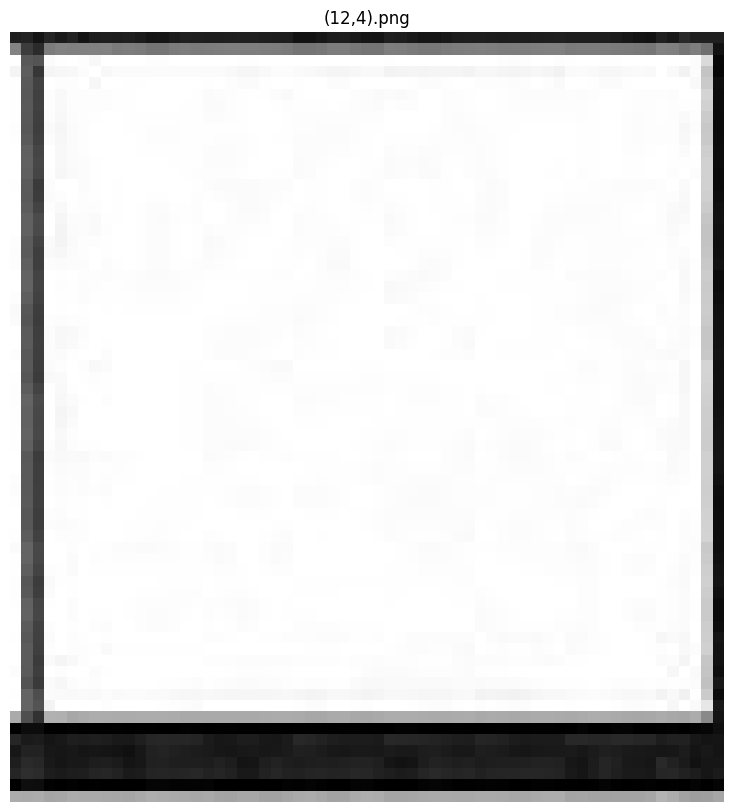

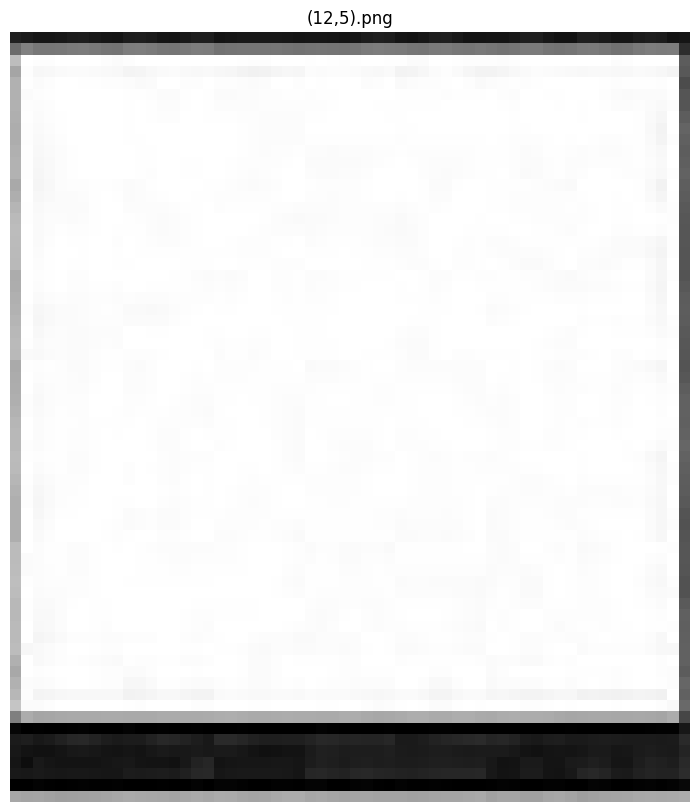

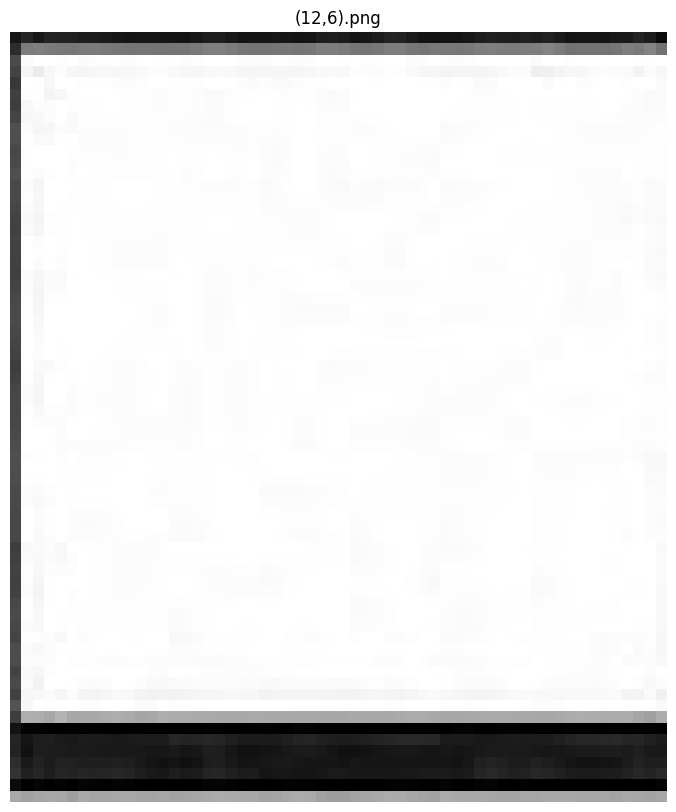

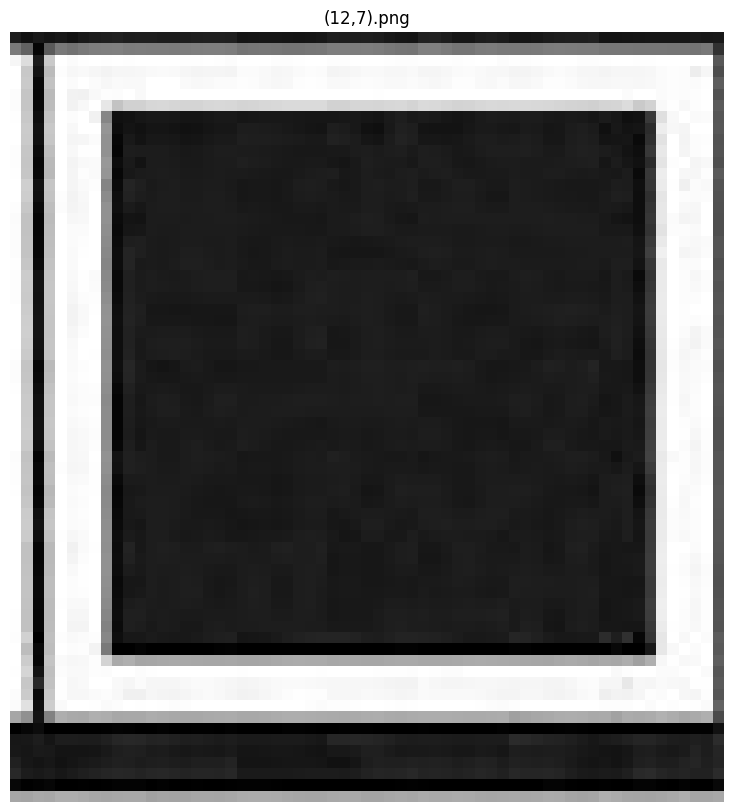

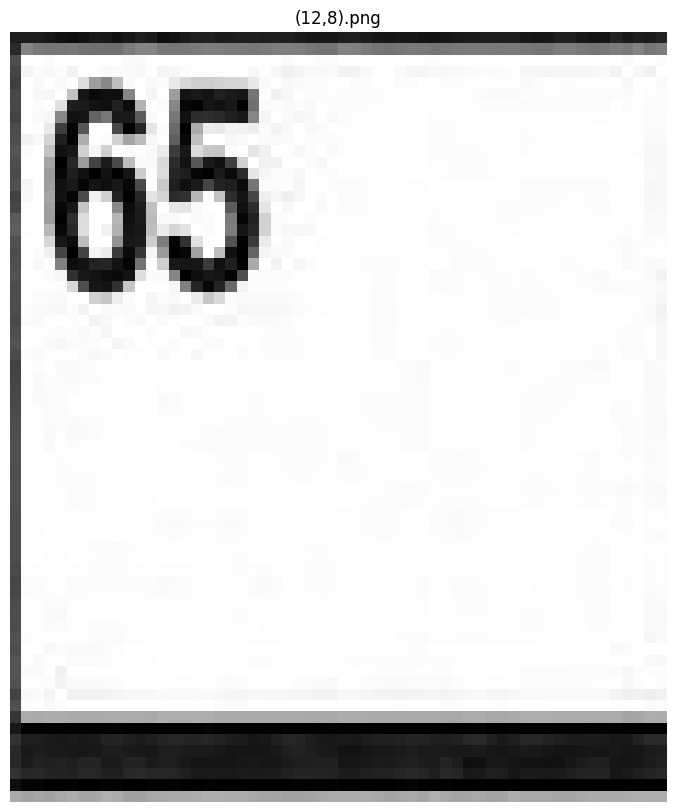

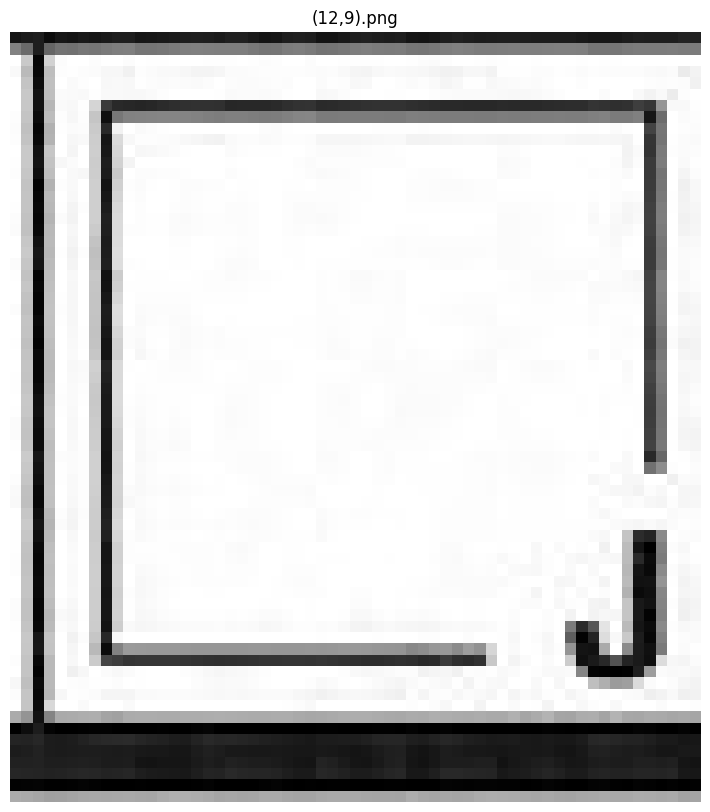

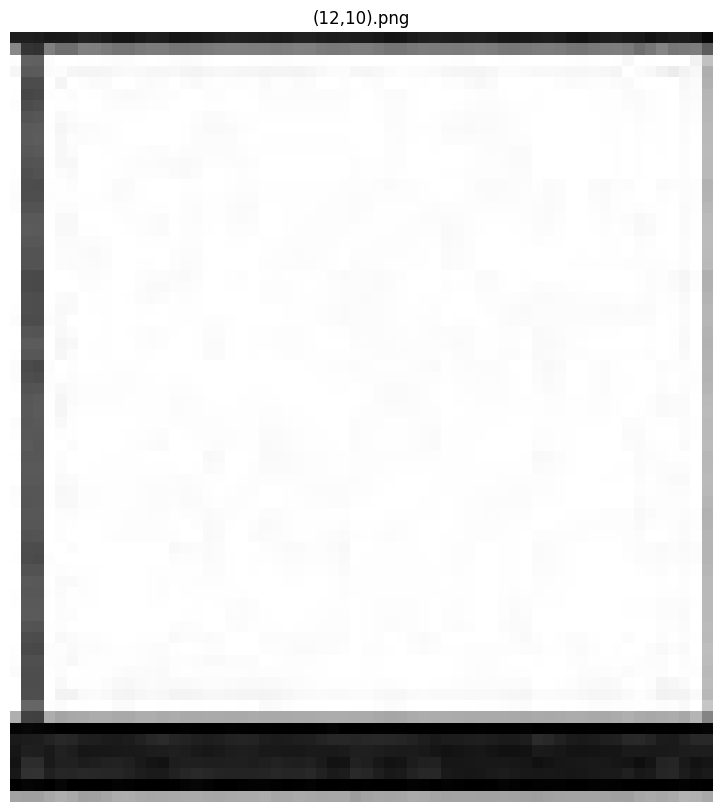

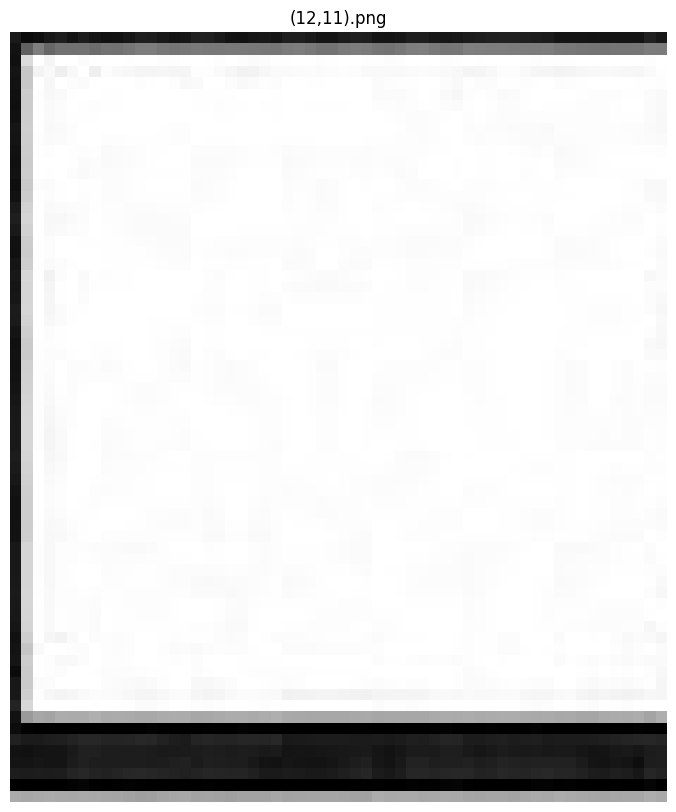

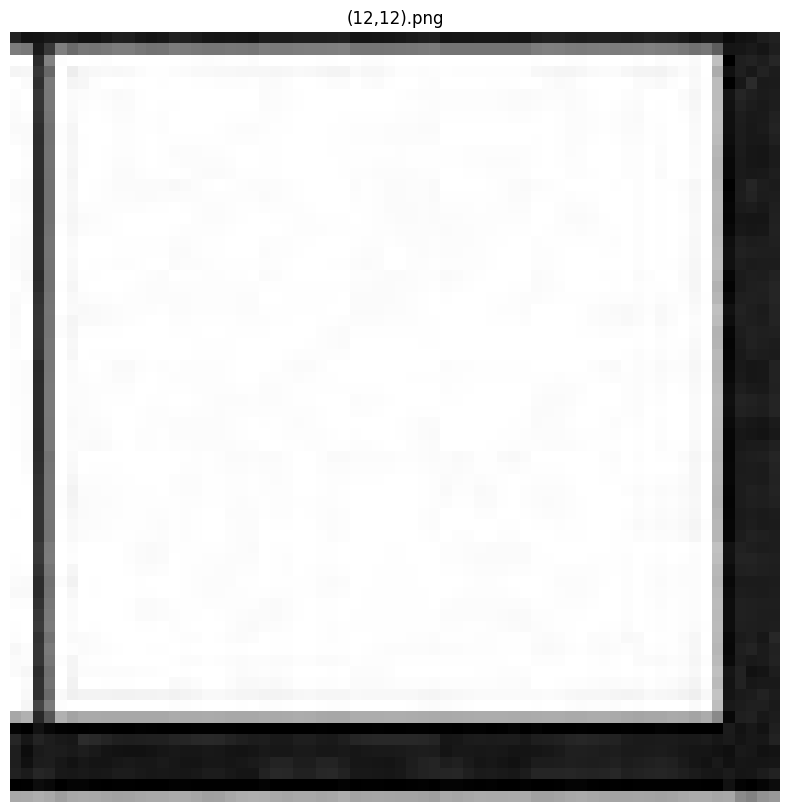

In [ ]:
 # partial_img確認用(必ずしも実行する必要はない)

for i in range(len(intersections_yray)-1):
  for j in range(len(intersections_xray)-1):
    # Use cv2.imwrite to save the image
    cv2.imwrite(f"({i},{j}).png",im_gray[intersections_yray[i]:intersections_yray[i+1],intersections_xray[j]:intersections_xray[j+1]])

    # Read the saved image into a NumPy array
    image = cv2.imread(f"({i},{j}).png")  # Load the image here

    plt.figure(figsize=(10, 10))
    # Pass the NumPy array 'image' to cv2.cvtColor
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"({i},{j}).png")
    plt.axis('off')
    plt.show()